In [198]:
import pandas as pd
import numpy as np
import matplotlib
import warnings
from matplotlib import pyplot as plt

# Data Importing and Cleaning

In [199]:
#Import lyft data
lyft = pd.read_csv('master_1_lyft_data.csv', encoding='latin1')

C:\Users\17028\AppData\Local\Temp\ipykernel_21272\3685935548.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  lyft = pd.read_csv('master_1_lyft_data.csv', encoding='latin1')


In [200]:
lyft.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_date', 'start_time',
       'end_date', 'end_time', 'start_year', 'start_month', 'start_day',
       'end_year', 'end_month', 'end_day', 'start_hour', 'start_minute',
       'start_second', 'end_hour', 'end_minute', 'end_second',
       'amount_minutes', 'start_loc', 'end_loc', 'start_time_clean',
       'end_time_clean', 'start_date_clean', 'end_date_clean', 'start_temp',
       'start_condition', 'start_wind', 'start_wind_direction',
       'start_humidity', 'start_barometer', 'start_visibility', 'end_temp',
       'end_condition', 'end_wind', 'end_wind_direction', 'end_humidity',
       'end_barometer', 'end_visibility', 'start_time_round',
       'end_time_round'],
      dtype='object')

In [201]:
#create list of the weather condition columns at the start of a ride

weather_cols = ['start_temp',
       'start_condition', 'start_wind', 'start_wind_direction',
       'start_humidity', 'start_barometer', 'start_visibility']

lyft[weather_cols]

,start_temp,start_condition,start_wind,start_wind_direction,start_humidity,start_barometer,start_visibility
0,64.0,Partly sunny,9 mph,Wind blowing from 270° West to East,65%,30.05 Hg,10 mi
1,64.0,Partly sunny,9 mph,Wind blowing from 270° West to East,65%,30.05 Hg,10 mi
2,62.0,Passing clouds,6 mph,Wind blowing from 220° Southwest to Northeast,80%,30.11 Hg,10 mi
3,65.0,Partly sunny,12 mph,Wind blowing from 290° West-northwest to East-...,70%,29.73 Hg,10 mi
4,65.0,Partly sunny,12 mph,Wind blowing from 290° West-northwest to East-...,70%,29.73 Hg,10 mi
...,...,...,...,...,...,...,...
3048673,76.0,Passing clouds,5 mph,Wind blowing from 0° North to South,54%,30.00 Hg,10 mi
3048674,76.0,Passing clouds,5 mph,Wind blowing from 0° North to South,54%,30.00 Hg,10 mi
3048675,76.0,Passing clouds,5 mph,Wind blowing from 0° North to South,54%,30.00 Hg,10 mi
3048676,76.0,Passing clouds,5 mph,Wind blowing from 0° North to South,54%,30.00 Hg,10 mi


In [202]:
#drop rows with null values for all starting weather conditions 

lyft.dropna(subset=['start_temp'], inplace=True)
lyft.dropna(subset=['start_wind'], inplace=True)
lyft.dropna(subset=['start_humidity'], inplace=True)
lyft.dropna(subset=['start_barometer'], inplace=True)
lyft.dropna(subset=['start_visibility'], inplace=True)
lyft.dropna(subset=['start_condition'], inplace=True)

In [203]:
#Clean up the format of the weather data so it is all in integers or floats

lyft['start_wind'] = lyft['start_wind'].replace("No wind", "0 mph")

lyft['start_wind'] = lyft['start_wind'].dropna().str[:-3].astype(int)
lyft['start_humidity'] = lyft['start_humidity'].dropna().str[:-1].astype(int)
lyft['start_barometer'] = lyft['start_barometer'].dropna().str[:-2].astype(float)
lyft['start_visibility'] = lyft['start_visibility'].dropna().str[:-2].astype(int)

lyft['end_wind'] = lyft['end_wind'].replace("No wind", "0 mph")

lyft['end_wind'] = lyft['end_wind'].dropna().str[:-3].astype(int)
lyft['end_humidity'] = lyft['end_humidity'].dropna().str[:-1].astype(int)
lyft['end_barometer'] = lyft['end_barometer'].dropna().str[:-2].astype(float)
lyft['end_visibility'] = lyft['end_visibility'].dropna().str[:-2].astype(int)

In [204]:
#rounding barometer values into 6 buckets

lyft.loc[(lyft['start_barometer'] > 29.00) & (lyft['start_barometer'] < 29.25), 'start_baro_round'] = 29.00
lyft.loc[(lyft['start_barometer'] >= 29.25) & (lyft['start_barometer'] < 29.50), 'start_baro_round'] = 29.25
lyft.loc[(lyft['start_barometer'] >= 29.50) & (lyft['start_barometer'] < 29.75), 'start_baro_round'] = 29.50
lyft.loc[(lyft['start_barometer'] >= 29.75) & (lyft['start_barometer'] < 30.00), 'start_baro_round'] = 29.75
lyft.loc[(lyft['start_barometer'] >= 30.00) & (lyft['start_barometer'] < 30.25), 'start_baro_round'] = 30.00
lyft.loc[(lyft['start_barometer'] >= 30.25) & (lyft['start_barometer'] < 30.50), 'start_baro_round'] = 30.25

In [205]:
lyft[weather_cols + ['start_baro_round']]

,start_temp,start_condition,start_wind,start_wind_direction,start_humidity,start_barometer,start_visibility,start_baro_round
0,64.0,Partly sunny,9,Wind blowing from 270° West to East,65,30.05,10,30.0
1,64.0,Partly sunny,9,Wind blowing from 270° West to East,65,30.05,10,30.0
2,62.0,Passing clouds,6,Wind blowing from 220° Southwest to Northeast,80,30.11,10,30.0
3,65.0,Partly sunny,12,Wind blowing from 290° West-northwest to East-...,70,29.73,10,29.5
4,65.0,Partly sunny,12,Wind blowing from 290° West-northwest to East-...,70,29.73,10,29.5
...,...,...,...,...,...,...,...,...
3048673,76.0,Passing clouds,5,Wind blowing from 0° North to South,54,30.00,10,30.0
3048674,76.0,Passing clouds,5,Wind blowing from 0° North to South,54,30.00,10,30.0
3048675,76.0,Passing clouds,5,Wind blowing from 0° North to South,54,30.00,10,30.0
3048676,76.0,Passing clouds,5,Wind blowing from 0° North to South,54,30.00,10,30.0


In [206]:
#checking for errors in visbility data

lyft['start_visibility'].value_counts()

start_visibility
10    2540131
9      116138
8       48408
7       17883
4       10292
6        9267
2        8852
3        7380
5        7377
1        5967
0        1959
67          6
Name: count, dtype: int64

In [207]:
#Remove errors from visibility data

lyft = lyft.drop(lyft.loc[lyft['start_visibility'] == 67.0].index)

In [208]:
#Comfirm errors for visibility are gone

lyft['start_visibility'].value_counts()

start_visibility
10    2540131
9      116138
8       48408
7       17883
4       10292
6        9267
2        8852
3        7380
5        7377
1        5967
0        1959
Name: count, dtype: int64

In [209]:
#Drop rides that took a negative amount of minutes - errors

lyft = lyft.drop(lyft.loc[lyft['amount_minutes'] < 0].index)

In [210]:
#Viewing all possible start conditions for weather

lyft['start_condition'].unique()

array(['Partly sunny', 'Passing clouds', 'Partly cloudy', 'Overcast',
       'Low clouds', 'Sunny', 'Mostly cloudy', 'Broken clouds',
       'Scattered clouds', 'Clear', 'Haze', 'Drizzle. Mostly cloudy',
       'Cloudy', 'More clouds than sun', 'Fog', 'Rain. Fog',
       'Light rain. Fog', 'Light rain. More clouds than sun',
       'Light rain. Overcast', 'Light rain. Mostly cloudy',
       'Rain. Cloudy', 'High level clouds', 'Drizzle. Low clouds',
       'Light rain. Broken clouds', 'Light rain. Cloudy',
       'Light rain. Passing clouds', 'Light rain. Partly cloudy',
       'Heavy rain. Cloudy', 'Drizzle. Fog', 'Rain. Mostly cloudy',
       'Thundershowers. Low clouds', 'Light rain. Low clouds',
       'Drizzle. Overcast', 'Drizzle. More clouds than sun',
       'Light rain. Partly sunny', 'Heavy rain. Fog',
       'Rain. Partly cloudy', 'Thunderstorms. Broken clouds',
       'Rain. Partly sunny', 'Drizzle. Cloudy', 'Dense fog',
       'Rain. Overcast', 'Heavy rain. Overcast',
    

In [211]:
#Bucketing possible weather conditions into 7 broader categories

sunny = ['Partly sunny', 'Sunny']
cloudy = ['Passing clouds','Partly cloudy','Overcast','Low clouds', 
          'Mostly cloudy', 'Broken clouds', 'Scattered clouds', 
          'Drizzle. Mostly cloudy', 'Cloudy', 'More clouds than sun', 
          'High level clouds']
foggy = ['Haze', 'Fog','Dense fog','Light fog']
stormy = ['Thunderstorms. Partly cloudy','Thundershowers. Scattered clouds',
         'Thundershowers. Mostly cloudy','Thundershowers. Partly cloudy',
         'Strong thunderstorms. Partly cloudy','Thunderstorms. Overcast',
         'Thunderstorms. Mostly cloudy','Thundershowers. Low clouds', 
         'Thunderstorms. Broken clouds','Thundershowers. Broken clouds',
         'Strong thunderstorms. Mostly cloudy']
light_rain = ['Drizzle. Partly sunny','Rain. Broken clouds',
              'Drizzle. Cloudy','Rain. Partly sunny','Rain. Partly cloudy',
              'Drizzle. Overcast', 'Drizzle. More clouds than sun',
              'Light rain. Partly sunny','Light rain. Low clouds','Rain. Fog', 
              'Light rain. Fog', 'Light rain. More clouds than sun', 
              'Light rain. Overcast', 'Light rain. Mostly cloudy', 'Drizzle. Low clouds',
              'Light rain. Broken clouds', 'Light rain. Cloudy',
              'Light rain. Passing clouds', 'Light rain. Partly cloudy',
             'Drizzle. Fog', 'Rain. Mostly cloudy']
heavy_rain = ['Heavy rain. More clouds than sun','Heavy rain. Mostly cloudy',
              'Rain. Passing clouds','Rain. Cloudy', 'Heavy rain. Cloudy', 
              'Heavy rain. Fog','Rain. Overcast', 'Heavy rain. Overcast',
              'Rain. More clouds than sun']
clear = ['Clear', 'Cool']

In [212]:
#Converting all weather conditions values into their corresponding broad category

lyft.loc[lyft['start_condition'].isin(sunny), 'start_condition'] = "Sunny"
lyft.loc[lyft['start_condition'].isin(cloudy), 'start_condition'] = "Cloudy"
lyft.loc[lyft['start_condition'].isin(foggy), 'start_condition'] = "Foggy"
lyft.loc[lyft['start_condition'].isin(stormy), 'start_condition'] = "Stormy"
lyft.loc[lyft['start_condition'].isin(light_rain), 'start_condition'] = "Light Rain"
lyft.loc[lyft['start_condition'].isin(heavy_rain), 'start_condition'] = "Heavy Rain"
lyft.loc[lyft['start_condition'].isin(clear), 'start_condition'] = "Clear"

lyft.loc[lyft['end_condition'].isin(sunny), 'end_condition'] = "Sunny"
lyft.loc[lyft['end_condition'].isin(cloudy), 'end_condition'] = "Cloudy"
lyft.loc[lyft['end_condition'].isin(foggy), 'end_condition'] = "Foggy"
lyft.loc[lyft['end_condition'].isin(stormy), 'end_condition'] = "Stormy"
lyft.loc[lyft['end_condition'].isin(light_rain), 'end_condition'] = "Light Rain"
lyft.loc[lyft['end_condition'].isin(heavy_rain), 'end_condition'] = "Heavy Rain"
lyft.loc[lyft['end_condition'].isin(clear), 'end_condition'] = "Clear"

In [213]:
#Dividing the lyft data up into rides that start in San Francisco, San jose, Berkeley and Oakland

sf_lyft = lyft[lyft['start_loc'] == 'SF']
sj_lyft = lyft[lyft['start_loc'] == 'SJ']
brk_lyft = lyft[lyft['start_loc'] == 'BRK']
okl_lyft = lyft[lyft['start_loc'] == 'OKL']

In [214]:
#Importing weather data for each city

sf_weather = pd.read_csv('Weather Webscraped Data\master_SF_weather.csv', encoding='latin1')
sj_weather = pd.read_csv('Weather Webscraped Data\master_SJ_weather.csv', encoding='latin1')
brk_weather = pd.read_csv('Weather Webscraped Data\master_BRK_weather.csv', encoding='latin1')
okl_weather = pd.read_csv('Weather Webscraped Data\master_OKL_weather.csv', encoding='latin1')

In [215]:
#Function to clean weather data, drops rows with null values, converts format of data to integers and floats, 
#converts weather conditions into borader categories, rounds barometer values

def clean_weather(data):
    data.dropna(subset=['Condition'], inplace=True)
    data.dropna(subset=['Temperature'], inplace=True)
    data.dropna(subset=['Humidity'], inplace=True)
    data.dropna(subset=['Wind'], inplace=True)
    data.dropna(subset=['Barometer'], inplace=True)
    data.dropna(subset=['Visibility'], inplace=True)
    data['Wind'] = data['Wind'].replace("No wind", "0 mph")
    data['Wind'] = data['Wind'].str[:-3].astype(int)
    data['Humidity'] = data['Humidity'].str[:-1].astype(int)
    data['Barometer'] = data['Barometer'].str[:-2].astype(float)
    data['Visibility'] = data['Visibility'].str[:-2].astype(int)
    data.loc[data['Condition'].isin(sunny), 'Condition'] = "Sunny"
    data.loc[data['Condition'].isin(cloudy), 'Condition'] = "Cloudy"
    data.loc[data['Condition'].isin(foggy), 'Condition'] = "Foggy"
    data.loc[data['Condition'].isin(stormy), 'Condition'] = "Stormy"
    data.loc[data['Condition'].isin(light_rain), 'Condition'] = "Light Rain"
    data.loc[data['Condition'].isin(heavy_rain), 'Condition'] = "Heavy Rain"
    data.loc[data['Condition'].isin(clear), 'Condition'] = "Clear"
    data.loc[(data['Barometer'] > 29.00) & (data['Barometer'] < 29.25), 'baro_round'] = 29.00
    data.loc[(data['Barometer'] >= 29.25) & (data['Barometer'] < 29.50), 'baro_round'] = 29.25
    data.loc[(data['Barometer'] >= 29.50) & (data['Barometer'] < 29.75), 'baro_round'] = 29.50
    data.loc[(data['Barometer'] >= 29.75) & (data['Barometer'] < 30.00), 'baro_round'] = 29.75
    data.loc[(data['Barometer'] >= 30.00) & (data['Barometer'] < 30.25), 'baro_round'] = 30.00
    data.loc[(data['Barometer'] >= 30.25) & (data['Barometer'] < 30.50), 'baro_round'] = 30.25
    return data

In [216]:
#Clean all weather data

sf_weather = clean_weather(sf_weather)
sj_weather = clean_weather(sj_weather)
brk_weather = clean_weather(brk_weather)
okl_weather = clean_weather(okl_weather)

In [217]:
#Functions used to only pick values from a data set at certain times. "awake" picks values people are generally awake 6am-12am, 
#"morning_commute" picks values people are generally commuting to work 6am-10am
#"night_commute" picks values people are generally commuting from work 4pm-7pm

def awake(data, reg_wea):
    if reg_wea == "reg":
        new_data = data.loc[(data['start_time_round'] > 600)].dropna()
    elif reg_wea == "wea":
        new_data = data.loc[(data['time_round'] > 600)].dropna()
    return new_data

def morning_commute(data, reg_wea):
    if reg_wea == "reg":
        new_data = data.loc[(data['start_time_round'] > 600) & (data['start_time_round'] < 1000)].dropna()
    elif reg_wea == "wea":
        new_data = data.loc[(data['time_round'] > 600) & (data['time_round'] < 1000)].dropna()
    return new_data

def night_commute(data, reg_wea):
    if reg_wea == "reg":
        new_data = data.loc[(data['start_time_round'] > 1600) & (data['start_time_round'] < 1900)].dropna()
    elif reg_wea == "wea":
        new_data = data.loc[(data['time_round'] > 1600) & (data['time_round'] < 1900)].dropna()
    return new_data

# Data Analysis

### Weather Conditions vs Amount of Rides 

In [218]:
#Function that creates bar tables to compare the amount of rides with a specific weather condition
#Temperature, Wind Speed, Humidity, Visibility, Barometer, Weather Condition

def create_tables(lyft_data, weather_data, color, title):  
    fig, [[a1, a2], [a3, a4], [a5, a6]]= plt.subplots(nrows=3, ncols=2, figsize=(20,20))
    
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=0.95)
    
    
    temps = sorted(lyft_data['start_temp'].dropna().unique())
    a1.bar(temps, (lyft_data['start_temp'].value_counts()/weather_data['Temperature'].value_counts()).dropna(), color = color);
    a1.set_xlabel('Temperatures');
    a1.set_ylabel('Rides Per Hour');
    a1.set_title('Rides Per Hour vs Temperatures');

    wind_speeds = sorted(lyft_data['start_wind'].dropna().unique())
    a2.bar(wind_speeds, (lyft_data['start_wind'].value_counts()/weather_data['Wind'].value_counts()).dropna(), color = color);
    a2.set_xlabel('Wind Speeds');
    a2.set_ylabel('Rides Per Hour');
    a2.set_title('Rides Per Hour vs Wind Speeds');

    humidities = sorted(lyft_data['start_humidity'].dropna().unique())
    a3.bar(humidities, (lyft_data['start_humidity'].value_counts()/weather_data['Humidity'].value_counts()).dropna(), color = color);
    a3.set_xlabel('Humidity %');
    a3.set_ylabel('Rides Per Hour');
    a3.set_title('Rides Per Hour vs Humidity');

    visibilities = sorted(lyft_data['start_visibility'].dropna().unique())
    a4.bar(visibilities, (lyft_data['start_visibility'].value_counts()/weather_data['Visibility'].value_counts()).dropna(), color = color);
    a4.set_xlabel('Visibility');
    a4.set_ylabel('Rides Per Hour');
    a4.set_title('Rides Per Hour vs Visbility');

    barometers = sorted(lyft_data['start_baro_round'].dropna().unique())
    a5.bar(barometers, (lyft_data['start_baro_round'].value_counts()/weather_data['baro_round'].value_counts()).dropna(), color = color);
    a5.set_xlabel('Barometer');
    a5.set_ylabel('Rides Per Hour');
    a5.set_title('Rides Per Hour vs Barometer');

    conditions = sorted(lyft_data['start_condition'].dropna().unique())
    a6.bar(conditions, (lyft_data['start_condition'].value_counts()/weather_data['Condition'].value_counts()).dropna().sort_index(), color = color);
    a6.set_xlabel('Condition');
    a6.set_ylabel('Rides Per Hour');
    a6.set_title('Rides Per Hour vs Condition');

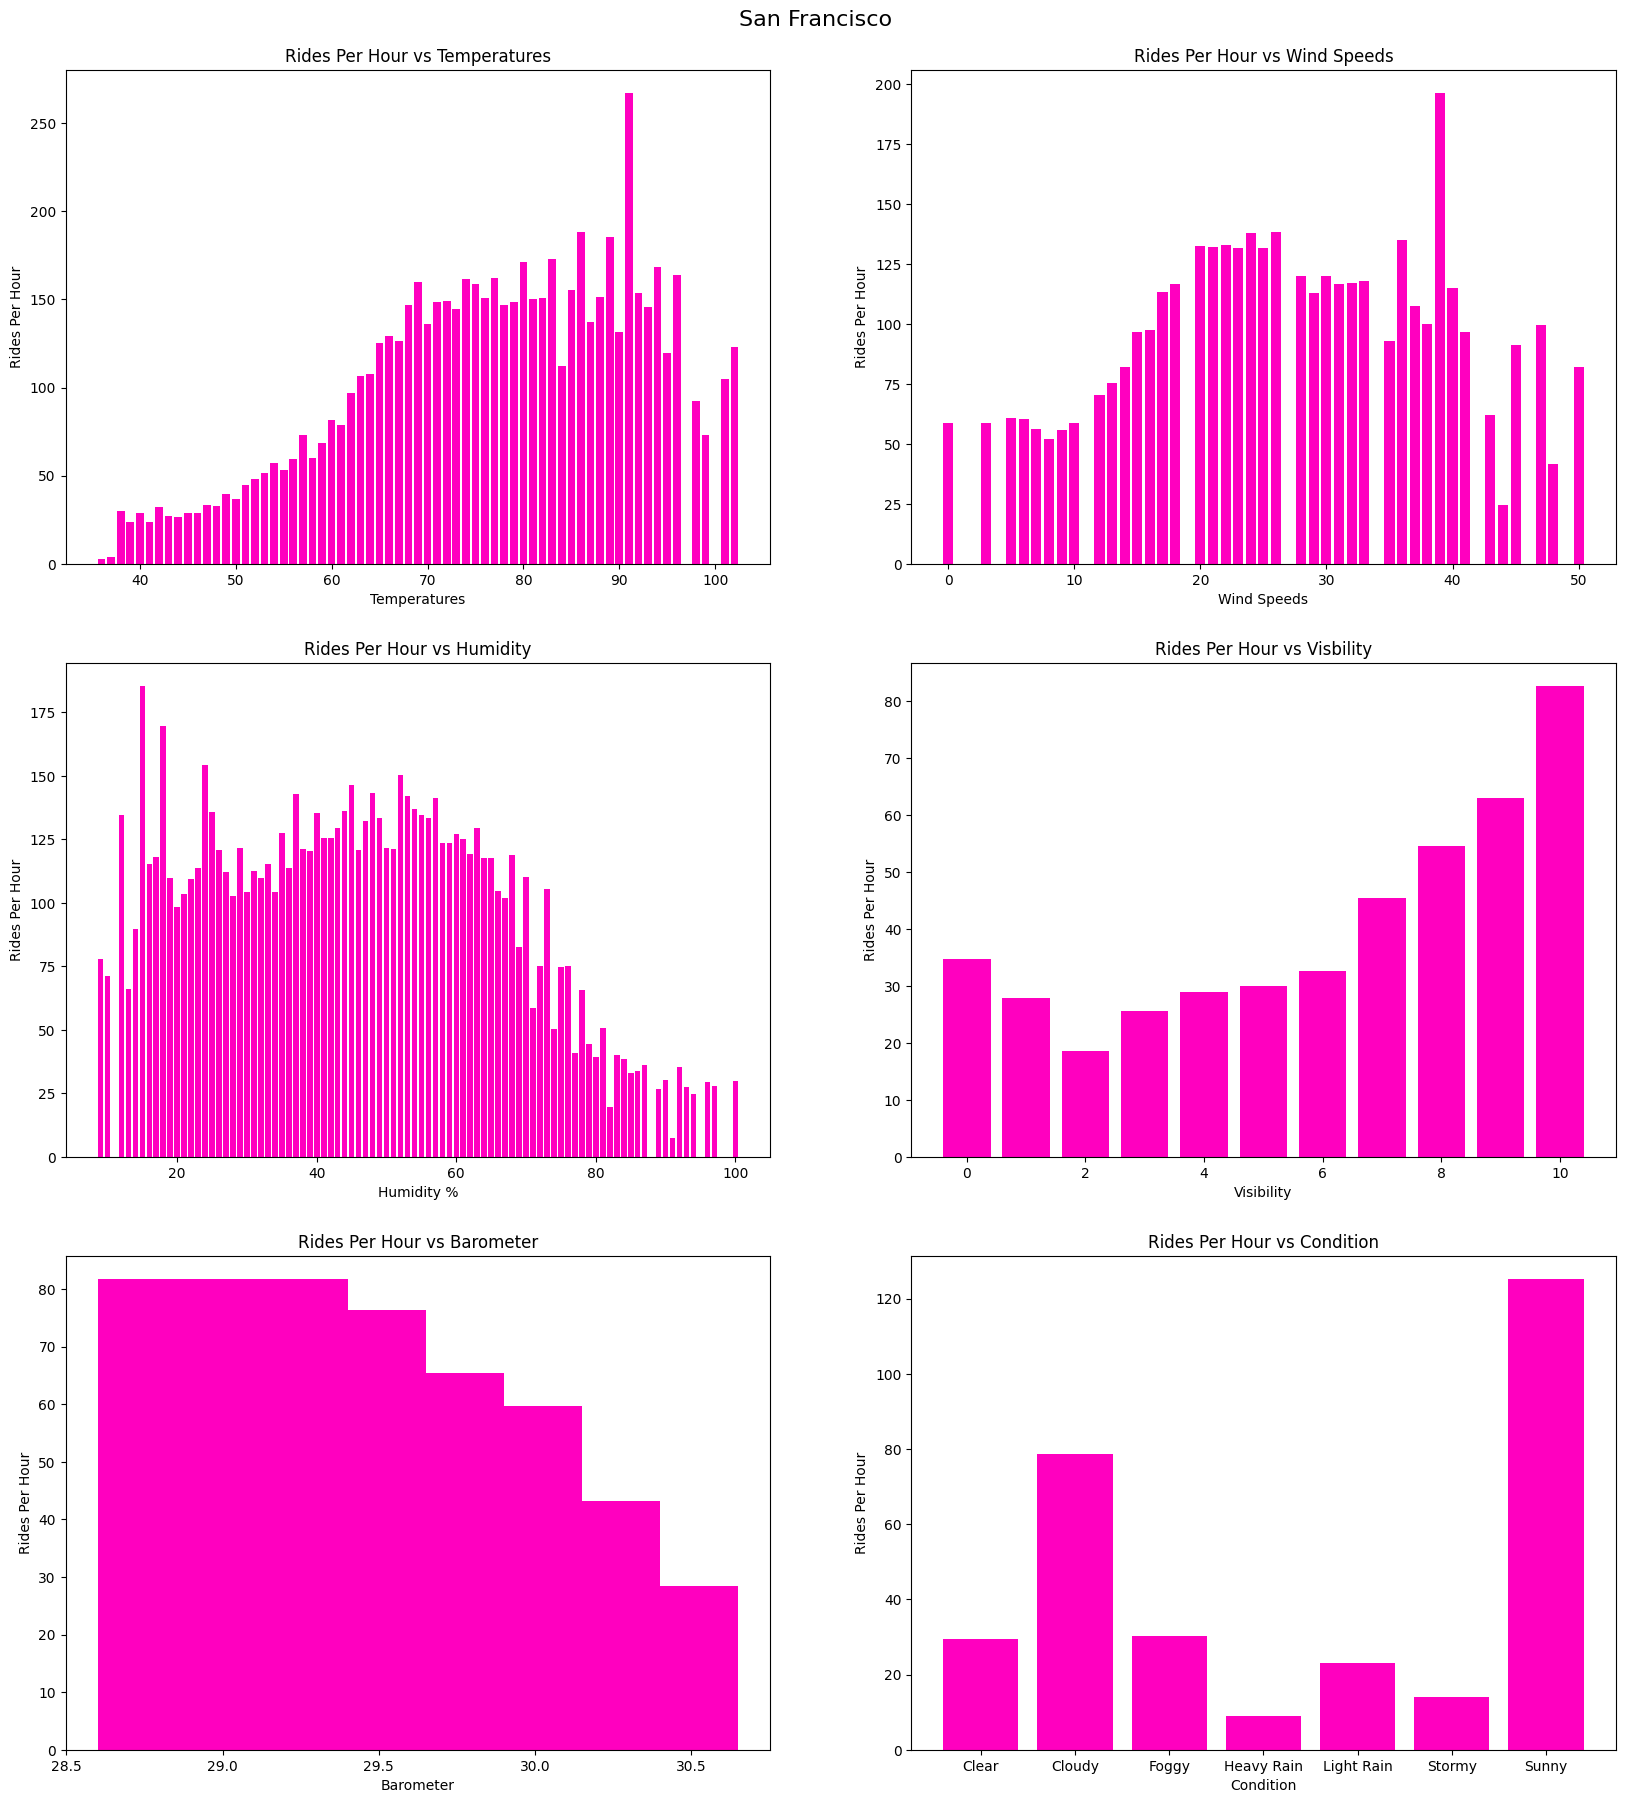

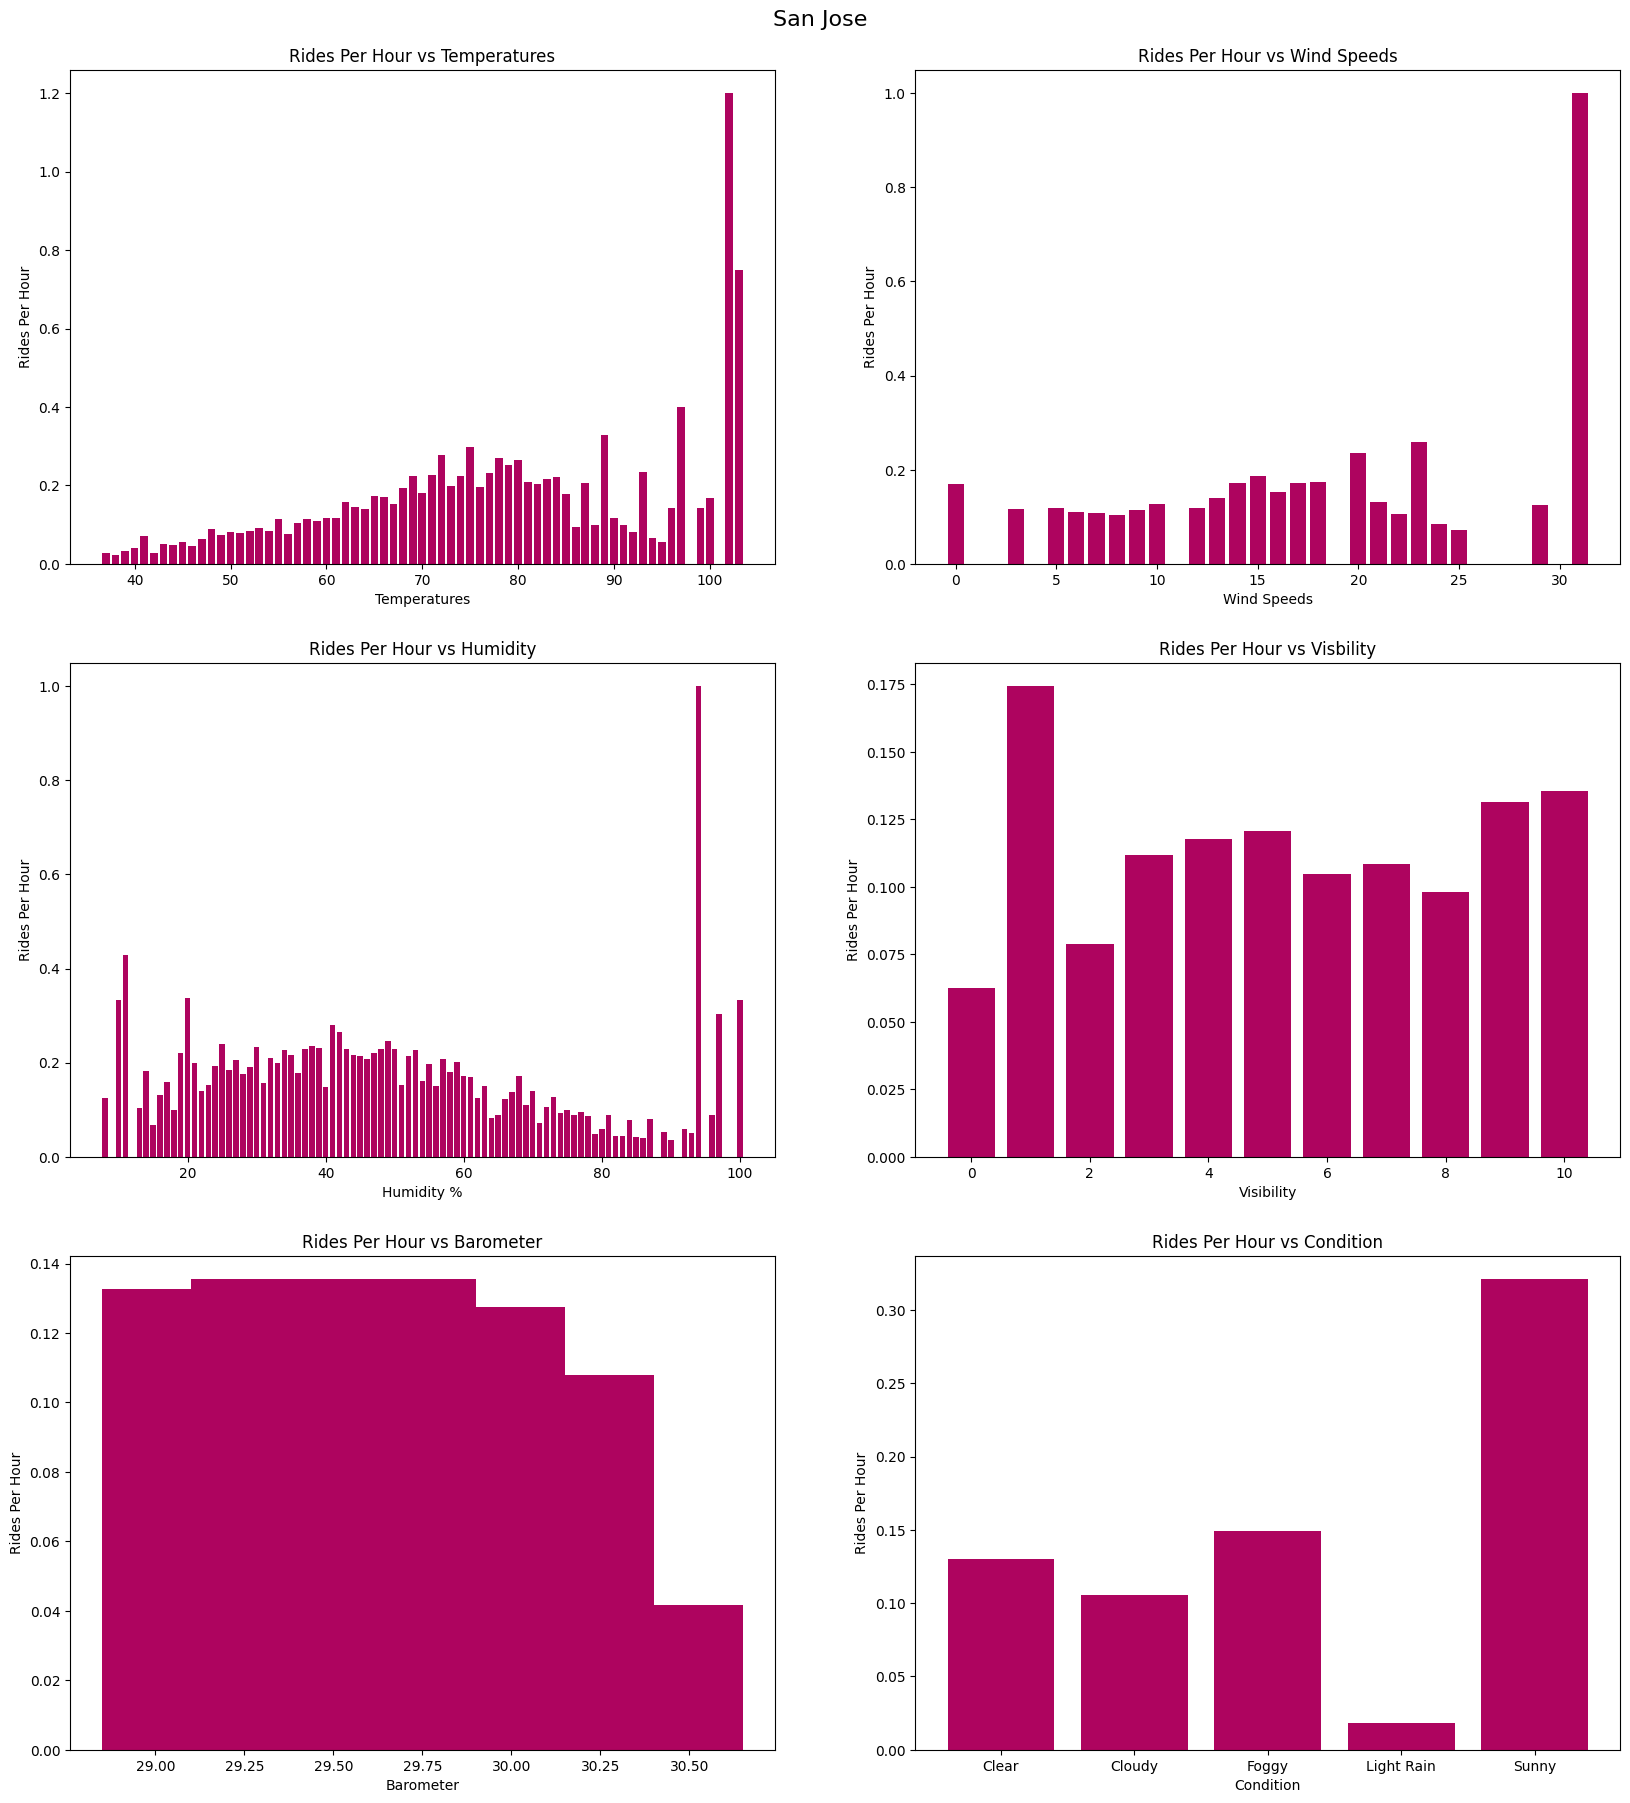

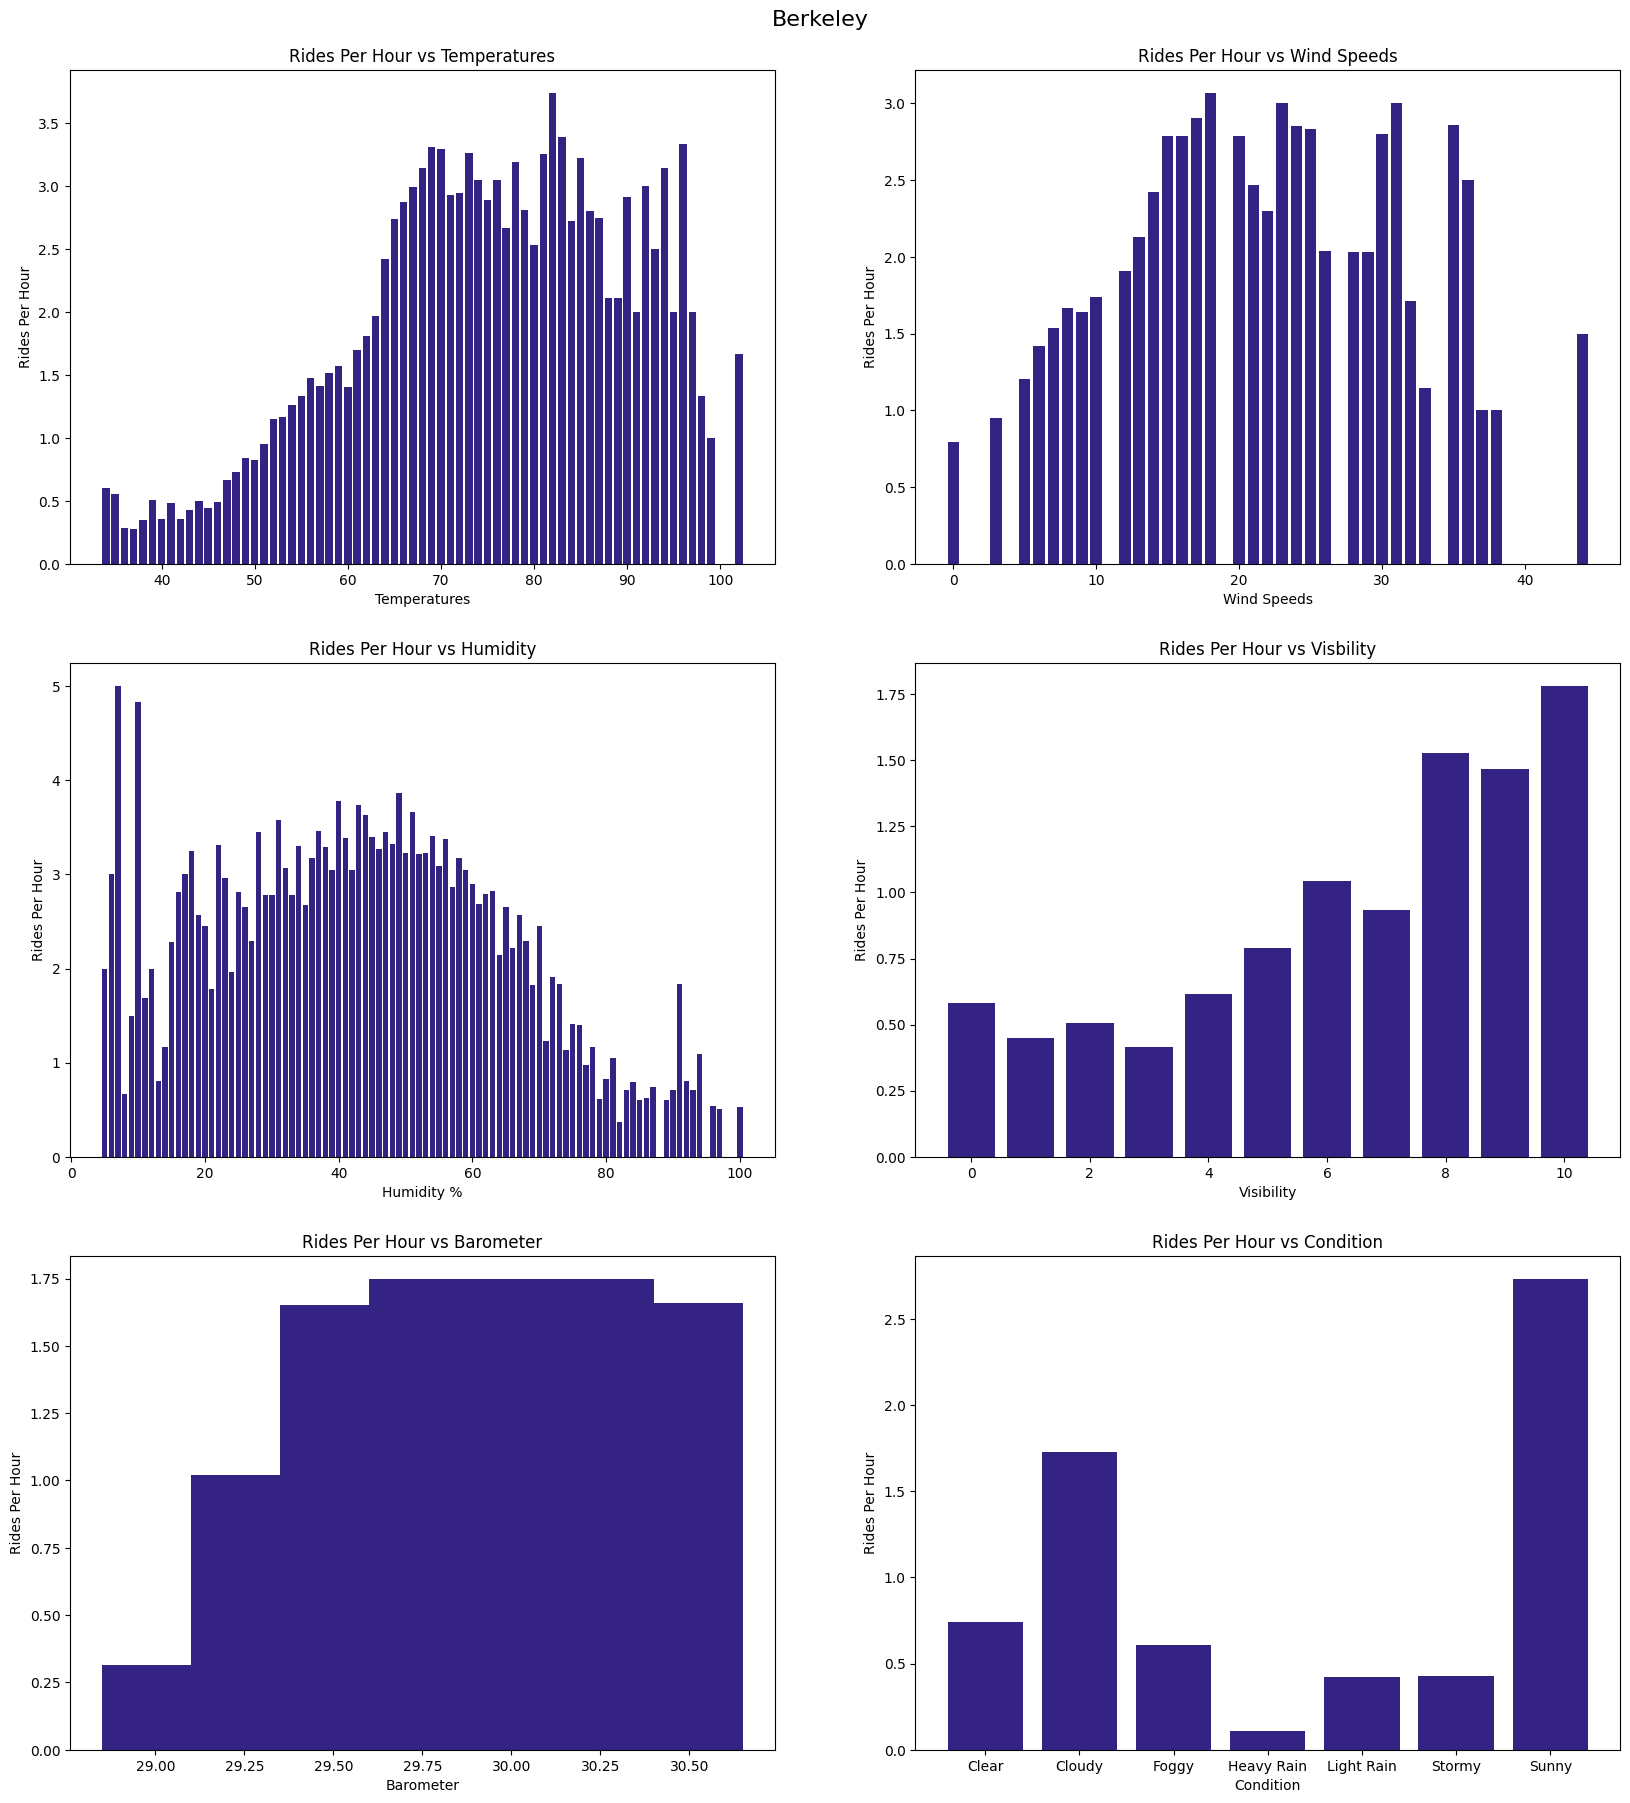

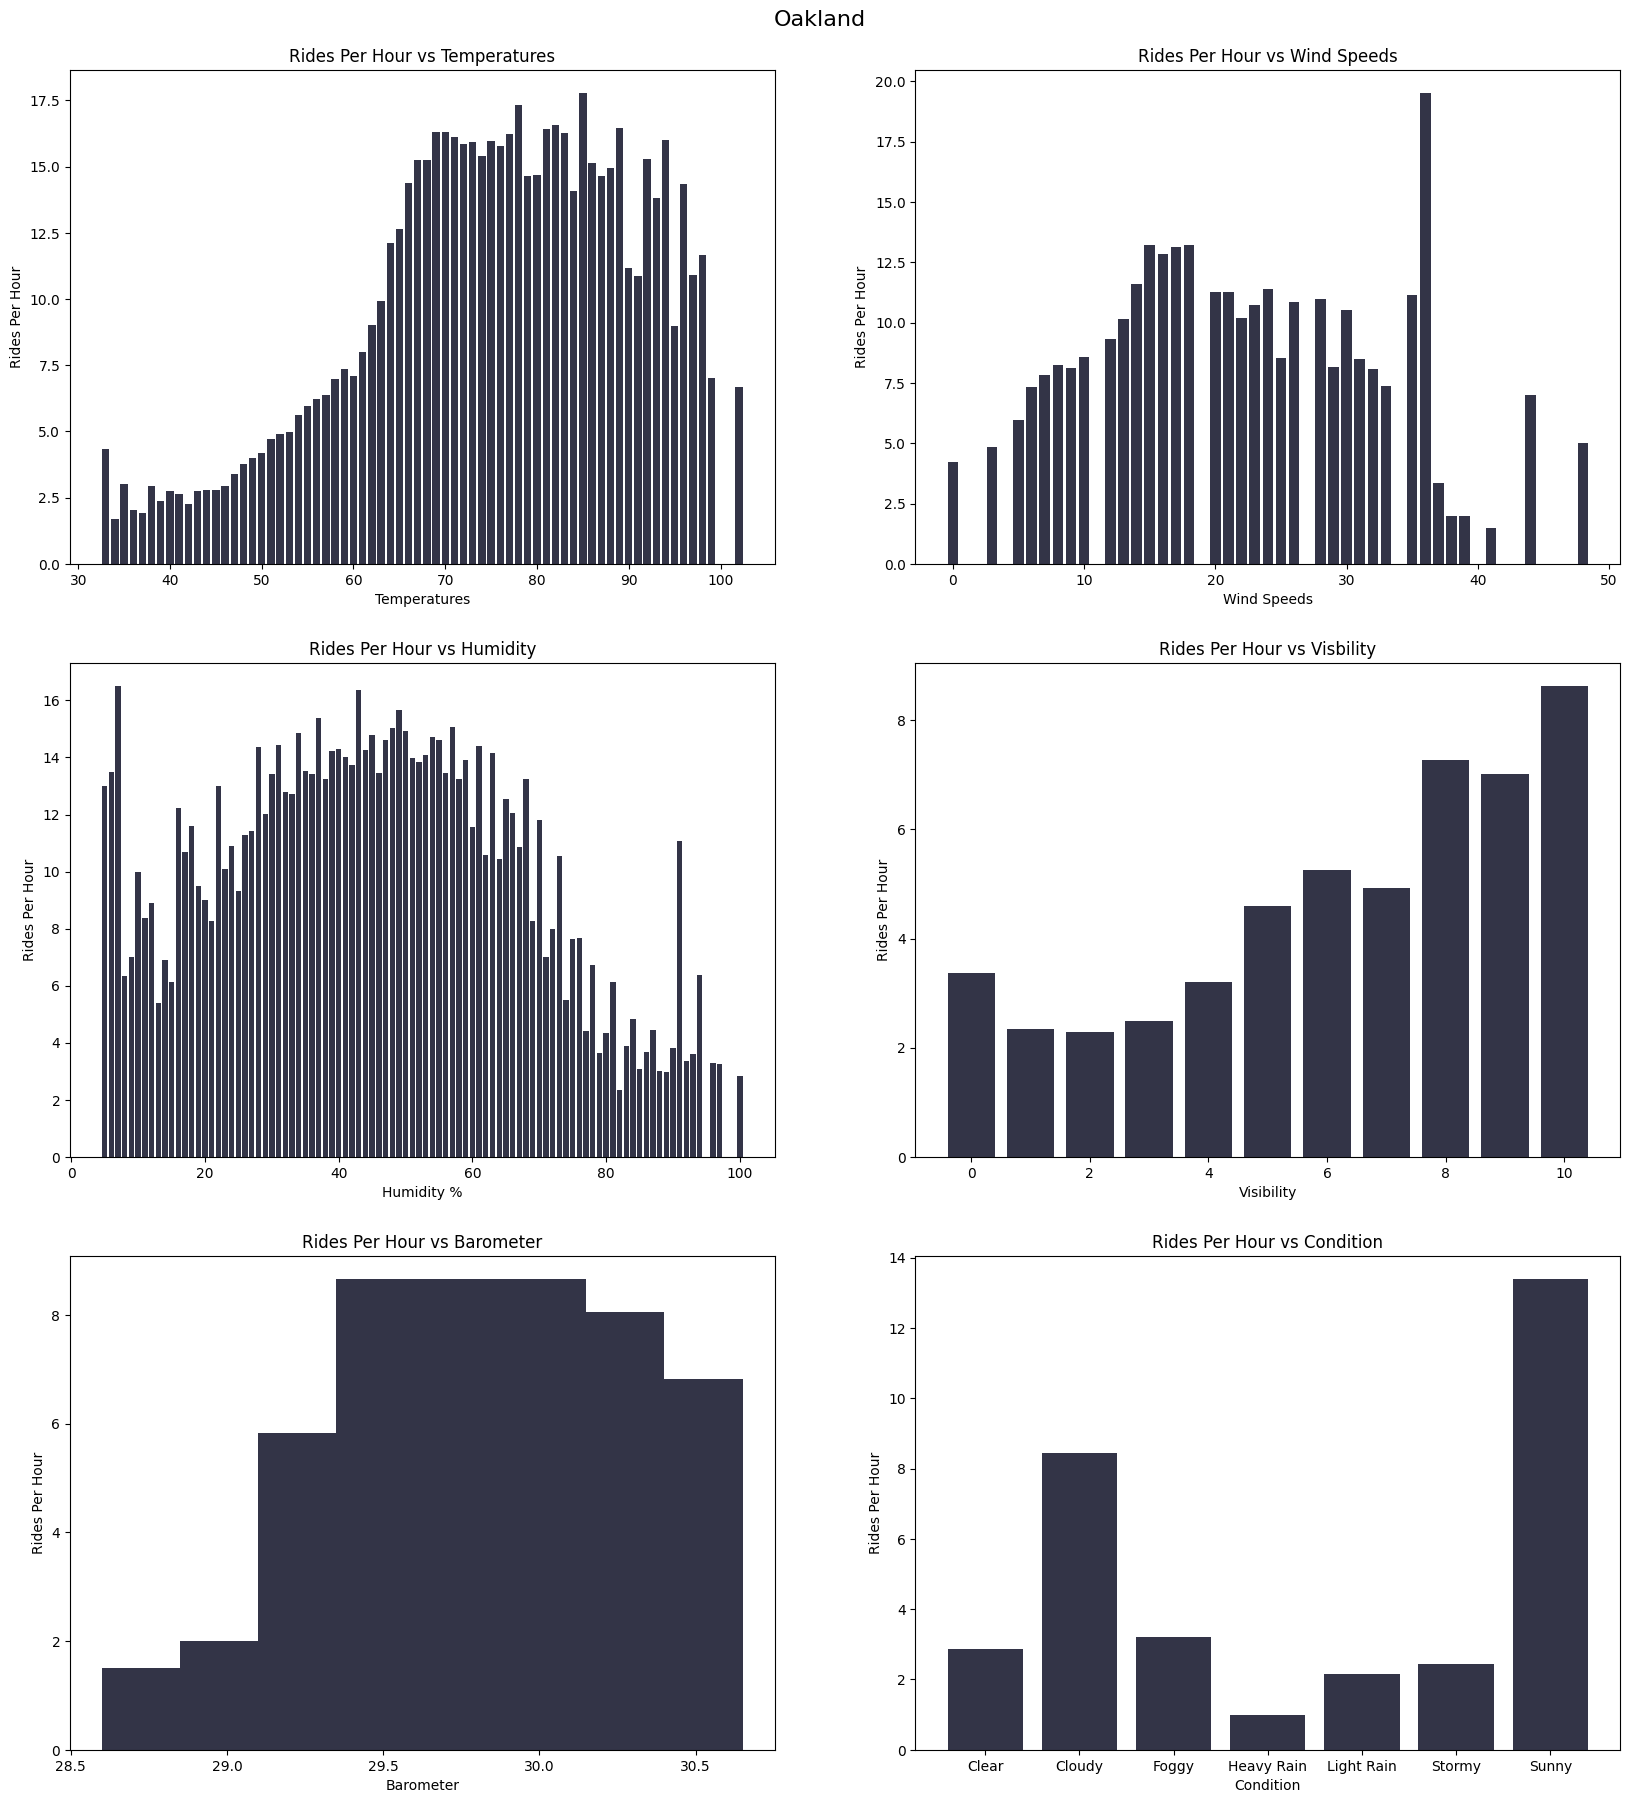

In [219]:
#Creates data tables for each of the four cities tested

create_tables(sf_lyft, sf_weather, '#FF00BF', 'San Francisco')
create_tables(sj_lyft, sj_weather, '#AE045F', 'San Jose')
create_tables(brk_lyft, brk_weather, '#352384', 'Berkeley')
create_tables(okl_lyft, okl_weather, '#333447', 'Oakland')

The tables show that as temperature increases, the amount of rides at that temperature also does in San Francisco, Oakland and Berkeley. The amount of rides per wind speed has a bell shape distribution for all cities except San Jose. The amount of rides seems to significantly decrease as humdity rises above 80% in all cities. The amount of rides increase with higher distances of visibility, except in San Jose. Barometer values seem to not have an effect on the amount of rides taken. Finally, the majority of rides in all cities occur when it is sunny followed by cloudy outside.

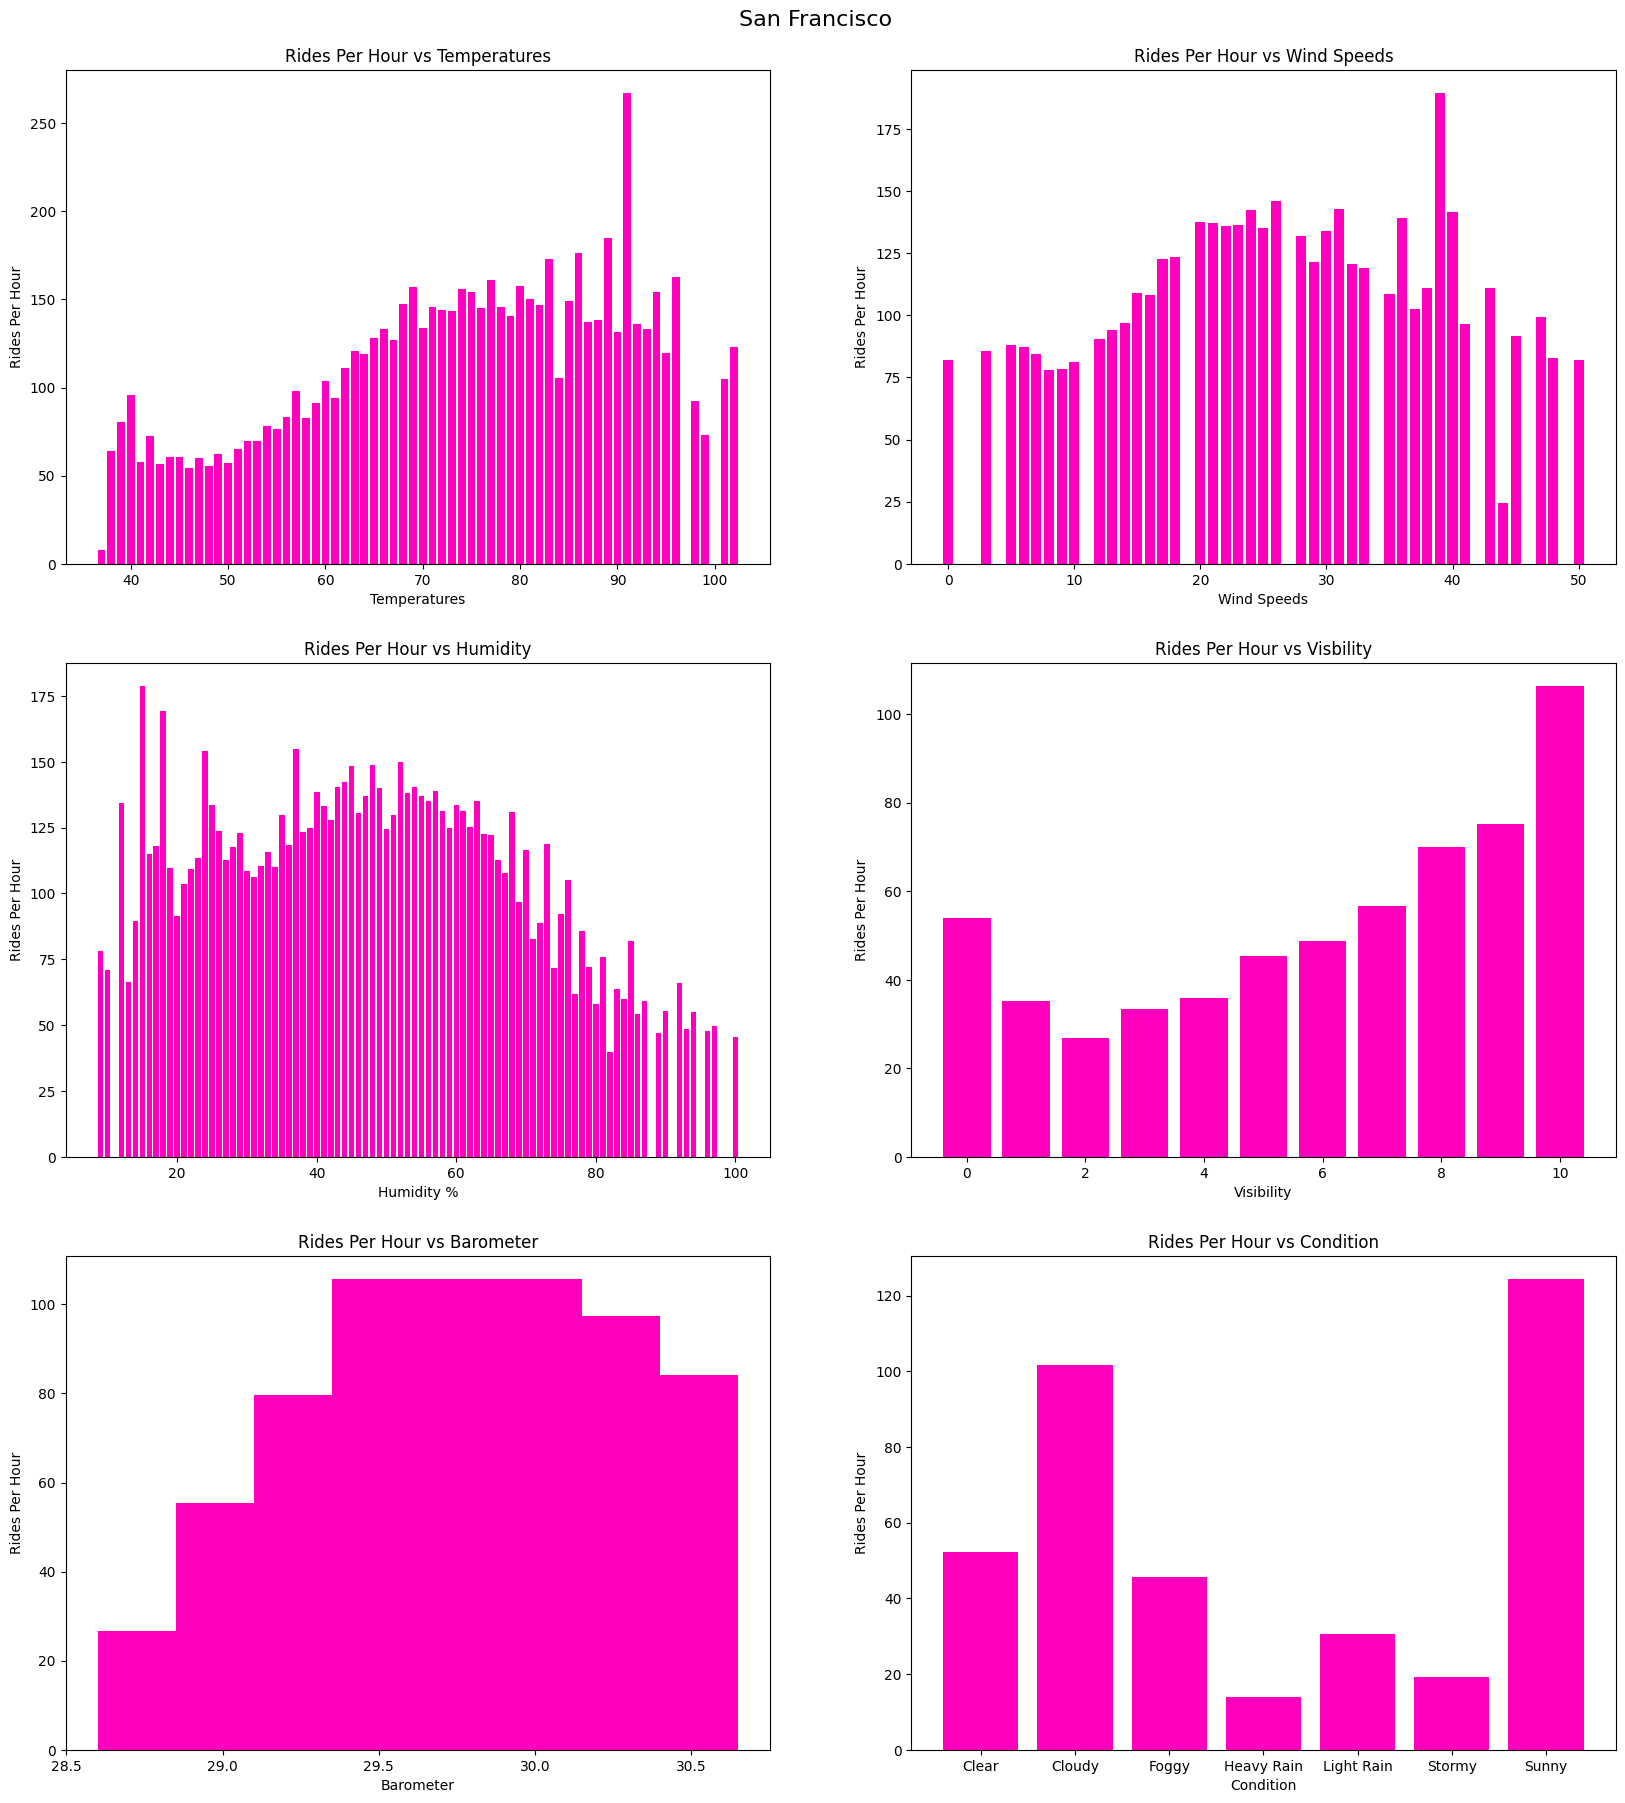

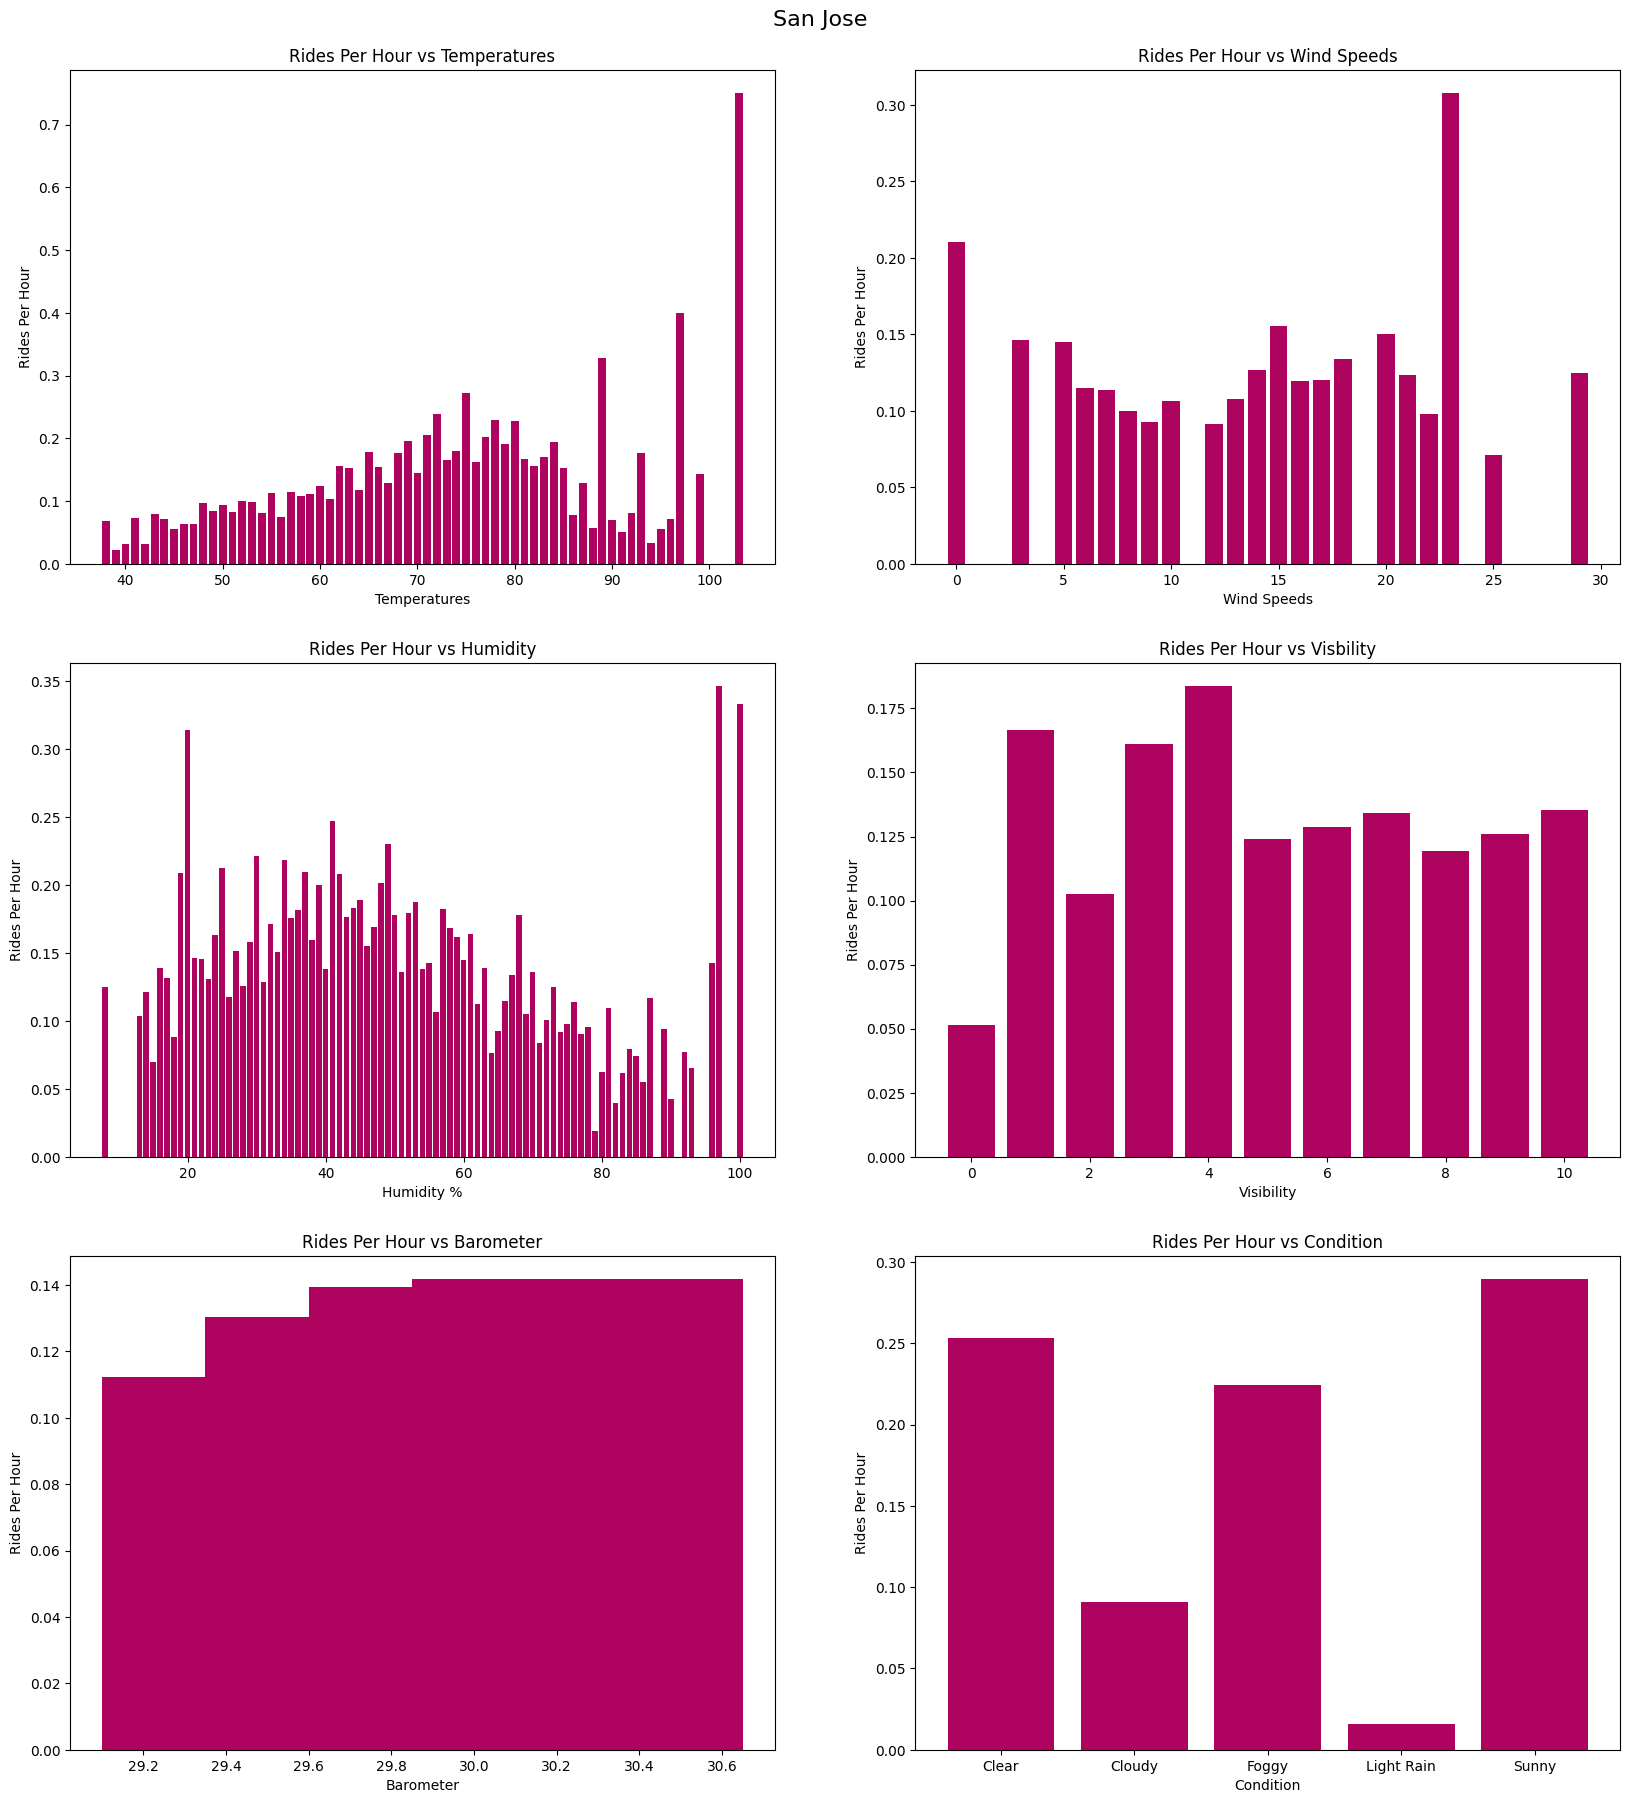

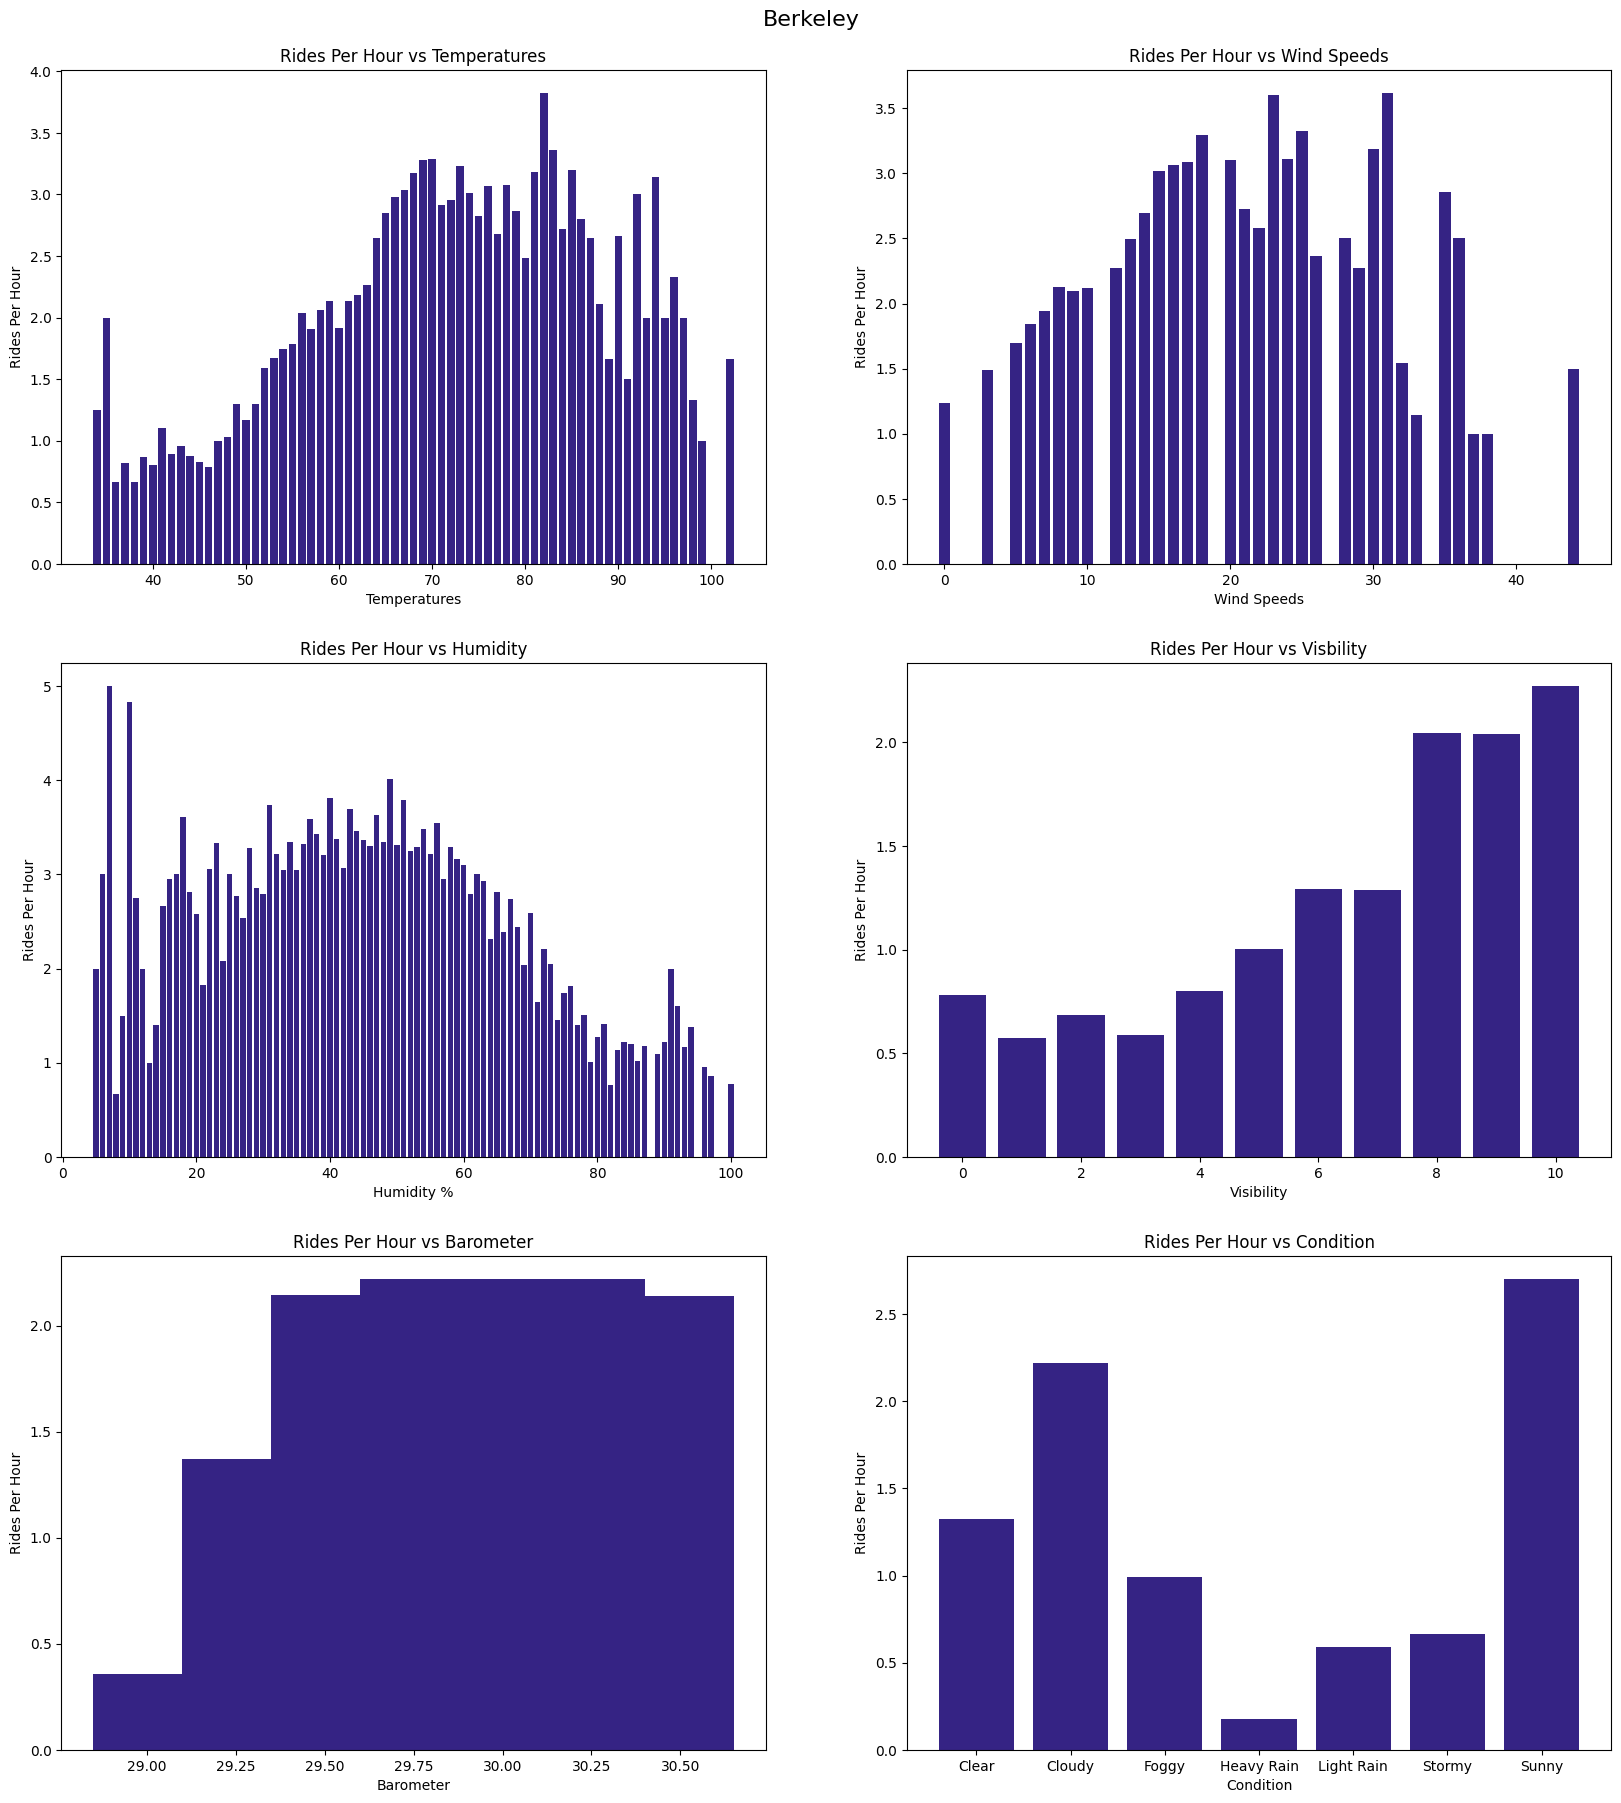

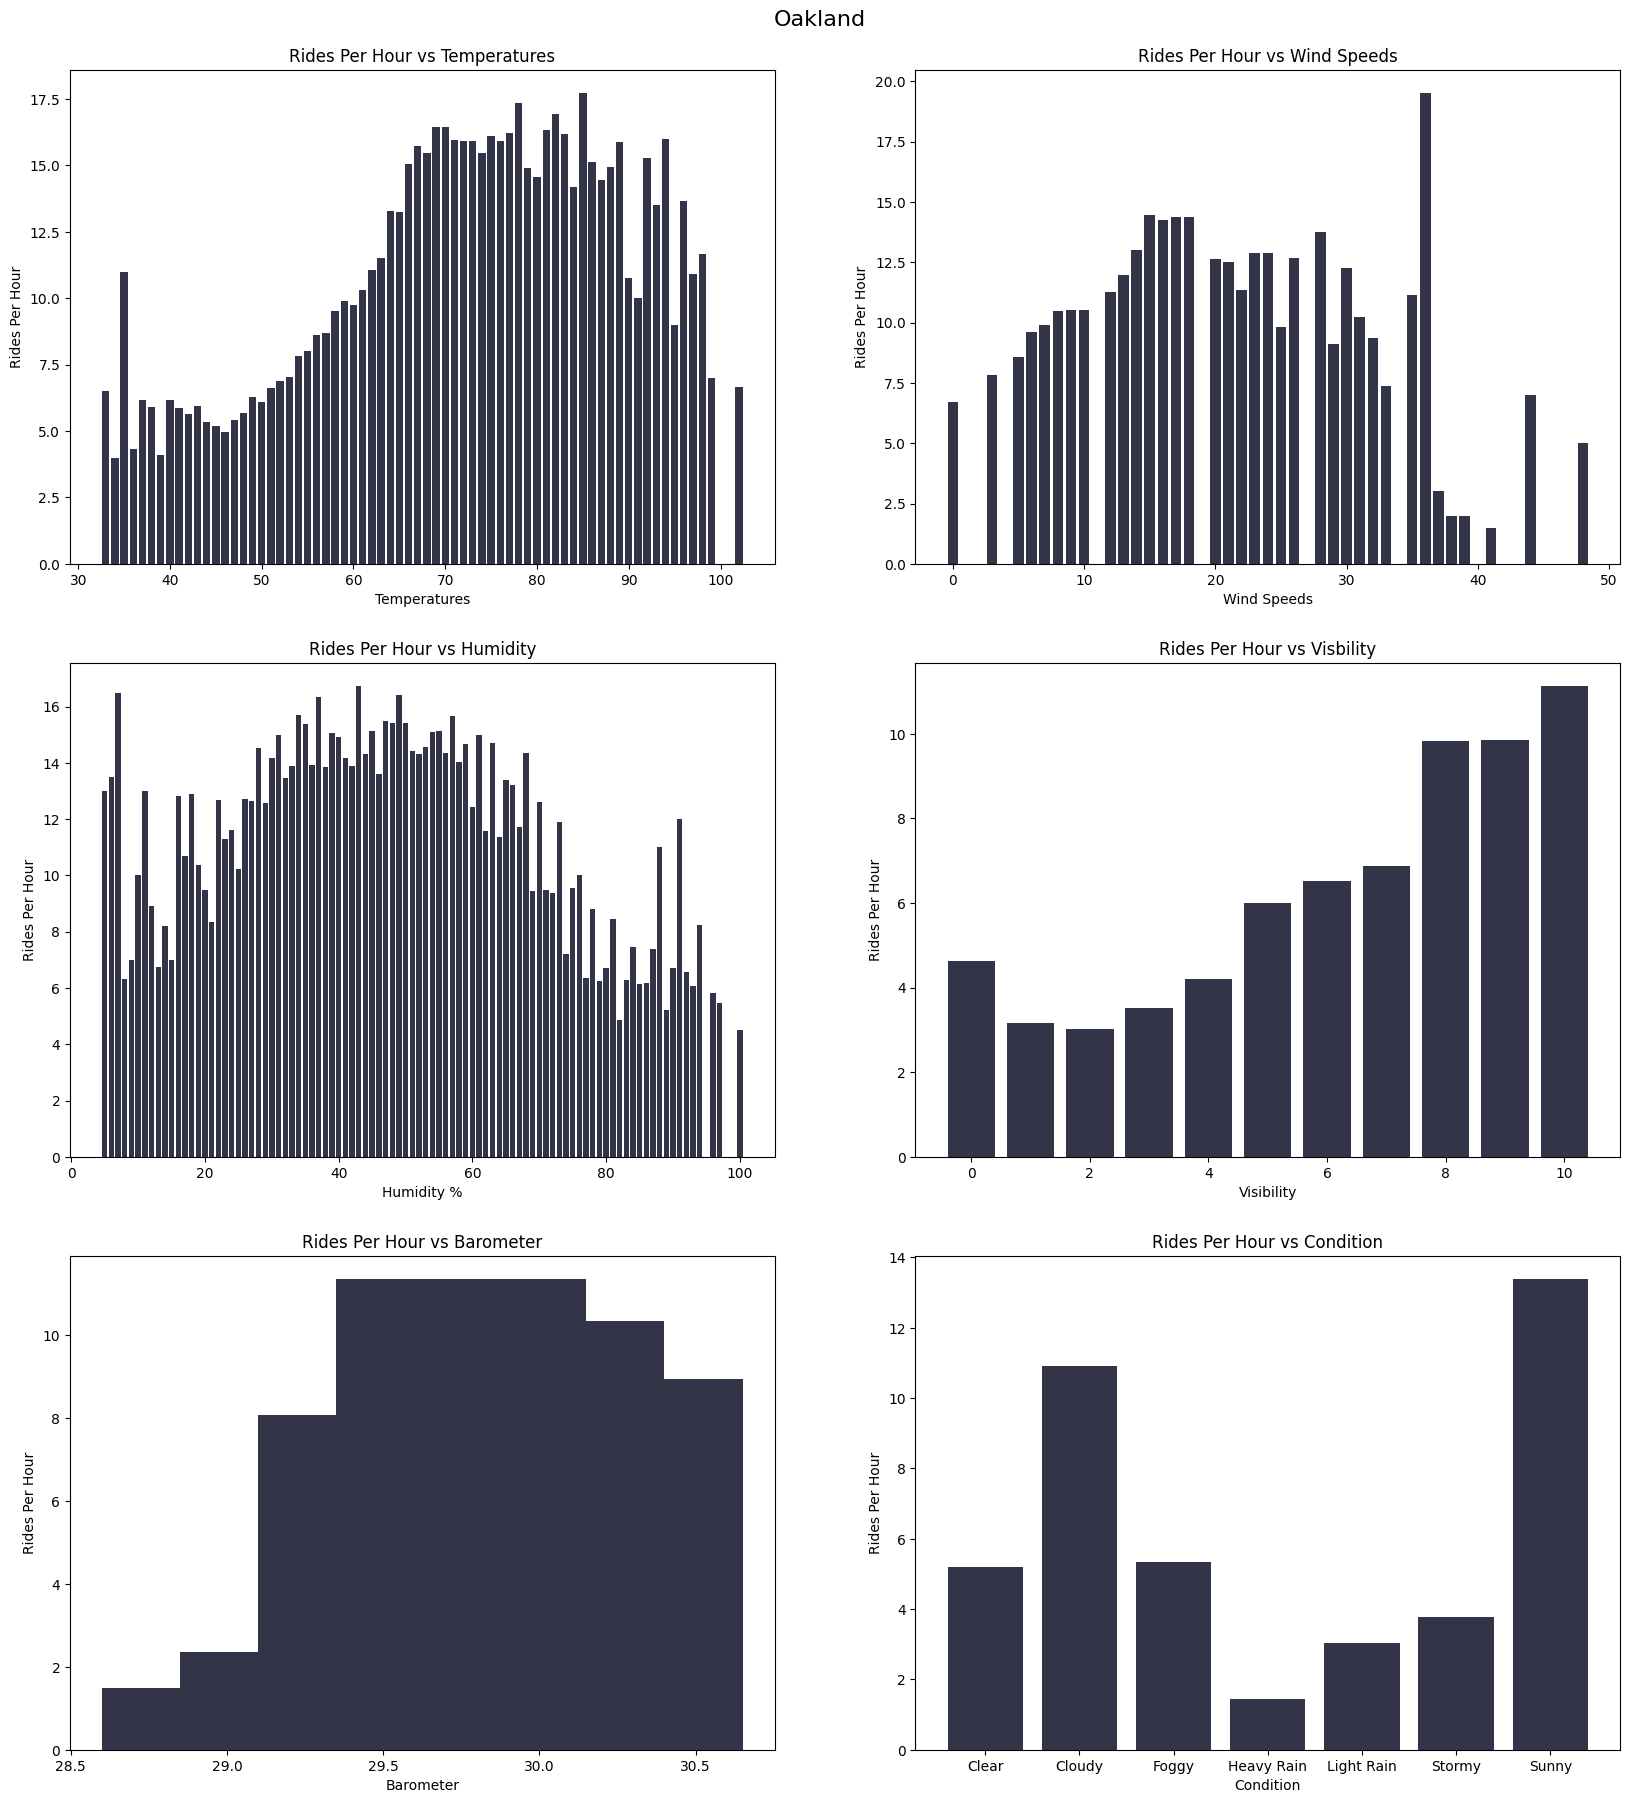

In [220]:
#Creates data tables for the awake hours for each of the four cities tested

create_tables(awake(sf_lyft, 'reg'), awake(sf_weather, 'wea'), '#FF00BF', 'San Francisco')
create_tables(awake(sj_lyft, 'reg'), awake(sj_weather, 'wea'), '#AE045F', 'San Jose')
create_tables(awake(brk_lyft, 'reg'), awake(brk_weather, 'wea'), '#352384', 'Berkeley')
create_tables(awake(okl_lyft, 'reg'), awake(okl_weather, 'wea'), '#333447', 'Oakland')

Trends in weather conditions for waking hours (6am-12am) seem to be similar for the trends for all hours which show that the addition of the night hours (12am-6am) do not have an effect on the trends seen in the graphs including all hours. 

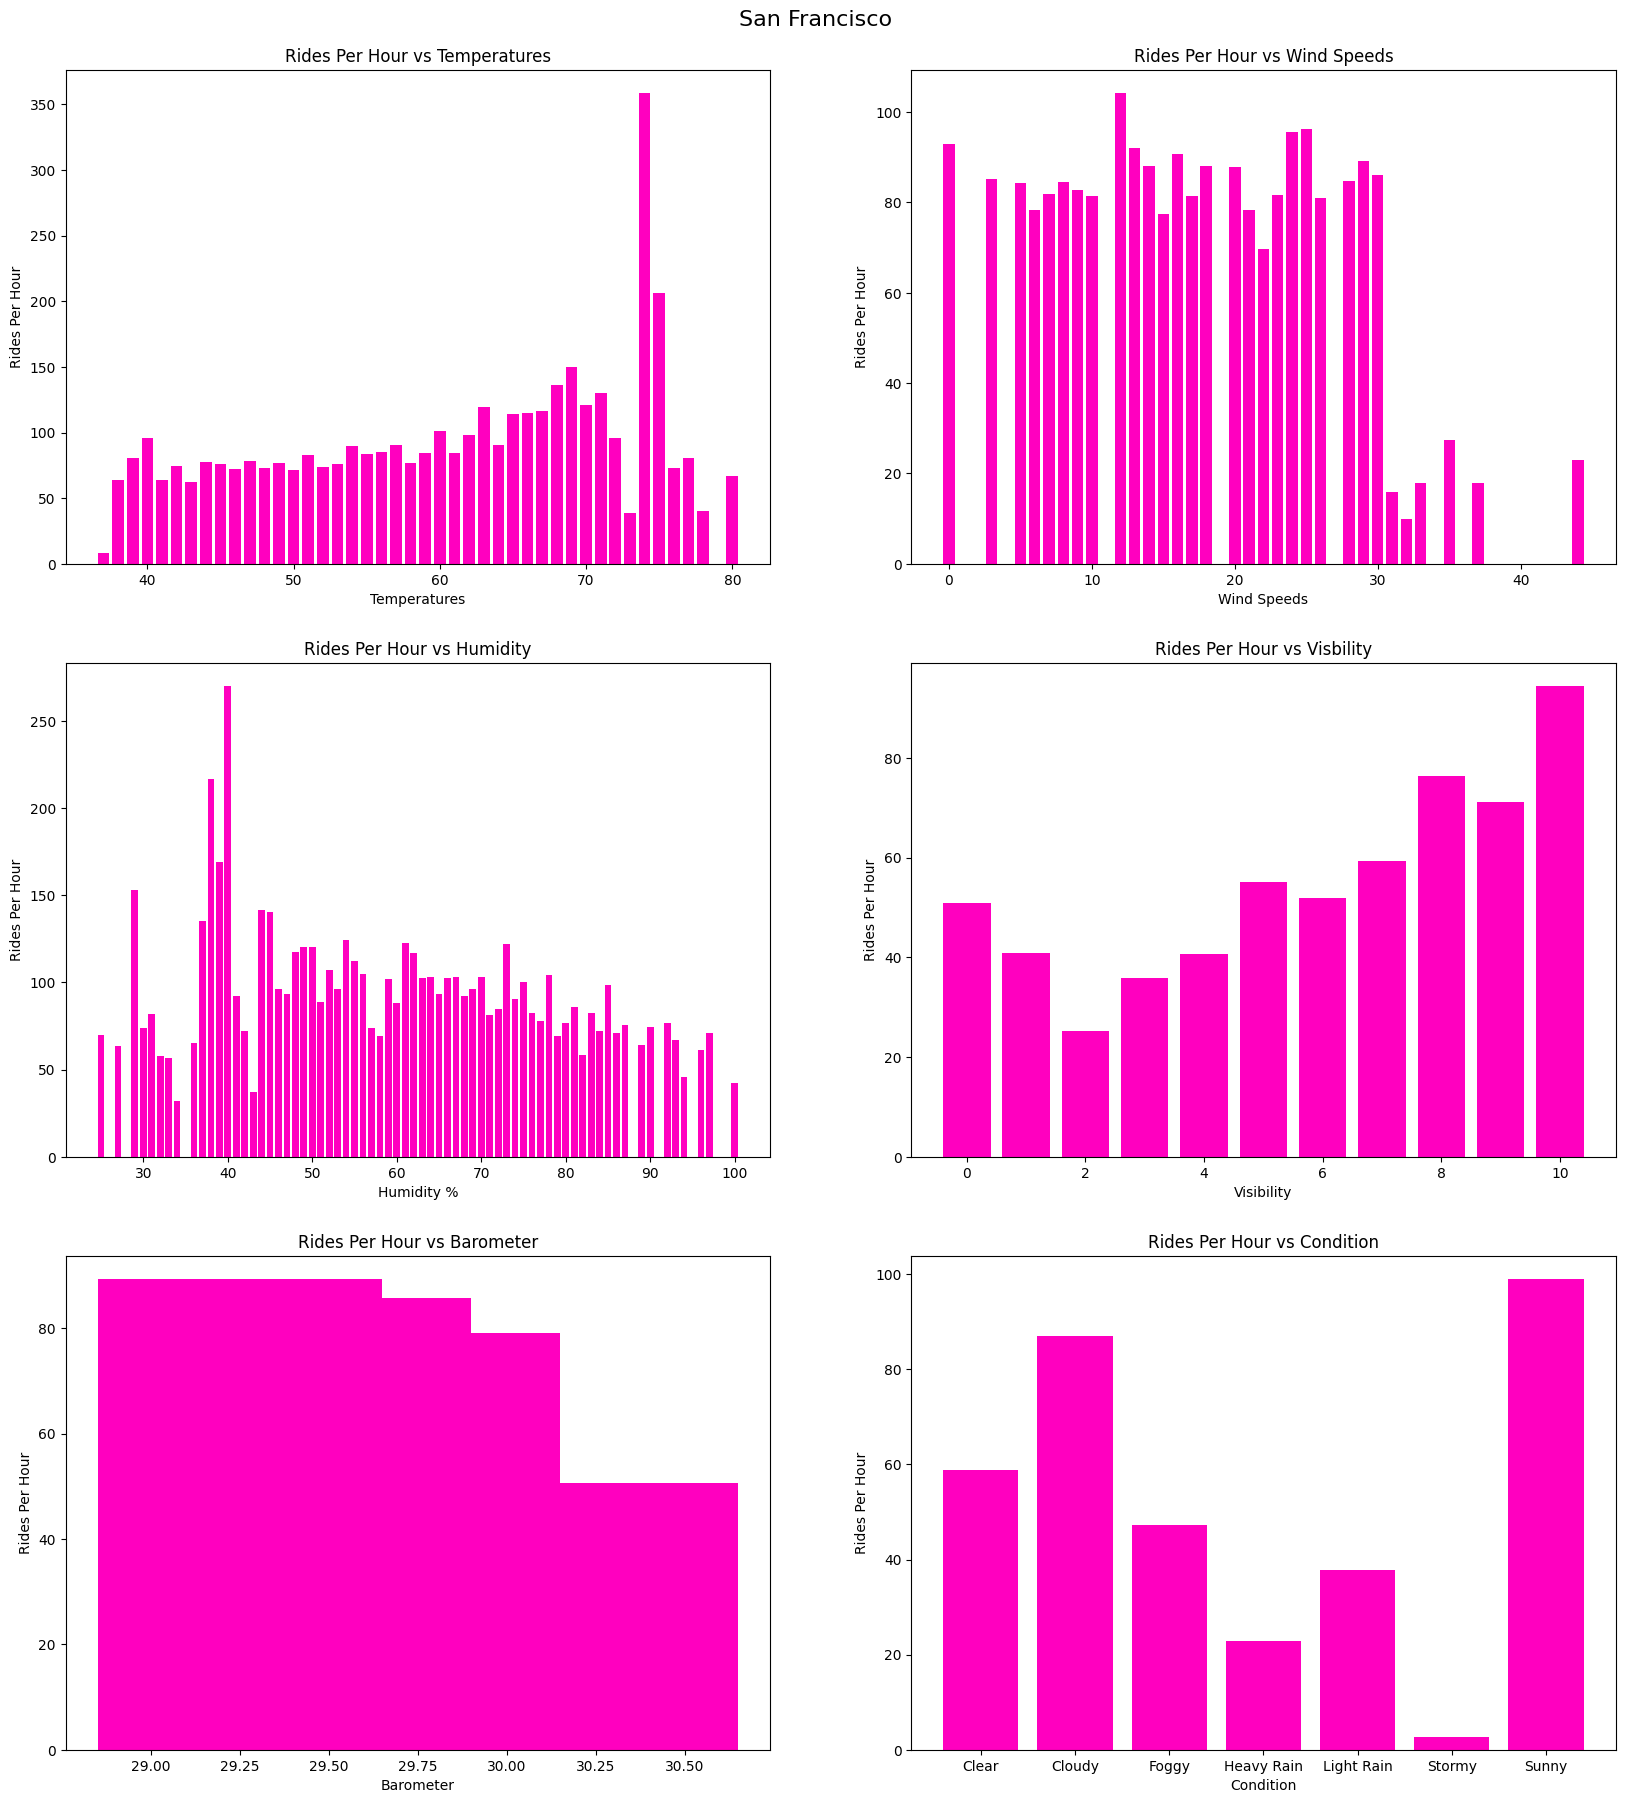

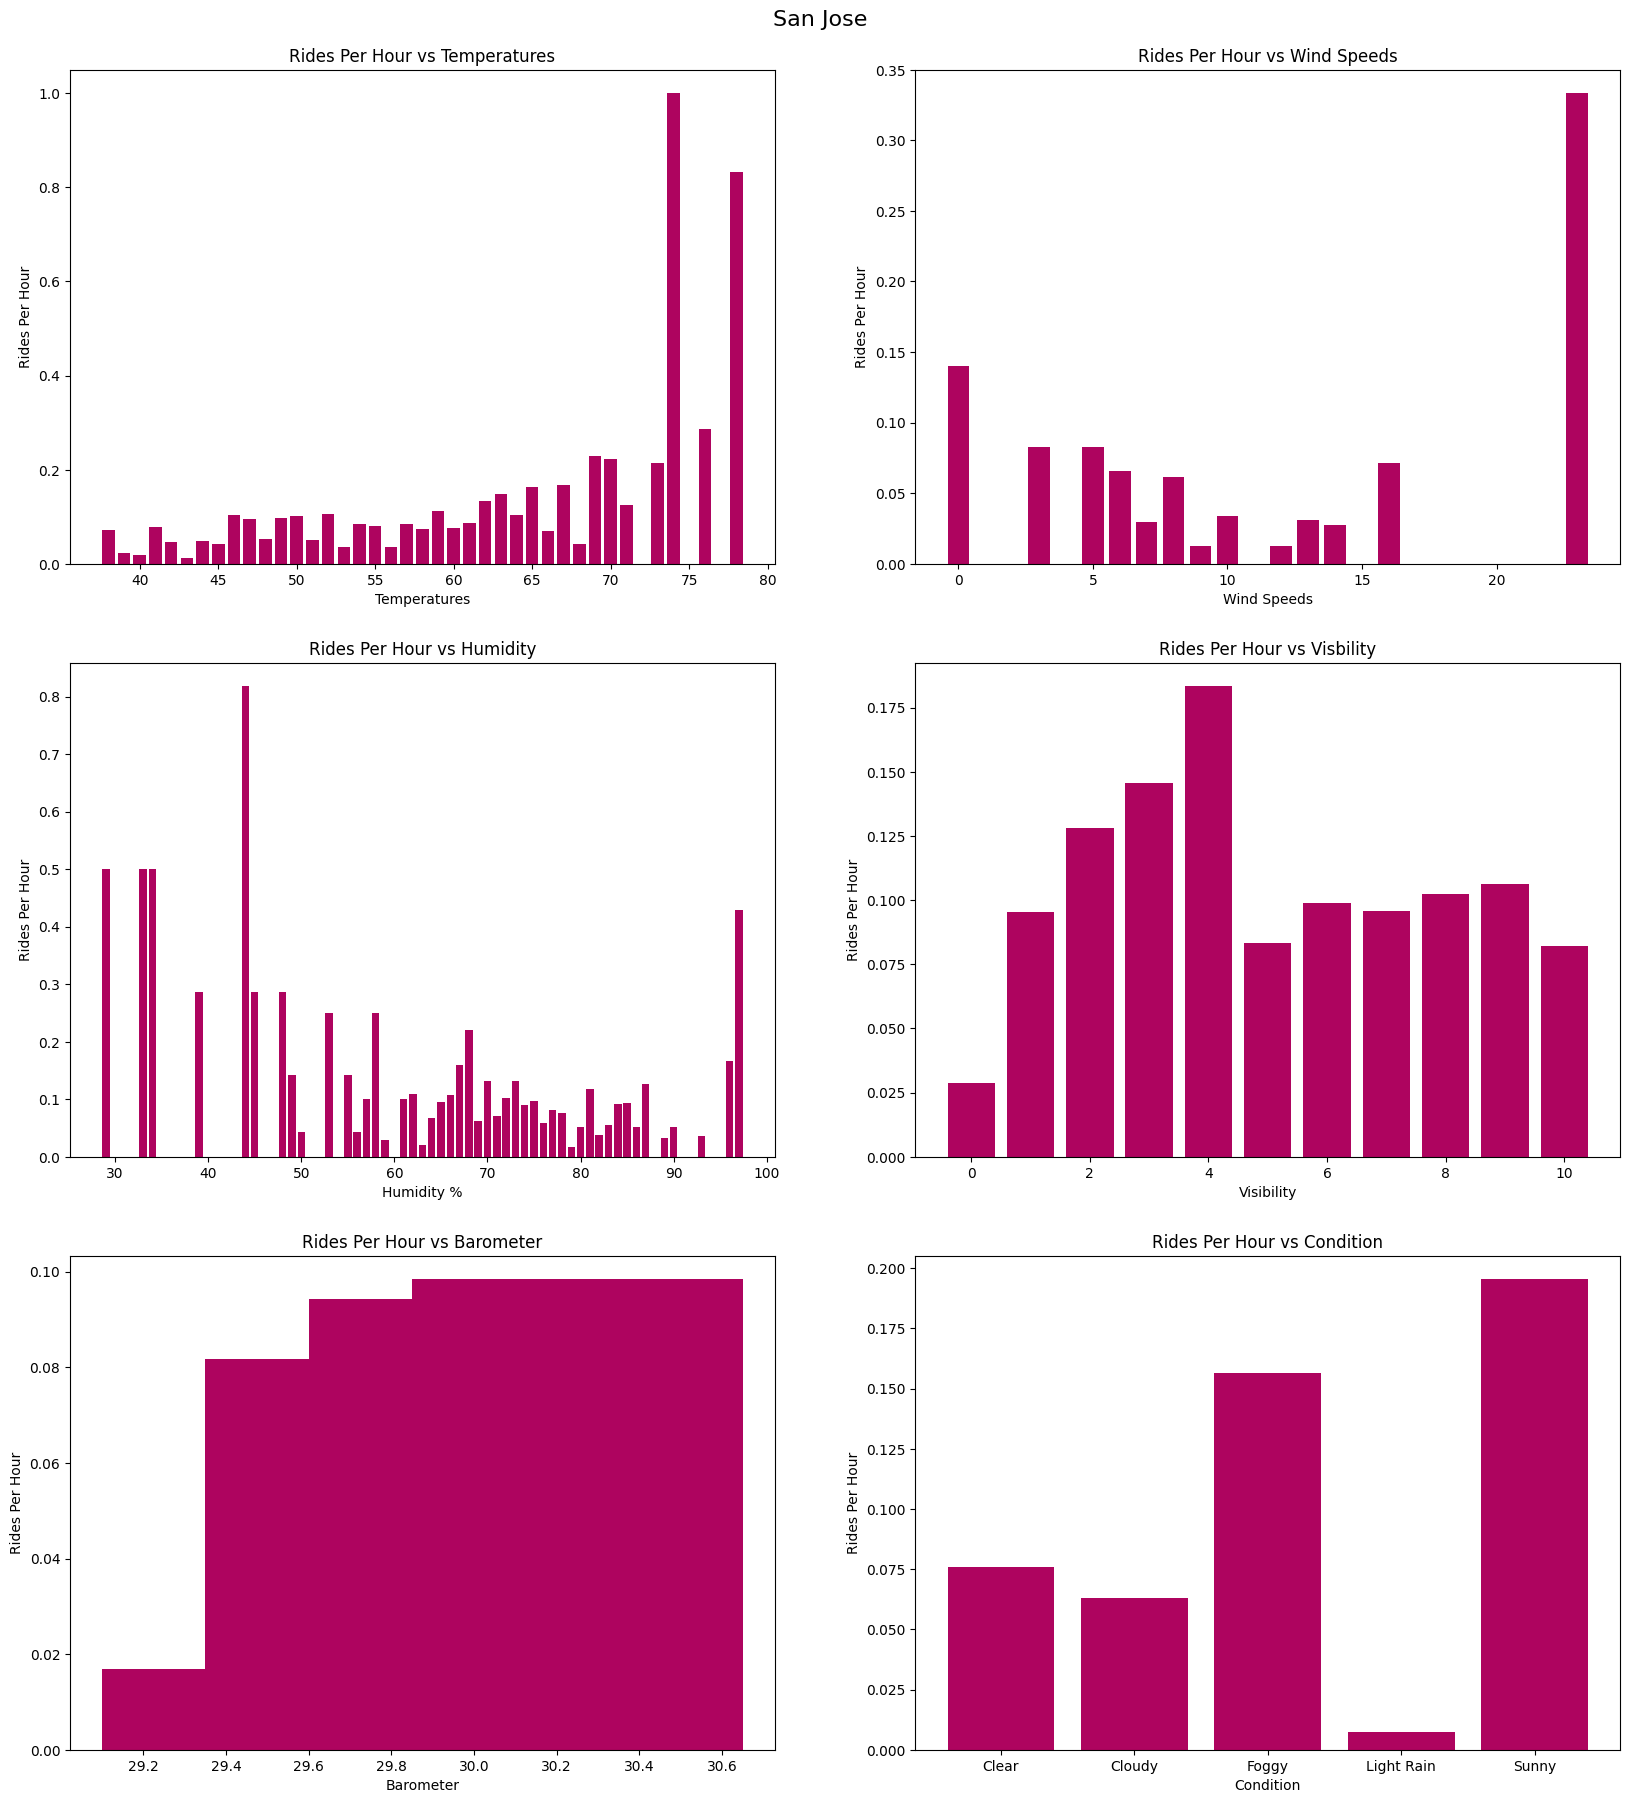

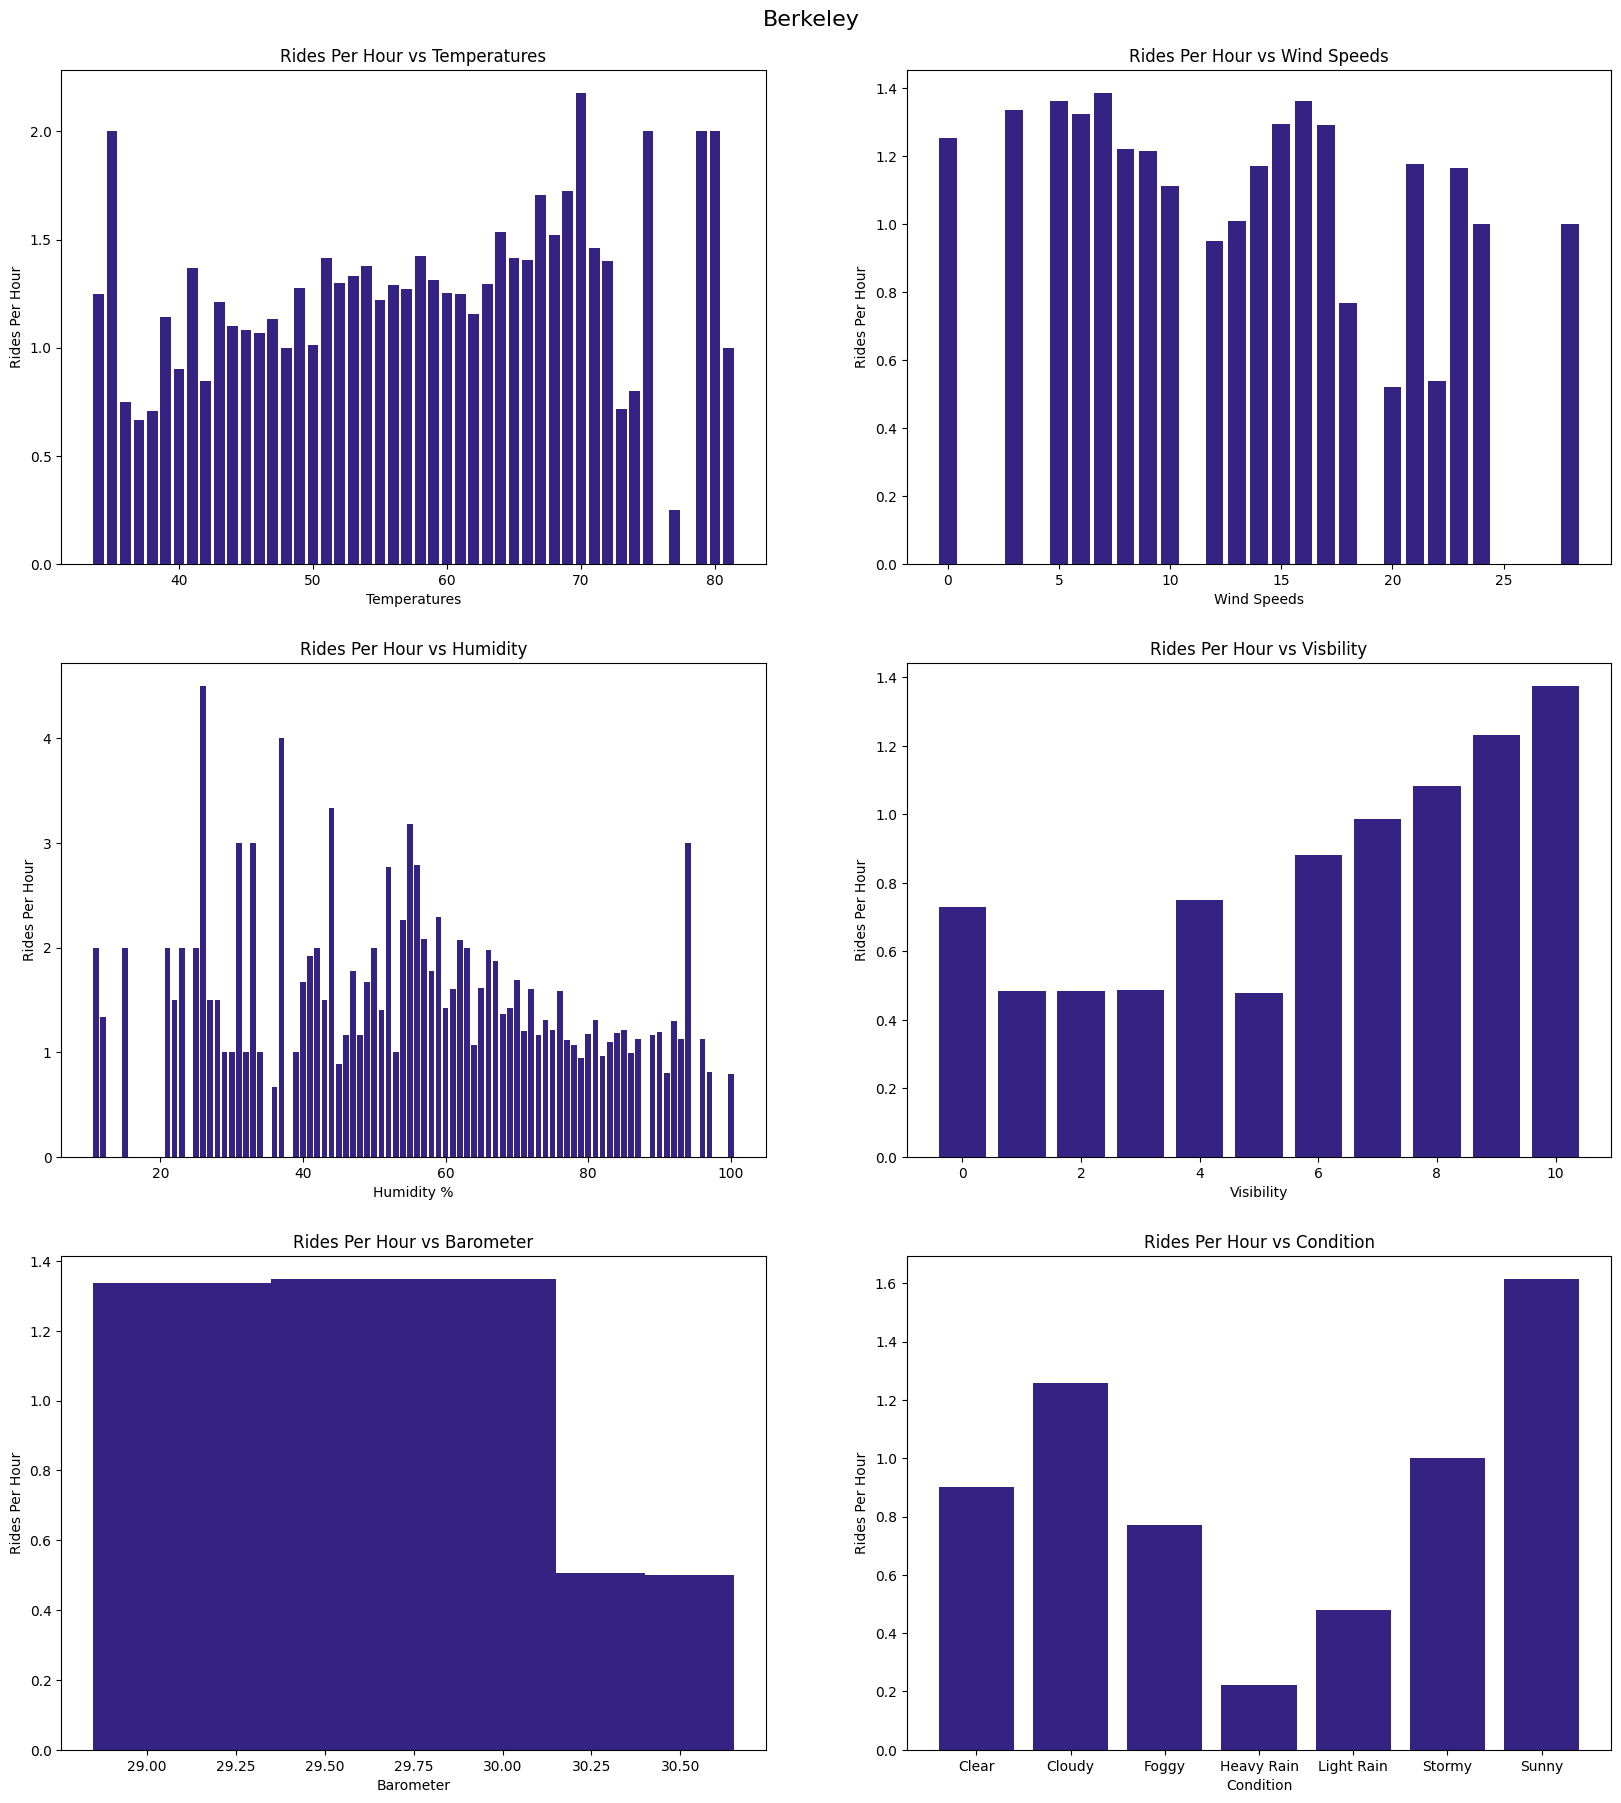

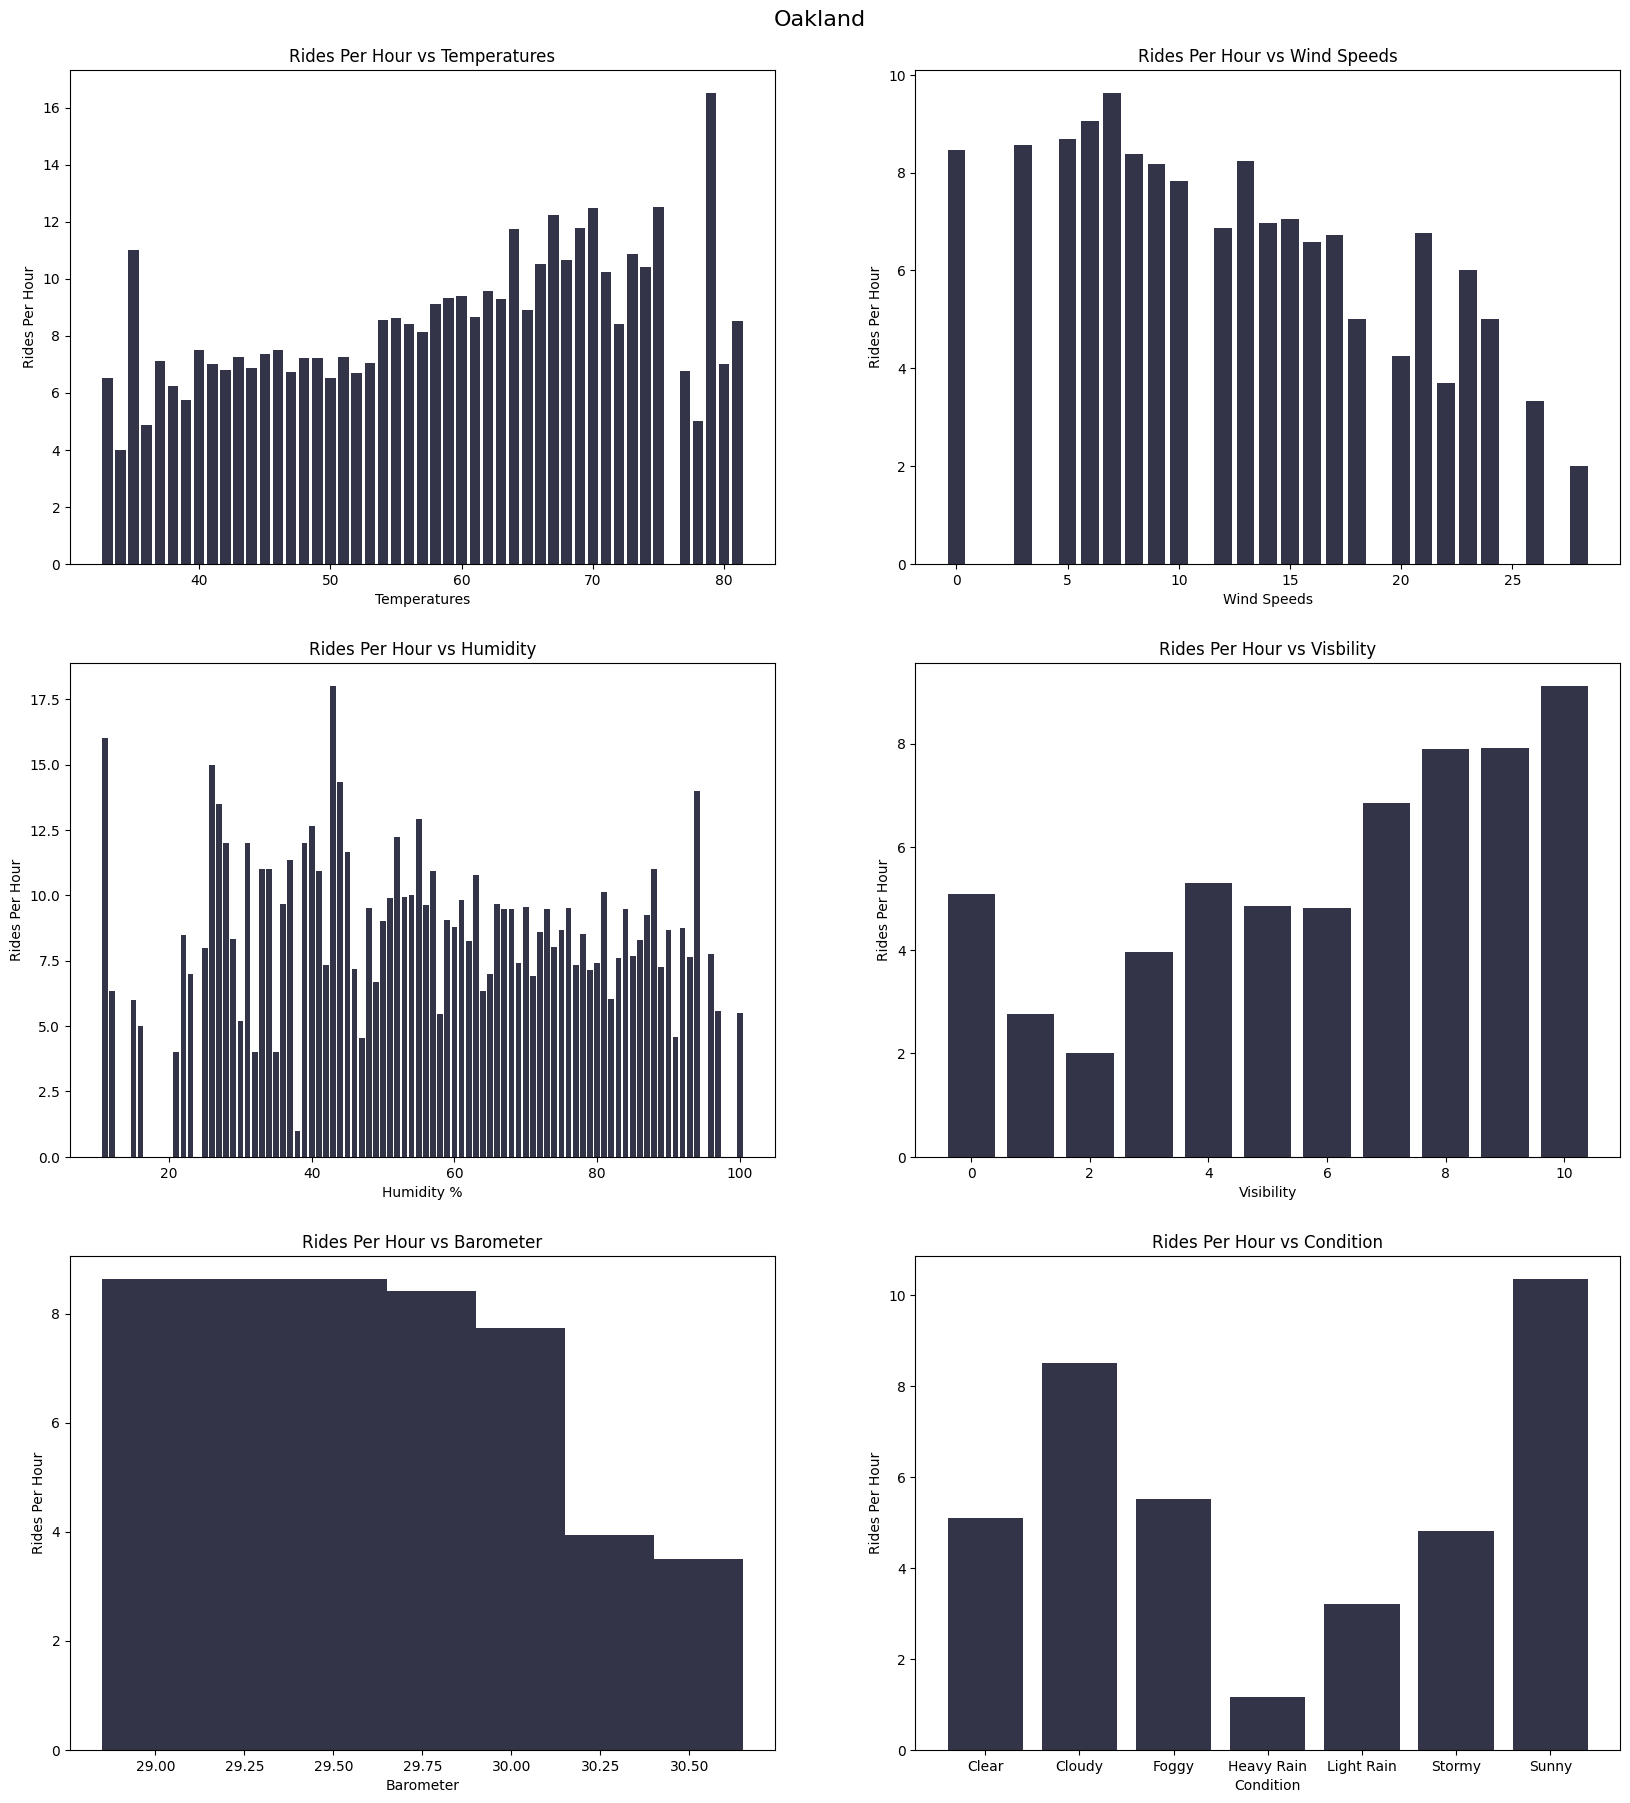

In [221]:
#Creates data tables for the morning commute hours for each of the four cities tested

create_tables(morning_commute(sf_lyft, 'reg'), morning_commute(sf_weather, 'wea'), '#FF00BF', 'San Francisco')
create_tables(morning_commute(sj_lyft, 'reg'), morning_commute(sj_weather, 'wea'), '#AE045F', 'San Jose')
create_tables(morning_commute(brk_lyft, 'reg'), morning_commute(brk_weather, 'wea'), '#352384', 'Berkeley')
create_tables(morning_commute(okl_lyft, 'reg'), morning_commute(okl_weather, 'wea'), '#333447', 'Oakland')

All the weather trends in the data with all hours seem to weaken or disapear when data is limited to morning commute hours (6am-10am). This could be because people have to get to work regardless of weather conditions which means that the amount of rides at this time of day is more likely to be consistent.

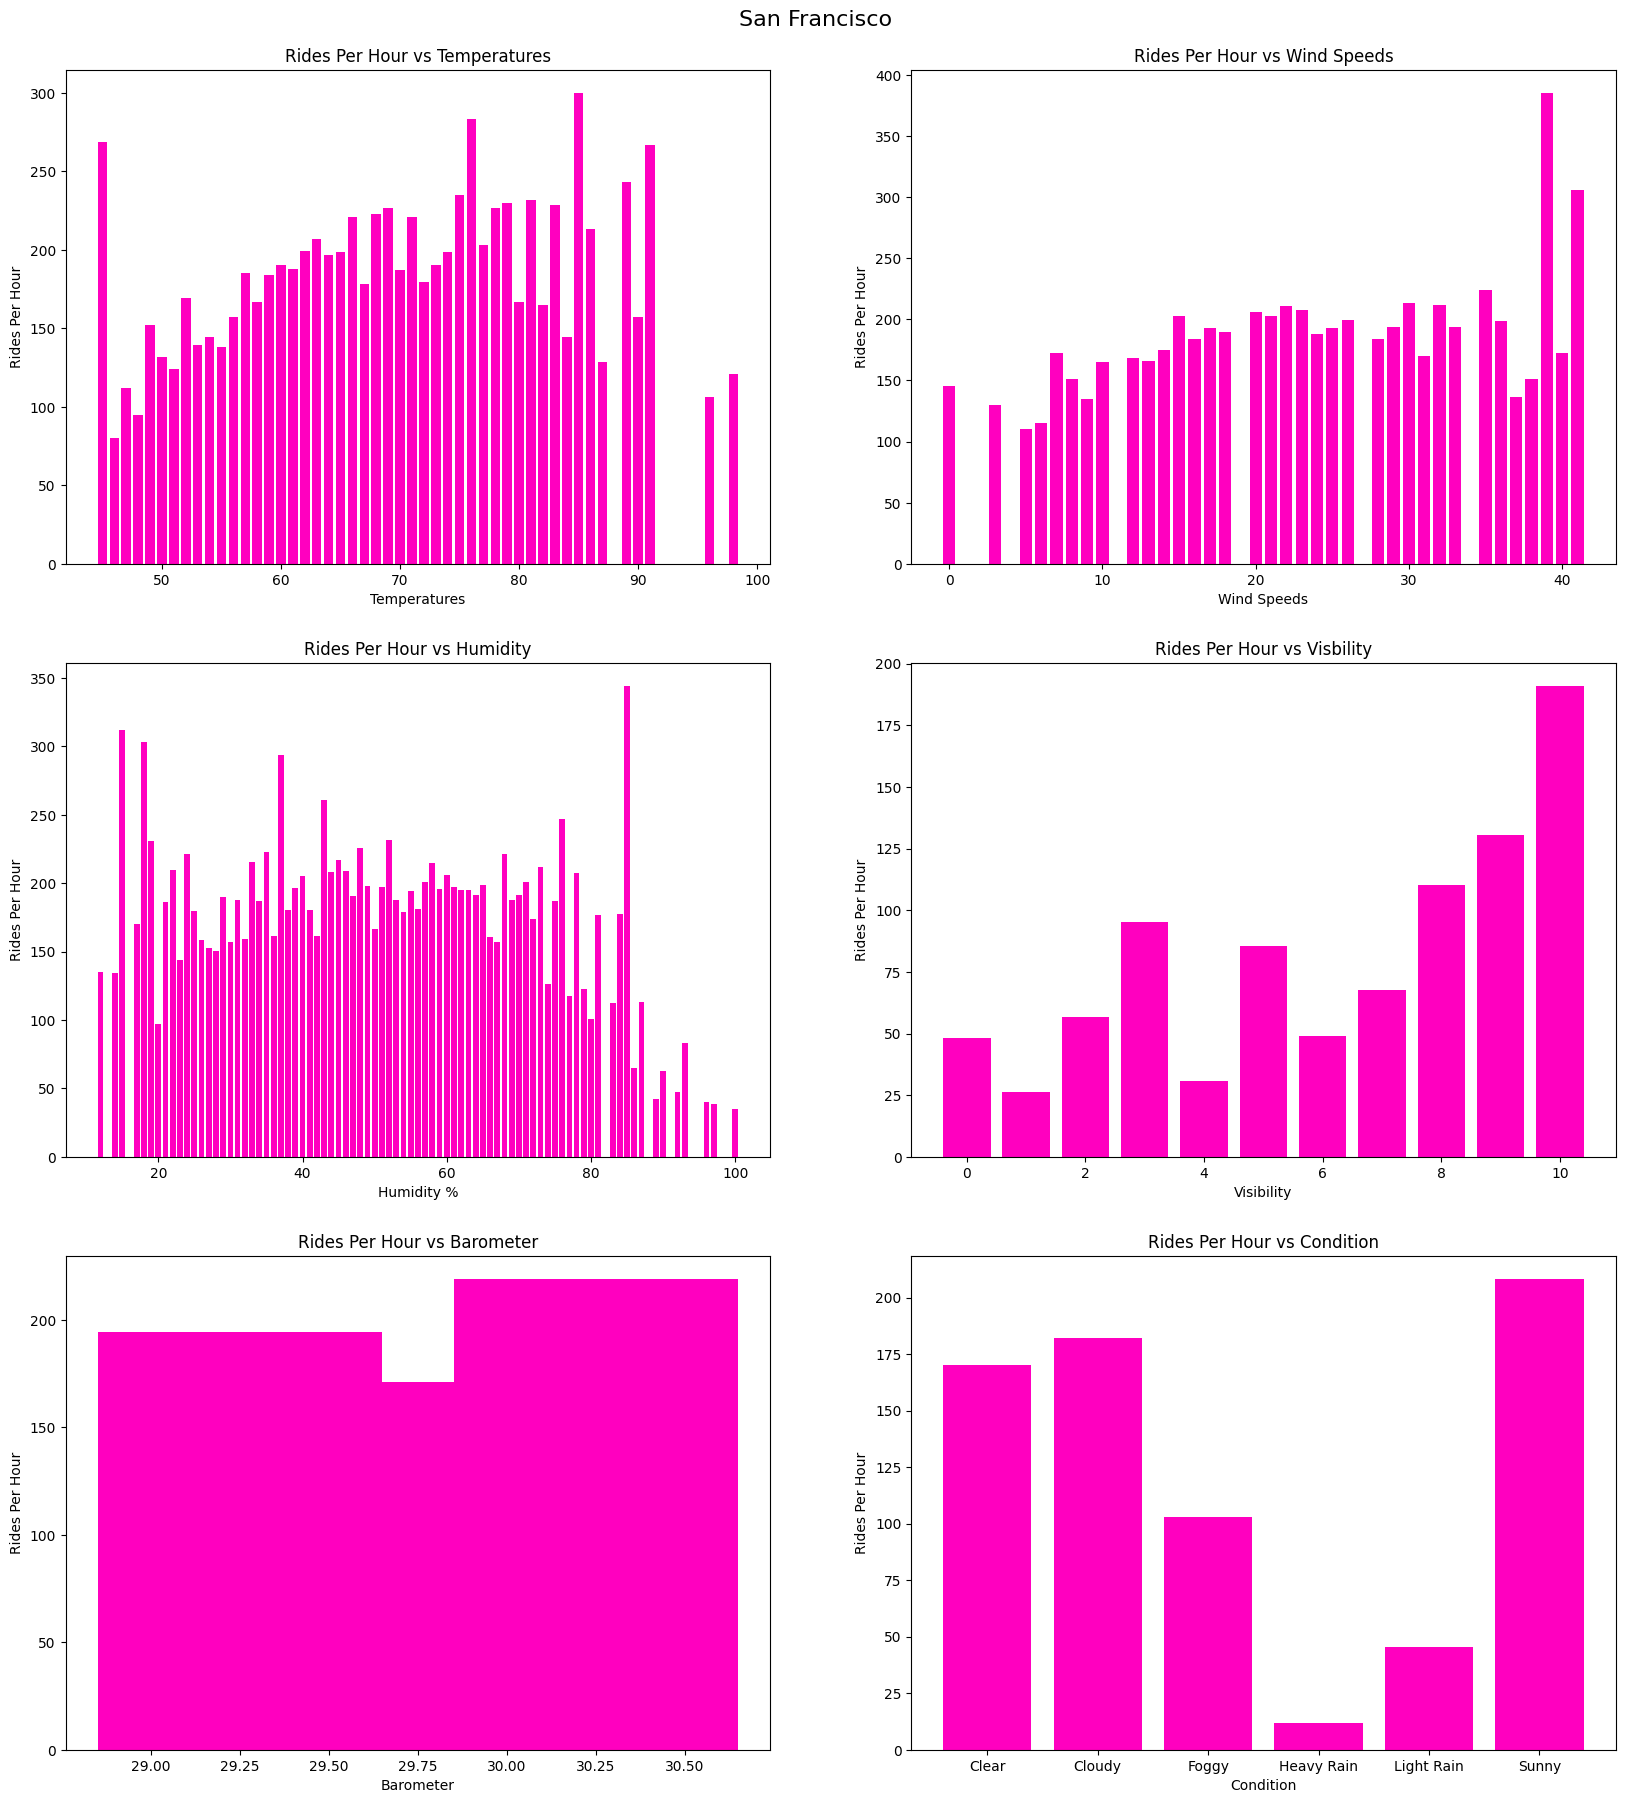

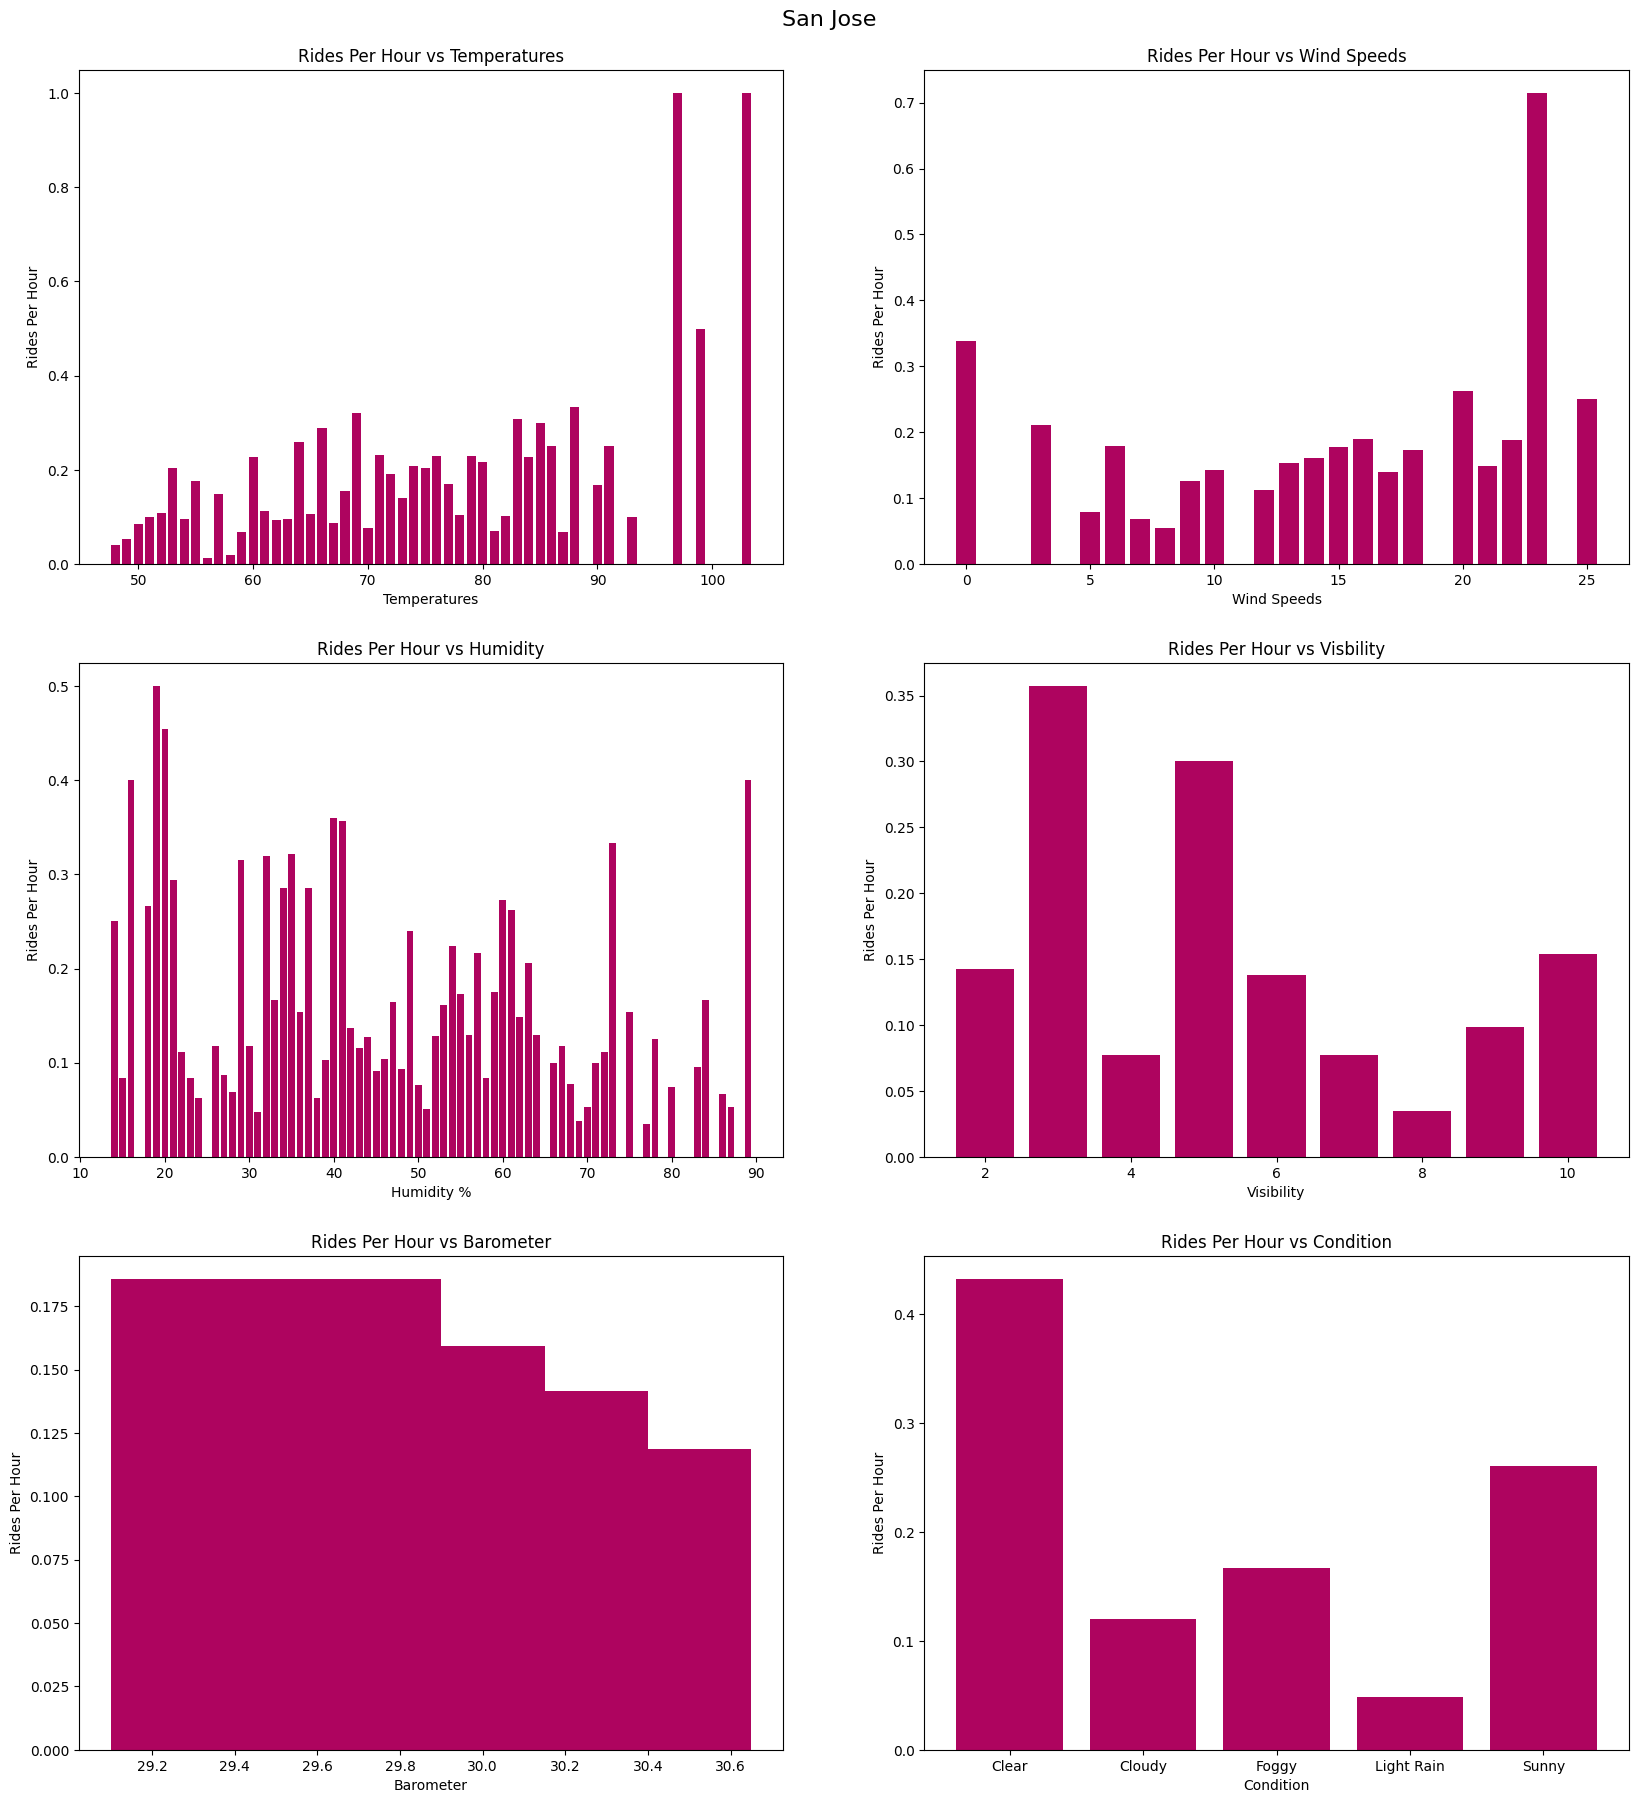

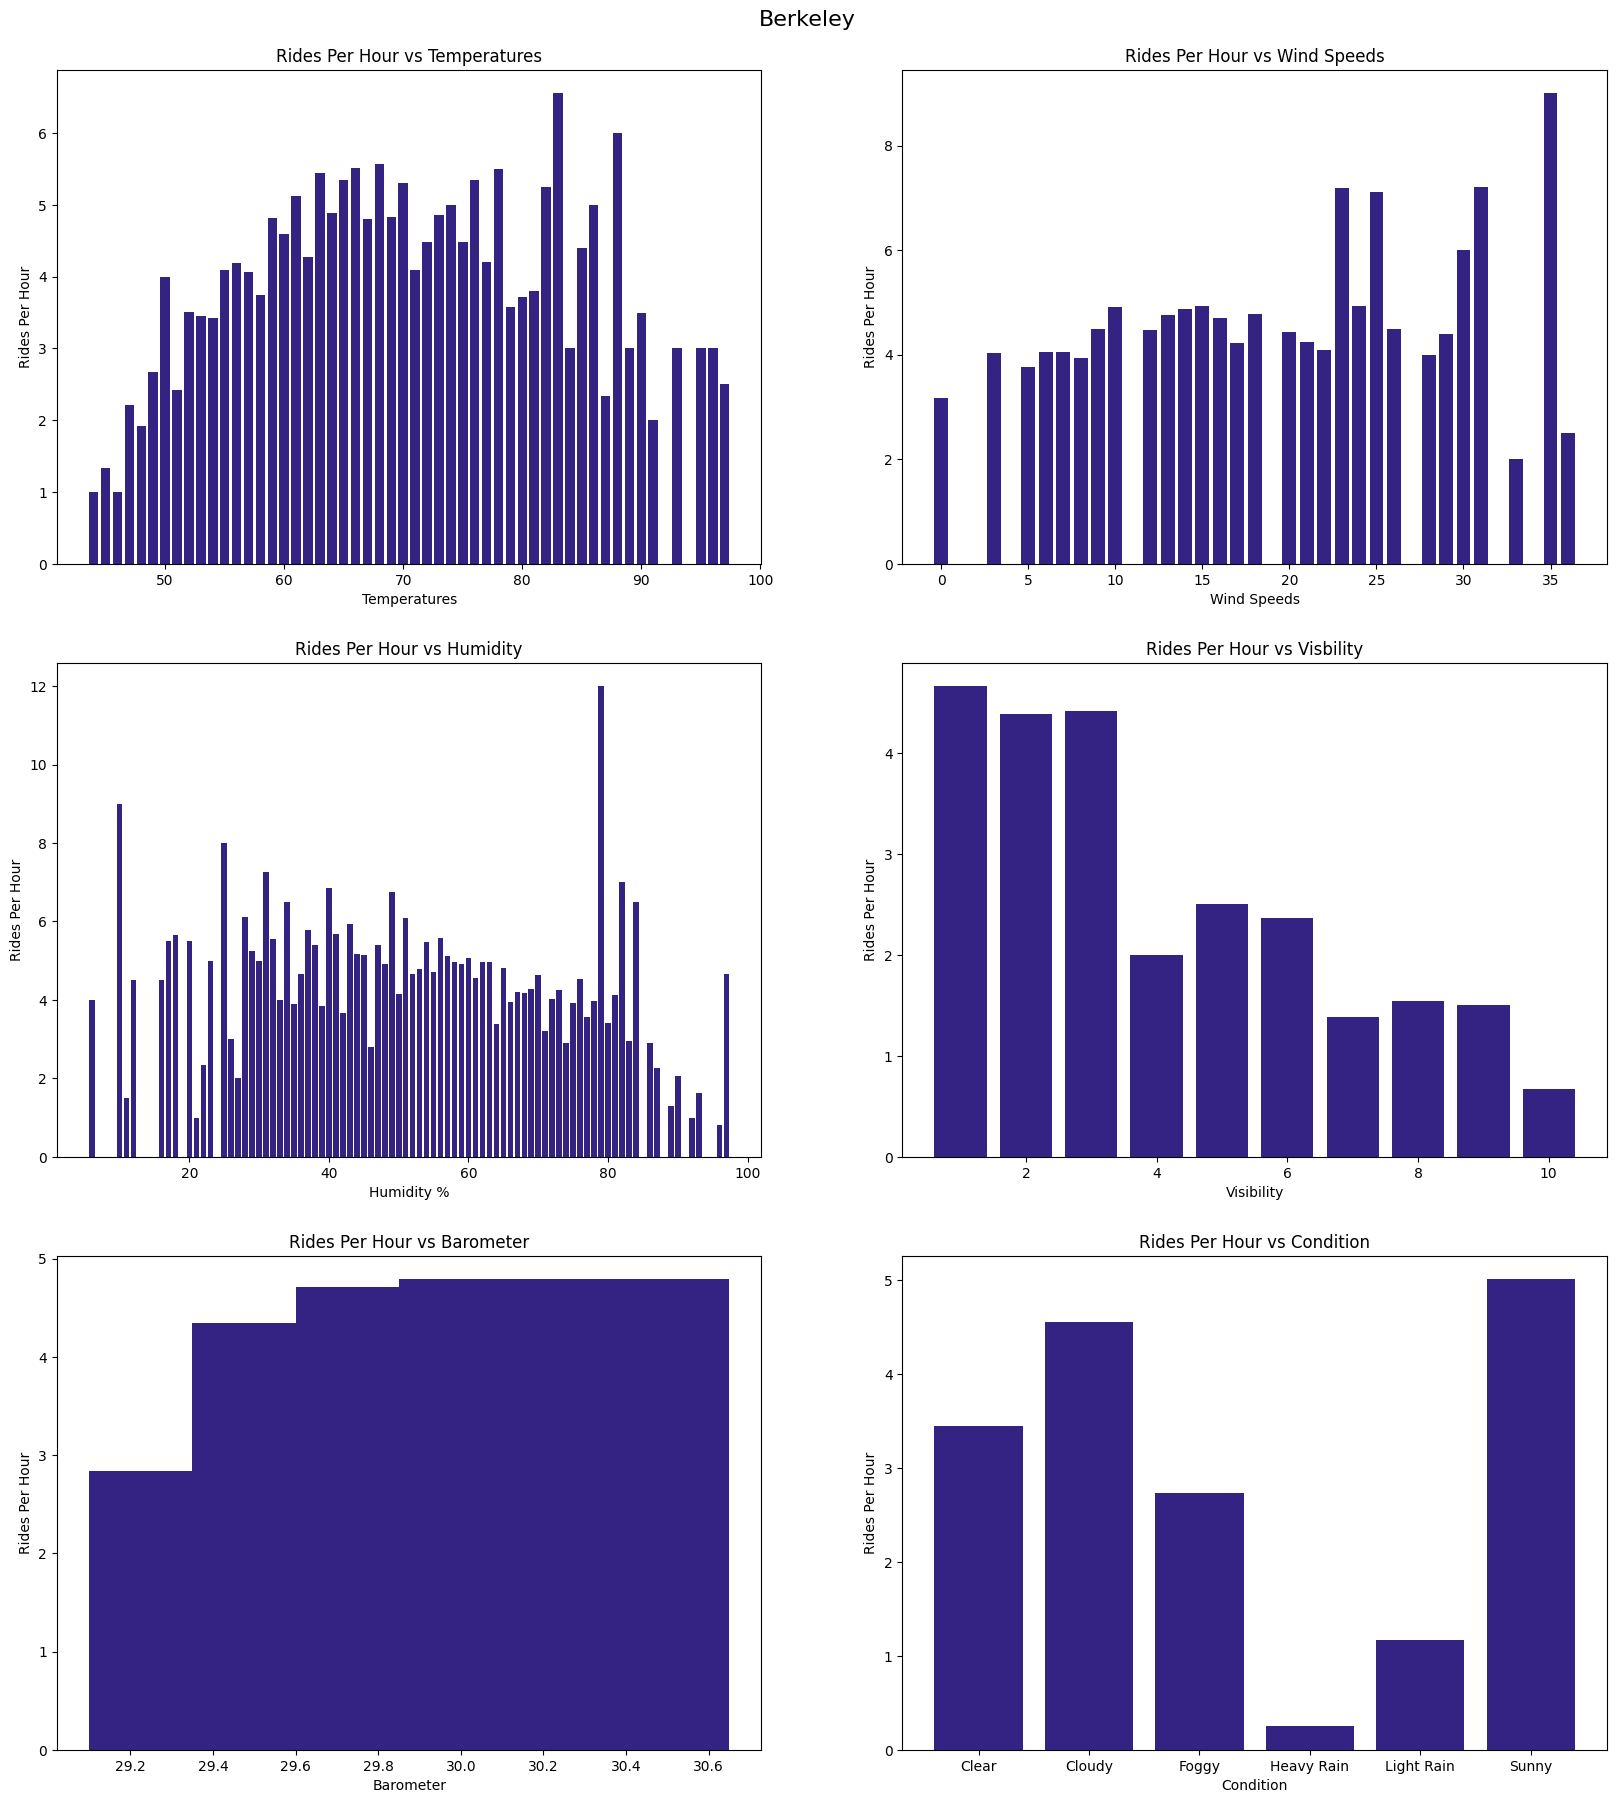

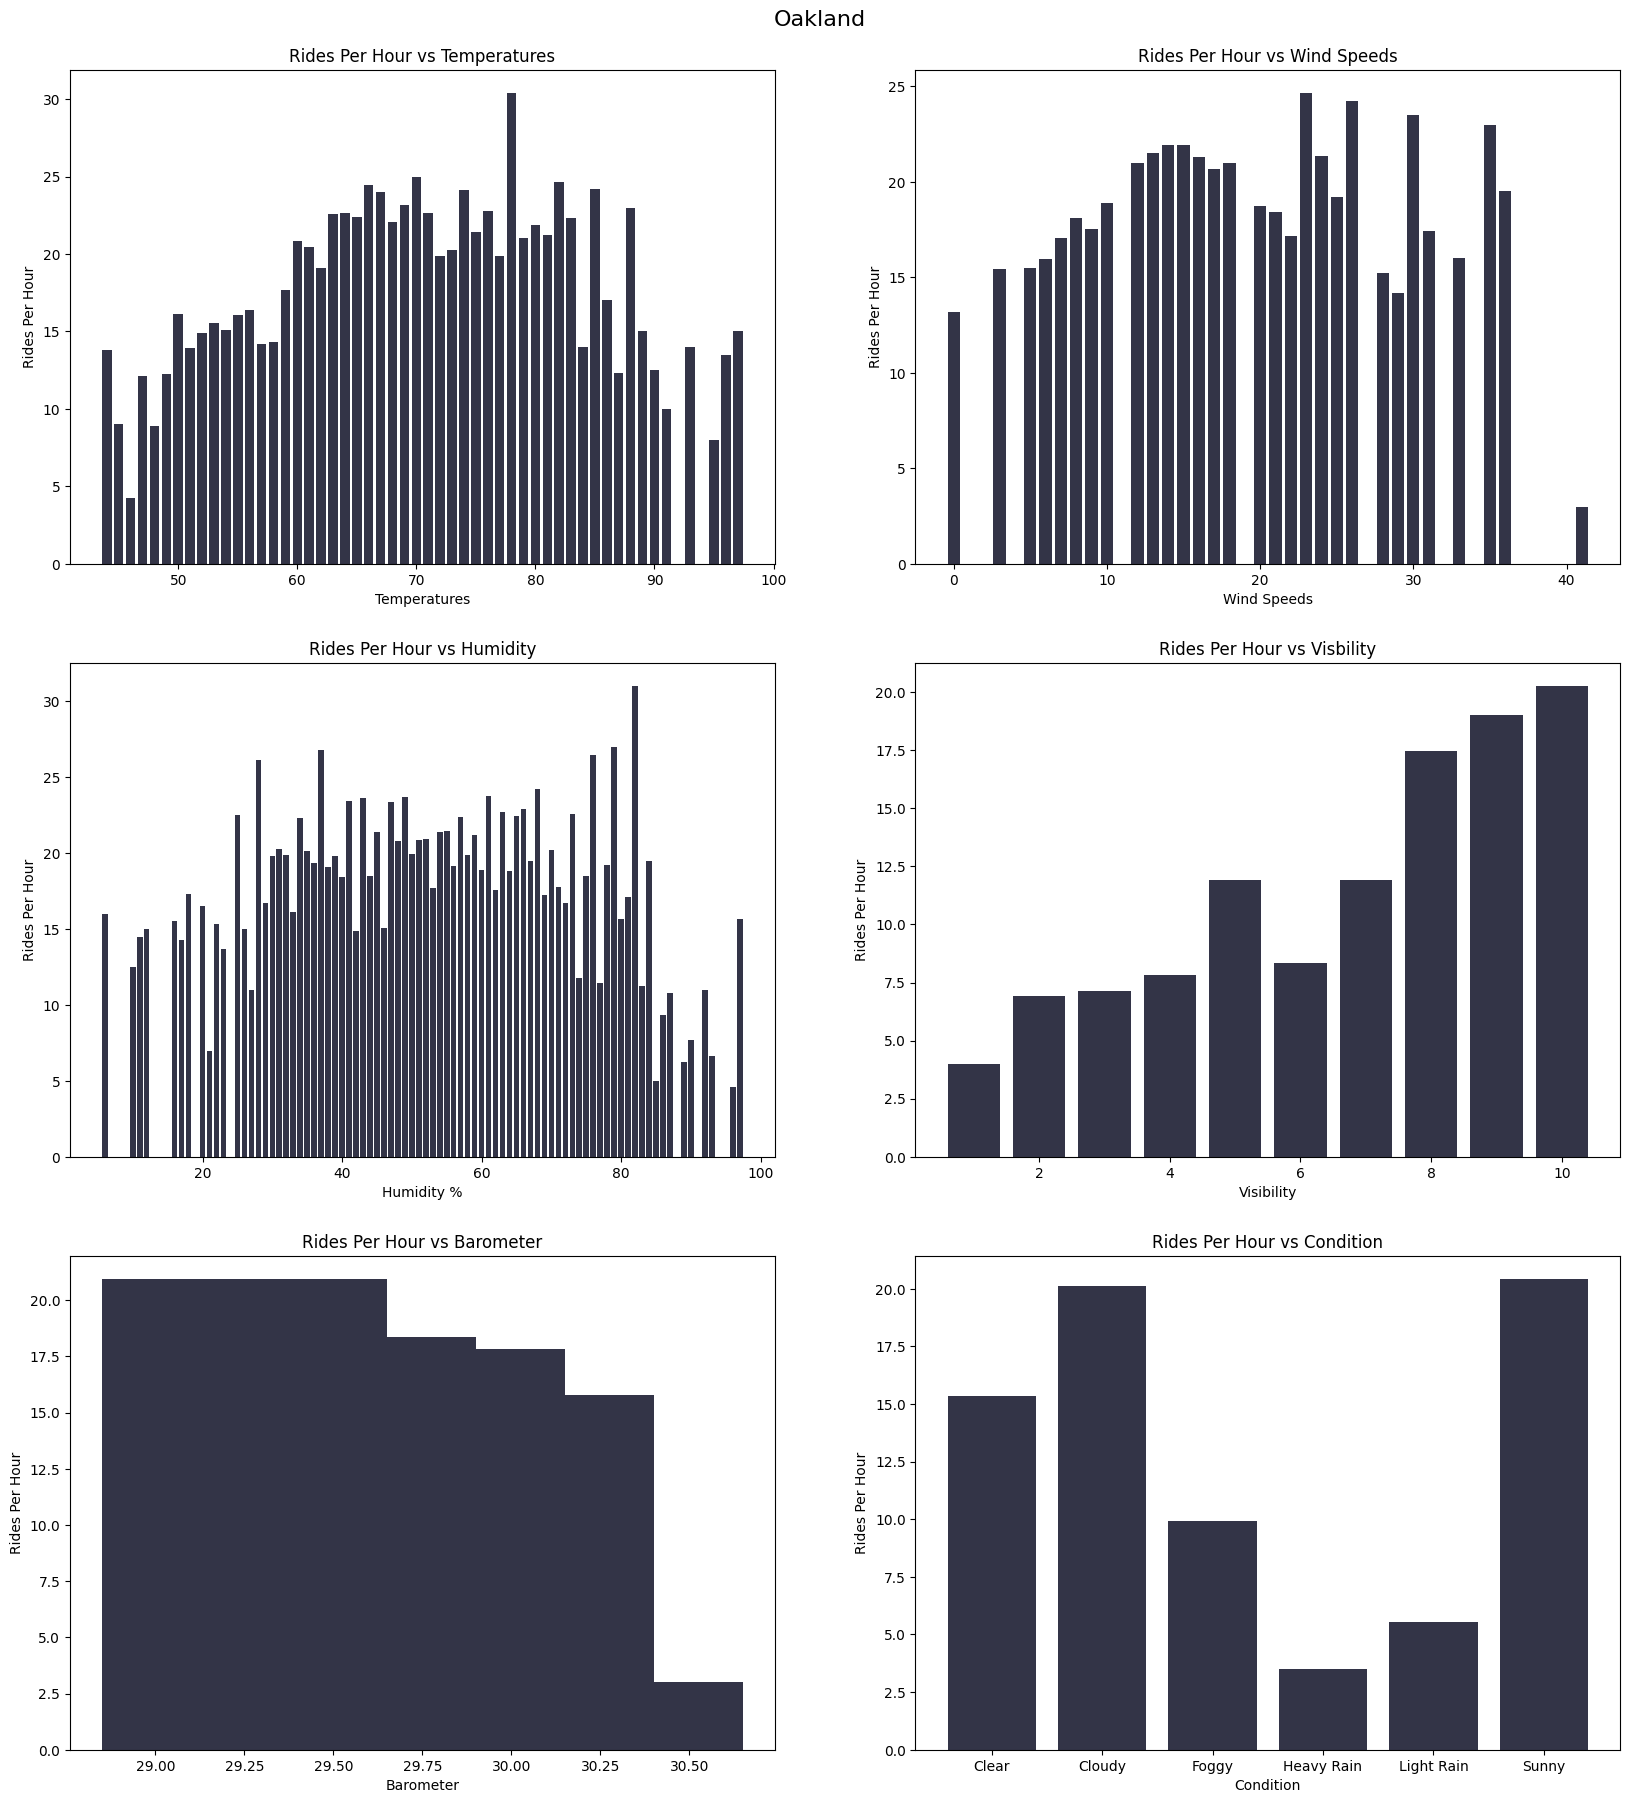

In [222]:
#Creates data tables for the night commute hours for each of the four cities tested

create_tables(night_commute(sf_lyft, 'reg'), night_commute(sf_weather, 'wea'), '#FF00BF', 'San Francisco')
create_tables(night_commute(sj_lyft, 'reg'), night_commute(sj_weather, 'wea'), '#AE045F', 'San Jose')
create_tables(night_commute(brk_lyft, 'reg'), night_commute(brk_weather, 'wea'), '#352384', 'Berkeley')
create_tables(night_commute(okl_lyft, 'reg'), night_commute(okl_weather, 'wea'), '#333447', 'Oakland')

Again the trends weaken during the night commute hours (4pm-7pm) however they are still stronger than during the morning commute hours. This could mean that the need to get to work is more resistent to changing weather conditions than the need to get home from work. Possible causes for this could be that it is easier to get a carpool on the way home than on the way to work or the fact that not everyone is going home from work compared to the amount of people that are reliably going from home to work in the morning. 

### Weather Conditions vs Duration of Ride 

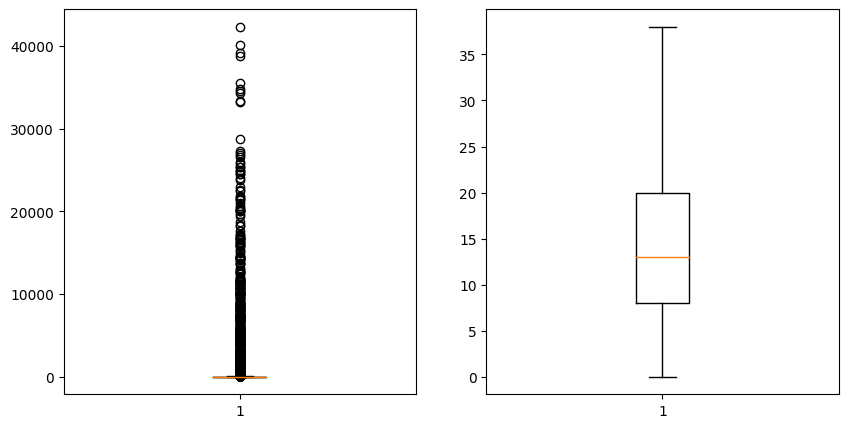

In [223]:
#Shows the outliers for the amount of minutes per ride, and shows the data without the outliers

fig, [a1, a2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

a1.boxplot(lyft['amount_minutes'], showfliers = True);
a2.boxplot(lyft['amount_minutes'], showfliers = False);

In [224]:
#Gets rid of rides that were longer than 60 minutes, gets rid of outliers

lyft = lyft.drop(lyft.loc[lyft['amount_minutes'] > 60].index)

In [225]:
#Function that graphs the average time per ride at each weather condition value

def weather_duration_average(data, weather_var, ax=None):    
    weather_values = sorted(data[weather_var].dropna().unique())
    weather_average_duration = {}

    if ax is None:
        ax = plt.gca()
    
    for weather_value in weather_values:
        average_duration = data[data[weather_var] == weather_value]['amount_minutes'].sum()/data[data[weather_var] == weather_value][weather_var].count()
        weather_average_duration[weather_value] = average_duration

    bar = ax.bar(weather_average_duration.keys(), weather_average_duration.values(), color = '#B80E9F');
    ax.set_xlabel(weather_var);
    ax.set_ylabel('Average duration of Ride');
    ax.set_title('Average duration of Ride vs ' + weather_var);
    return bar

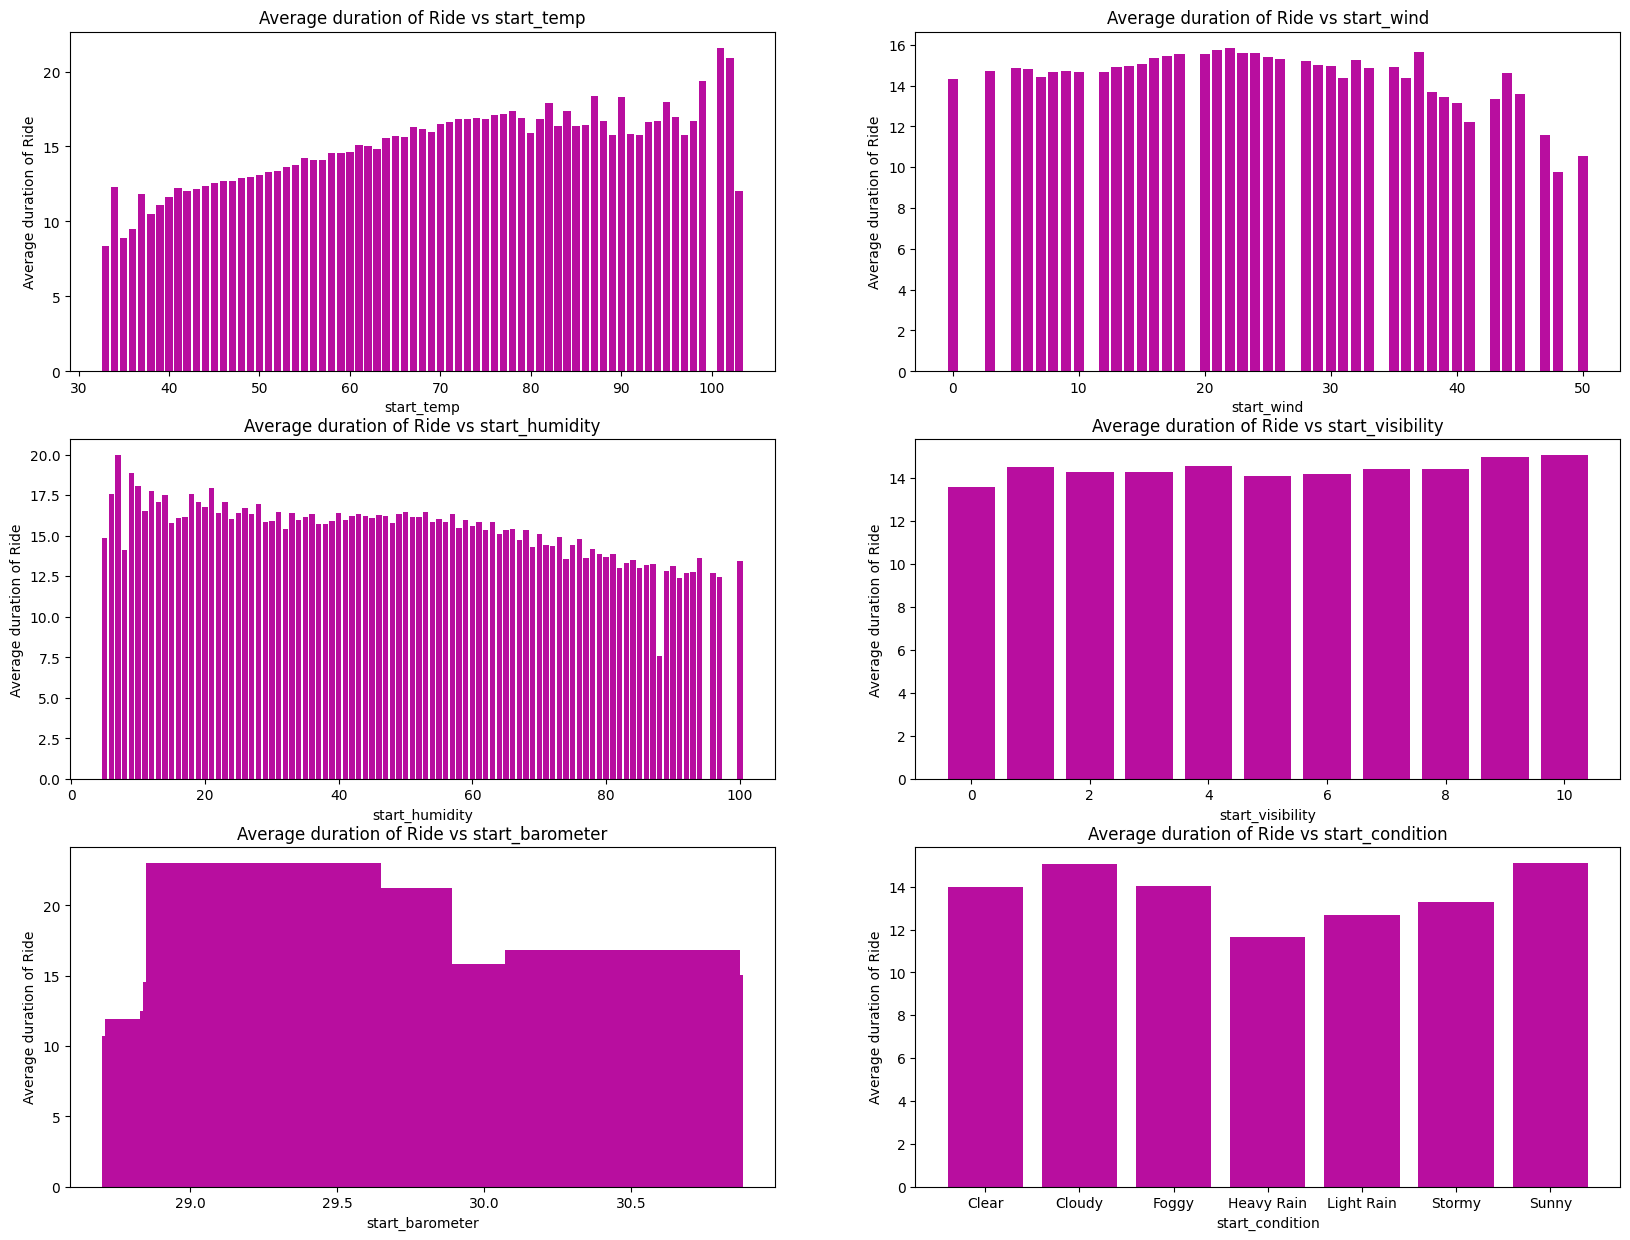

In [226]:
#Shows the average time per ride for each weather condition value for all the lyft data

fig, [[a1, a2], [a3, a4], [a5, a6]] = plt.subplots(nrows = 3, ncols = 2, figsize=(20,15));

weather_duration_average(lyft, 'start_temp', ax=a1);
weather_duration_average(lyft, 'start_wind', ax=a2);
weather_duration_average(lyft, 'start_humidity', ax=a3);
weather_duration_average(lyft, 'start_visibility', ax=a4);
weather_duration_average(lyft, 'start_barometer', ax=a5);
weather_duration_average(lyft, 'start_condition', ax=a6);

From the graphs, trends between the temperature and ride duration and humidity and ride duration can be seen. Ride duration increases as temperature increases and decreases as humidity increases.

### Weather Conditions vs Price of Casual Ride 

In [227]:
#Creates a new data set with just rides from casual users, not members

lyft_casual = lyft.loc[lyft['member_casual'] == 'casual']

In [228]:
#Function that calculates the price of a casual ride using the duration of the ride, rates found on Bay Wheels website

def compute_price(amount):
    y = amount - 30
    if y < 0:
        return 3.49
    elif y > 0:
        return 3.49 + y*0.30
lyft_casual['price'] = lyft_casual['amount_minutes'].apply(lambda x: compute_price(x))

C:\Users\17028\AppData\Local\Temp\ipykernel_21272\3133275987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_casual['price'] = lyft_casual['amount_minutes'].apply(lambda x: compute_price(x))


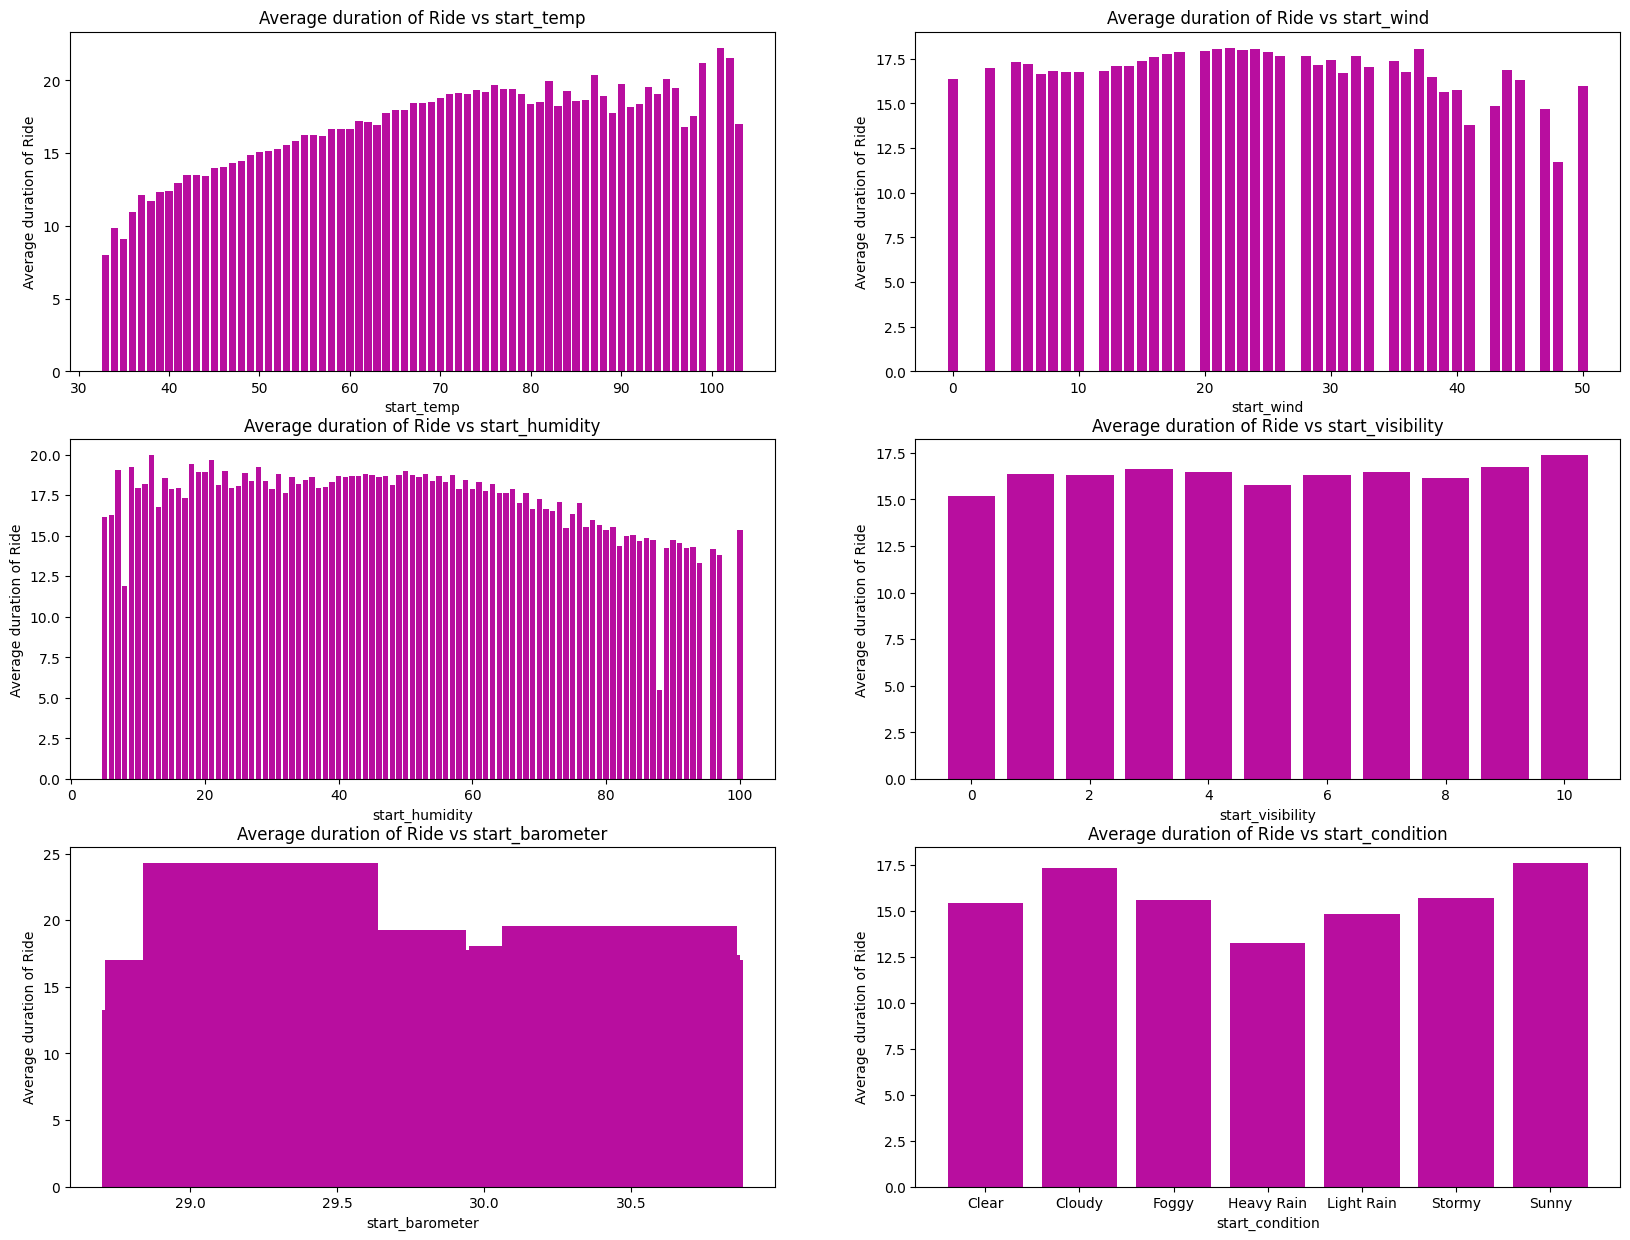

In [229]:
#Shows the average time per ride for each weather condition value for the lyft rides from casual users

fig, [[a1, a2], [a3, a4], [a5, a6]] = plt.subplots(nrows = 3, ncols = 2, figsize=(20,15));

weather_duration_average(lyft_casual, 'start_temp', ax=a1);
weather_duration_average(lyft_casual, 'start_wind', ax=a2);
weather_duration_average(lyft_casual, 'start_humidity', ax=a3);
weather_duration_average(lyft_casual, 'start_visibility', ax=a4);
weather_duration_average(lyft_casual, 'start_barometer', ax=a5);
weather_duration_average(lyft_casual, 'start_condition', ax=a6);

Again, a positive correlation between temperature and ride duration as well as a negative correlation between humidity and ride duration can be seen for casual lyft rides.

In [230]:
#Divides the casual ride data into the four cities being tested

sf_lyft_casual = lyft_casual[lyft_casual['start_loc'] == "SF"]
sj_lyft_casual = lyft_casual[lyft_casual['start_loc'] == "SJ"]
brk_lyft_casual = lyft_casual[lyft_casual['start_loc'] == "BRK"]
okl_lyft_casual = lyft_casual[lyft_casual['start_loc'] == "OKL"]

In [231]:
#Function that creates graphs displaying the average price of a ride at each weather condition

def weather_price_average(data, weather_var, ax=None):    
    weather_values = sorted(data[weather_var].dropna().unique())
    weather_average_price = {}

    if ax is None:
        ax = plt.gca()
    
    for weather_value in weather_values:
        average_price = data[data[weather_var] == weather_value]['price'].sum()/data[data[weather_var] == weather_value][weather_var].count()
        weather_average_price[weather_value] = average_price

    bar = ax.bar(weather_average_price.keys(), weather_average_price.values(), color = '#B80E9F');
    ax.set_xlabel(weather_var);
    ax.set_ylabel('Average price of Ride');
    ax.set_title('Average price of Ride vs ' + weather_var);
    return bar

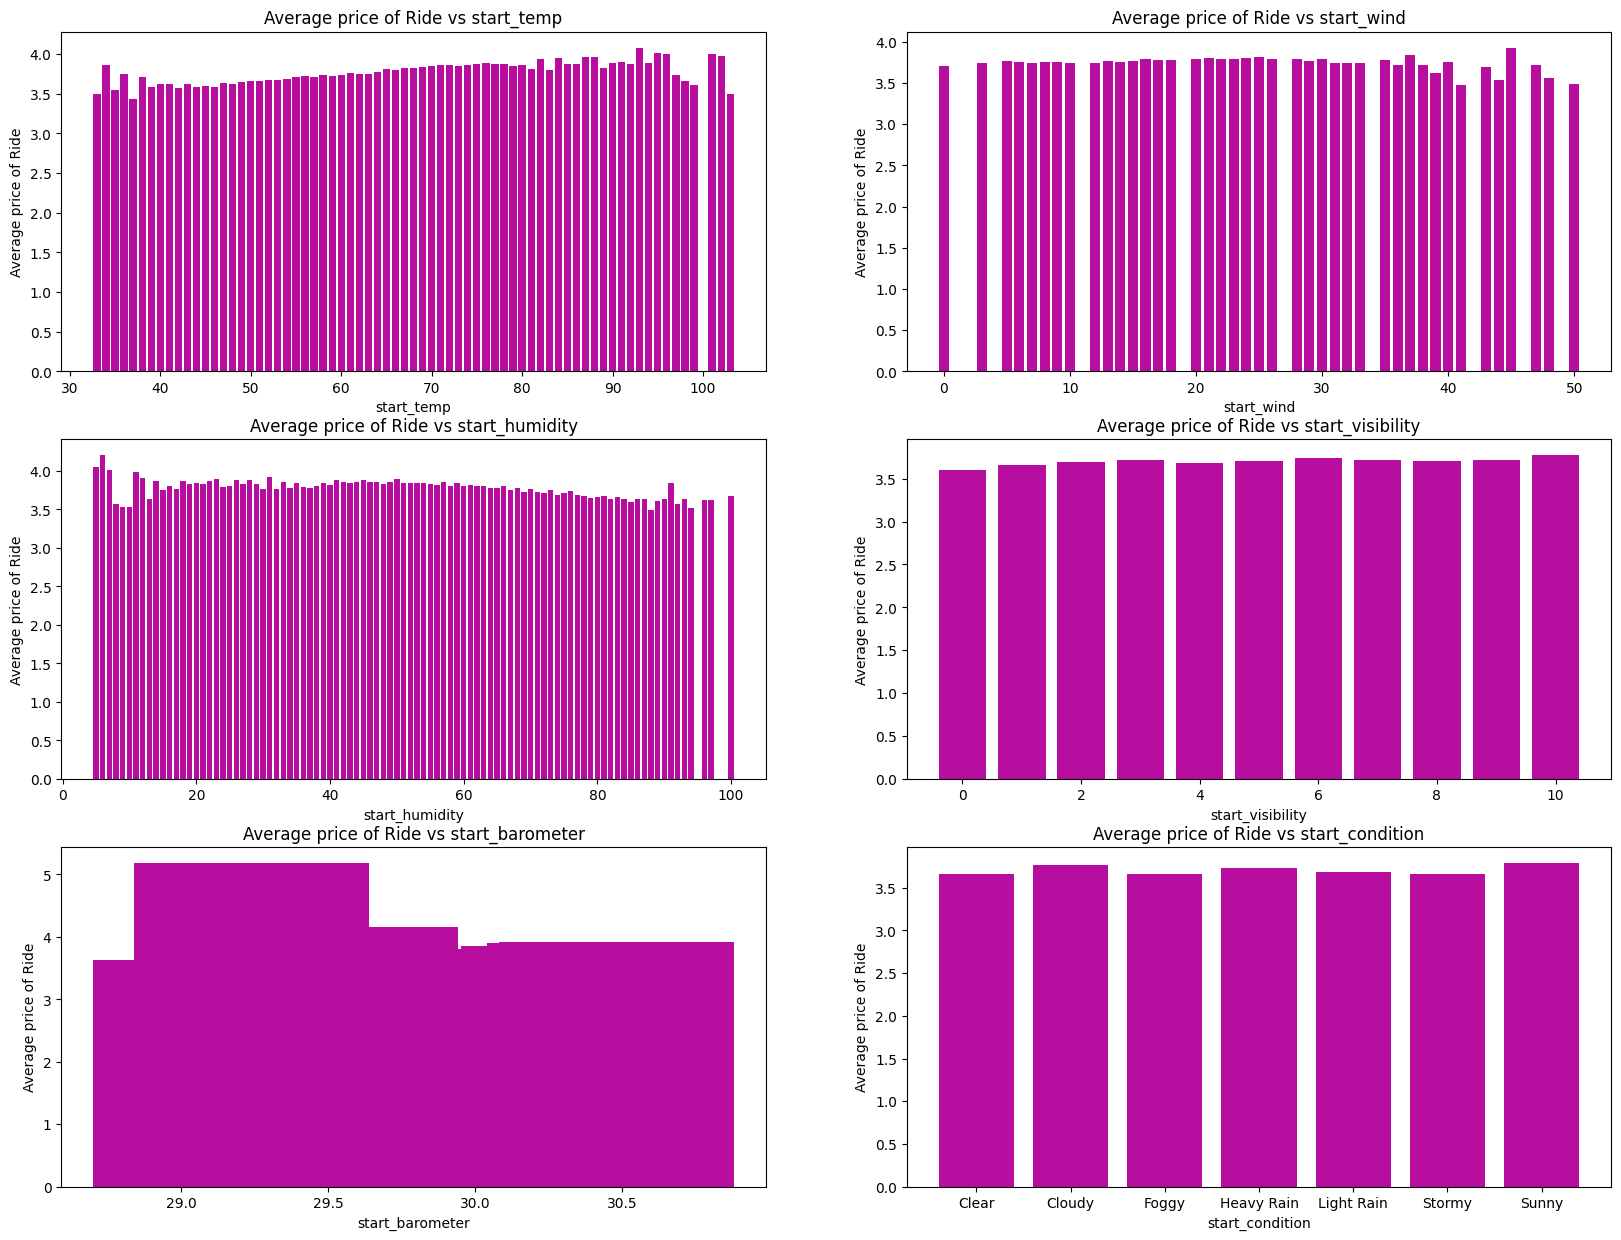

In [232]:
#Creating graphs that represent the average price of ride at each weather condition for all the casual rides

fig, [[a1, a2], [a3, a4], [a5, a6]] = plt.subplots(nrows = 3, ncols = 2, figsize=(20,15));

weather_price_average(lyft_casual, 'start_temp', ax=a1);
weather_price_average(lyft_casual, 'start_wind', ax=a2);
weather_price_average(lyft_casual, 'start_humidity', ax=a3);
weather_price_average(lyft_casual, 'start_visibility', ax=a4);
weather_price_average(lyft_casual, 'start_barometer', ax=a5);
weather_price_average(lyft_casual, 'start_condition', ax=a6);

These graphs show that the average price per ride does not seem to be effected by the weather conditions during that ride.

### Average Daily Weather Condition vs Average Revenue from Casual Rides Per Day 

In [233]:
#Function that scales the data using the columns minimum and maximum value

def MinMaxScaler(data, column, new_name): 
    min_price = data[column].min()
    max_price = data[column].max()
    range_price = max_price - min_price
    data.loc[:, new_name] = (data[column] - min_price)/range_price

In [234]:
#Converting weather conditions into categorized numbers

conditions_scaled = {'Cloudy': 1, 'Sunny': 2, 'Foggy' : 3, 'Clear' : 4, 'Light Rain': 5, 'Stormy' : 6, 'Heavy Rain' : 7}
columns = ['Temperature', 'Wind', 'Visibility', 'Humidity', 'Wind', 'baro_round', 'price', 'Rides']

In [235]:
#Function that creates a new table showing the average weather condition for that day and the amount of money made from casual
#rides that day

def average_weather_data_maker(data, weather): 
    ride_per_day = data.groupby('start_date_clean')['ride_id'].count().to_frame()
    ride_per_day.rename(columns={'ride_id': 'Rides'}, inplace=True)
    money_per_day = data.groupby('start_date_clean')['price'].sum()
    money_per_day = money_per_day.to_frame()
    money_per_day.rename(columns={'start_date_clean': 'Date'}, inplace=True)

    average_weather_temp = weather.groupby('Date')['Temperature'].mean().astype(int).to_frame()
    average_weather_wind = weather.groupby('Date')['Wind'].mean().astype(int).to_frame()
    average_weather_visibility = weather.groupby('Date')['Visibility'].mean().astype(int).to_frame()
    average_weather_humidity = weather.groupby('Date')['Humidity'].mean().astype(int).to_frame()
    average_weather_barometer = weather.groupby('Date')['baro_round'].mean().round(2).to_frame()
    average_weather_condition = weather.groupby('Date')['Condition'].value_counts().groupby('Date').apply(lambda x: x.idxmax()[1]).to_frame()
    average_weather_condition.rename(columns={'count': 'Condition'}, inplace=True)

    average_day = money_per_day.join(average_weather_temp)
    average_day = average_day.join(average_weather_wind)
    average_day = average_day.join(average_weather_visibility)
    average_day = average_day.join(average_weather_humidity)
    average_day = average_day.join(average_weather_barometer)
    average_day = average_day.join(average_weather_condition)
    average_day = average_day.join(ride_per_day)
    '''
    for column in columns:
        MinMaxScaler(average_day, column, column)
    '''
    average_day['Condition'] = average_day['Condition'].apply(lambda x: conditions_scaled[x])
    
    return average_day

In [236]:
#Creating a table that shows the average weather condition and total price for each day for each city 

sf_average_day = average_weather_data_maker(sf_lyft_casual, sf_weather)
sj_average_day = average_weather_data_maker(sj_lyft_casual, sj_weather)
brk_average_day = average_weather_data_maker(brk_lyft_casual, brk_weather)
okl_average_day = average_weather_data_maker(okl_lyft_casual, okl_weather)

In [237]:
#Function that takes a data set, weather condition and either amount of rides or money and creates a scatter plot with 
#a regression line and correlation coefficient

def graph_weather_vs_rides(data, weather, target):    
    slope, intercept = np.polyfit(data[weather], data[target], 1)

    plt.scatter(data[weather], data[target], label='Data Points', color = "#B80E9F")

    regression_line = np.polyval([slope, intercept], data[weather])
    plt.plot(data[weather], regression_line, color='black', label='Regression Line')

    correlation_coefficient = np.corrcoef(data[weather], data[target])[0, 1]
    print(correlation_coefficient)

0.4176846100868594


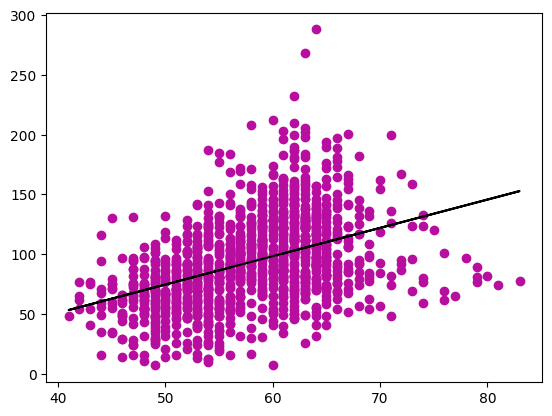

In [238]:
#Example of the graph_weather_vs_rides being used to show how temperature in San Jose on an average day correlates to the 
#amount of rides bought in that day

graph_weather_vs_rides(okl_average_day, 'Temperature', 'Rides')

In [239]:
#Function that finds the correlation between a weather condition and either price or amount of rides

def find_correlation_weather_data(data, weather, target):    
    correlation_coefficient = np.corrcoef(data[weather], data[target])[0, 1]
    return correlation_coefficient

In [240]:
#Creates list of all the data sets in different cities during different hours, and a list of the different weather conditions
#To be tested

data_sets = [{"sf_day" : sf_average_day},
             {"sj_day" : sj_average_day}, 
             {"brk_day" : brk_average_day},
             {"okl_day" : okl_average_day}]
weather_conditions = ["Temperature", "Wind", "Visibility", "Humidity", "baro_round"]

In [241]:
#Iterates through each dataset and weather condtion and calculates the correlation, puts it into a list
#After all correlations are calculated, the list is ordered from least to most linear

correlations = []
for data in data_sets:
    for condition in weather_conditions:
        correlation = find_correlation_weather_data(list(data.values())[0], condition, 'price')
        correlations.append([correlation, list(data.keys())[0], condition])

sorted(correlations)

[[-0.15443531660646612, 'okl_day', 'baro_round'],
 [-0.135879585920301, 'brk_day', 'Humidity'],
 [-0.13585841090259854, 'sf_day', 'baro_round'],
 [-0.10567601841222383, 'sf_day', 'Humidity'],
 [-0.06953423287061052, 'okl_day', 'Humidity'],
 [-0.038670184979946794, 'sj_day', 'Humidity'],
 [-0.03299191126153473, 'sj_day', 'baro_round'],
 [0.02352964435579555, 'sj_day', 'Wind'],
 [0.02357711095536882, 'brk_day', 'Wind'],
 [0.032612205142400486, 'okl_day', 'Wind'],
 [0.045395720907261496, 'sj_day', 'Visibility'],
 [0.08382340599413869, 'brk_day', 'baro_round'],
 [0.09841703500055271, 'sj_day', 'Temperature'],
 [0.10904312404857296, 'brk_day', 'Temperature'],
 [0.12355203510155666, 'sf_day', 'Wind'],
 [0.17359428482906417, 'brk_day', 'Visibility'],
 [0.2766604520077589, 'okl_day', 'Visibility'],
 [0.33122031064550145, 'sf_day', 'Visibility'],
 [0.35325937176956745, 'sf_day', 'Temperature'],
 [0.4380395234658255, 'okl_day', 'Temperature']]

This data shows that the amount of money made per day from casual rides is partially positively correlated with the temperature and visibility in San Fransisco and Oakland.

In [242]:
#Creates table showing the average revenue per day vs the average weather condition value for that day
#Done for Temperature, Wind Speed, Humidities and Visibilities

def create_day_tables(lyft_data, color, title):  
    fig, [[a1, a2], [a3, a4]]= plt.subplots(nrows=2, ncols=2, figsize=(20,10))

    fig.suptitle(title, fontsize=16)

    temps = sorted(lyft_data['Temperature'].dropna().unique())
    a1.bar(temps, lyft_data.groupby('Temperature')['price'].mean(), color = color);
    a1.set_xlabel('Average Daily Temperature');
    a1.set_ylabel('Average Revenue Made from Casual Riders');
    a1.set_title('Average Revenue Made from Casual Riders vs Average Daily Temperature');
    
    winds = sorted(lyft_data['Wind'].dropna().unique())
    a2.bar(winds, lyft_data.groupby('Wind')['price'].mean(), color = color);
    a2.set_xlabel('Average Daily Wind Speed');
    a2.set_ylabel('Average Revenue Made from Casual Riders');
    a2.set_title('Average Revenue Made from Casual Riders vs Average Daily Wind Speed');
    
    humidities = sorted(lyft_data['Humidity'].dropna().unique())
    a3.bar(humidities, lyft_data.groupby('Humidity')['price'].mean(), color = color);
    a3.set_xlabel('Average Daily Humidity');
    a3.set_ylabel('Average Revenue Made from Casual Riders');
    a3.set_title('Average Revenue Made from Casual Riders vs Average Daily Humidity');
    
    visibilities = sorted(lyft_data['Visibility'].dropna().unique())
    a4.bar(visibilities, lyft_data.groupby('Visibility')['price'].mean(), color = color);
    a4.set_xlabel('Average Daily Visibility');
    a4.set_ylabel('Average Revenue Made from Casual Riders');
    a4.set_title('Average Revenue Made from Casual Riders vs Average Daily Visibility');

In [243]:
#Dropping Visibility Outliers

brk_average_day = brk_average_day.drop(brk_average_day[brk_average_day['Visibility'] > 10].index)
okl_average_day = okl_average_day.drop(okl_average_day[okl_average_day['Visibility'] > 10].index)

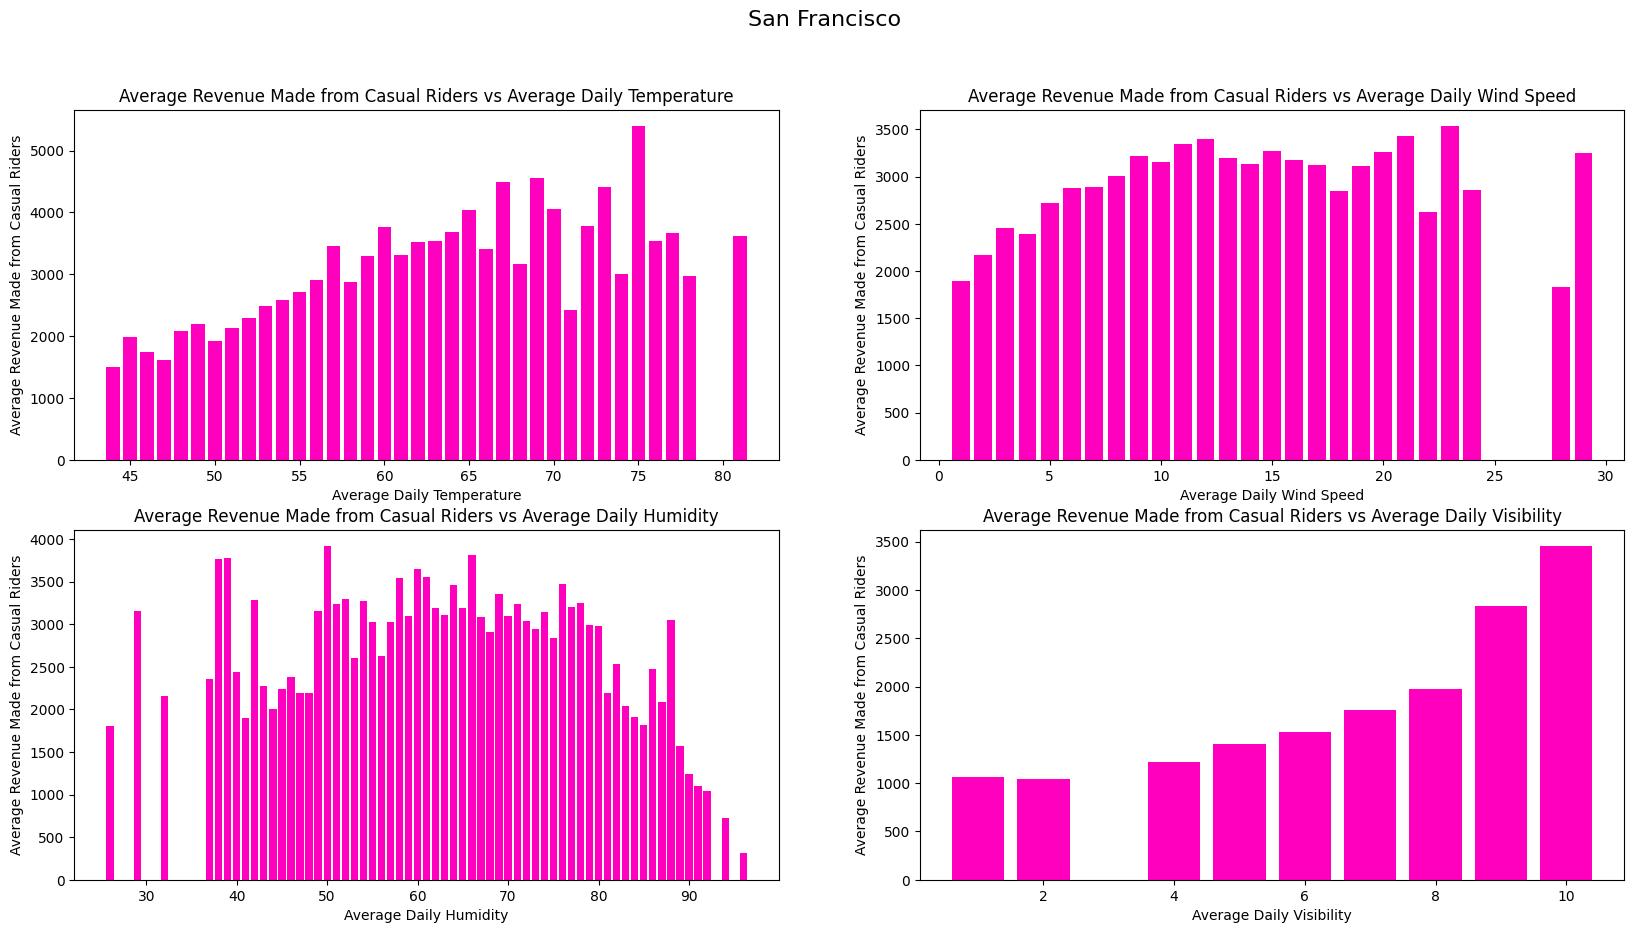

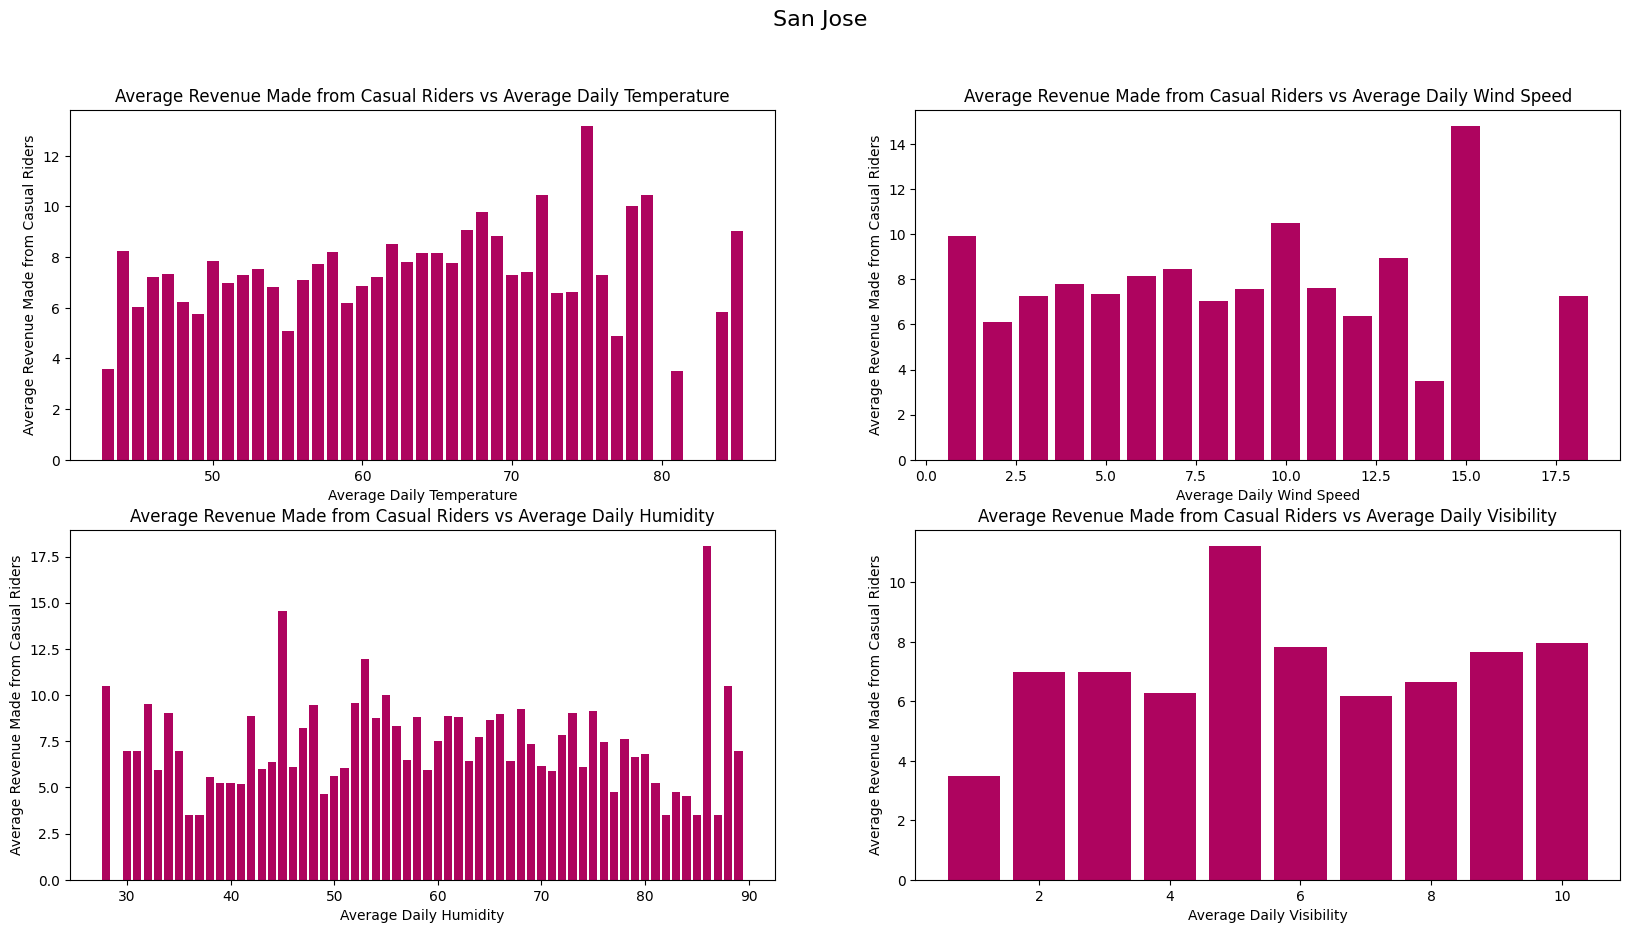

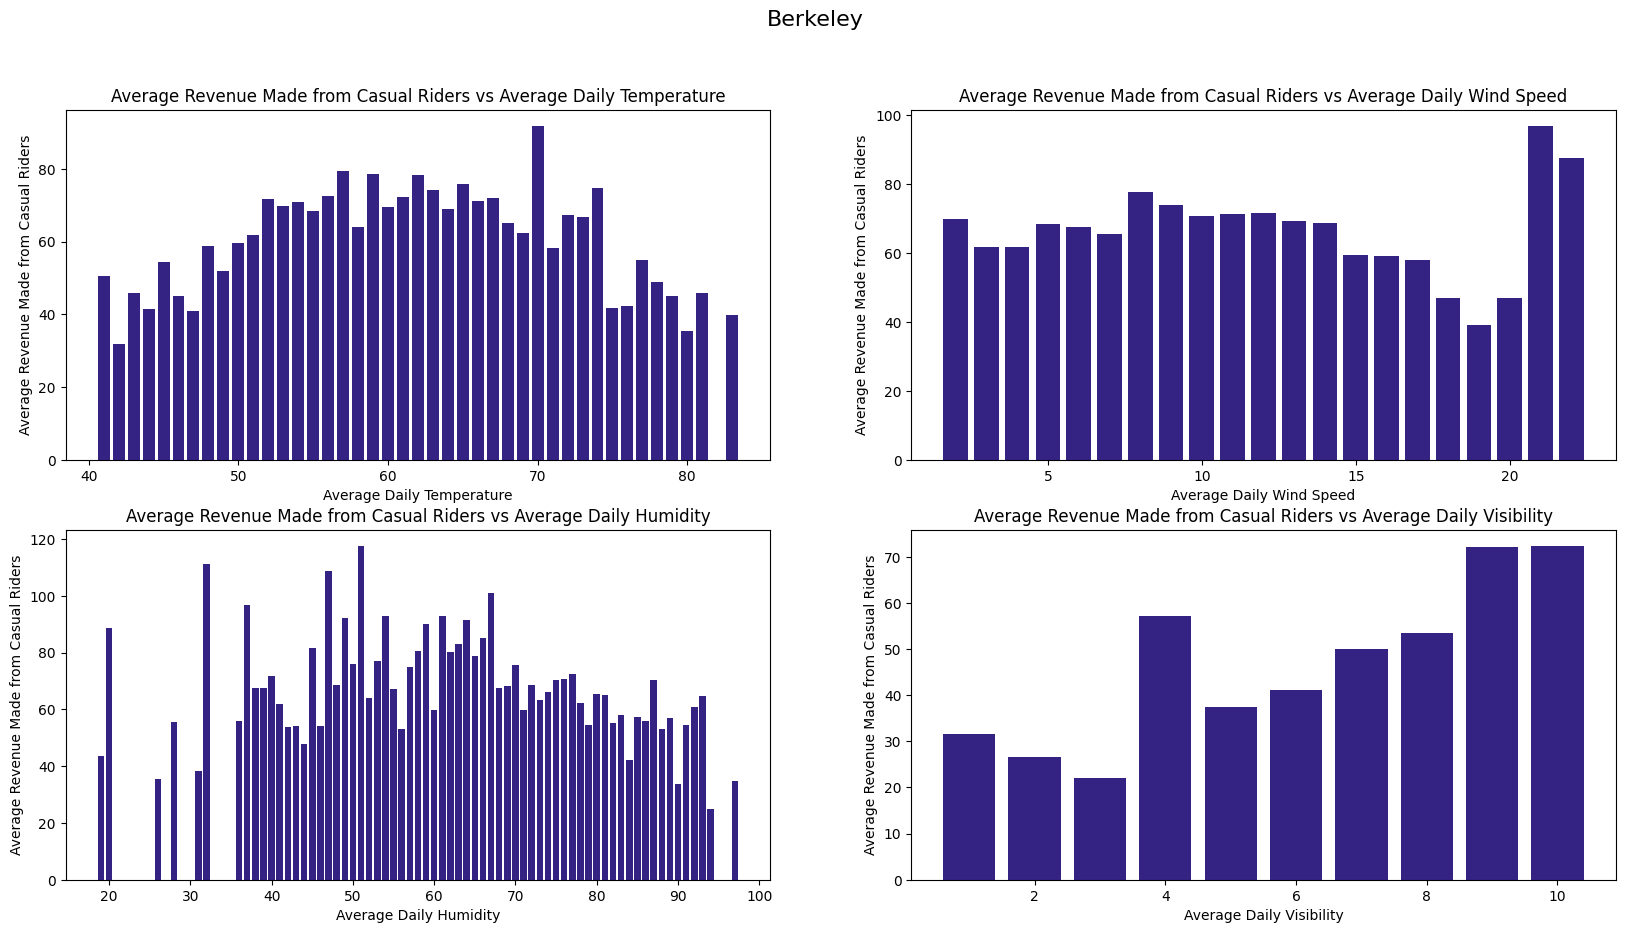

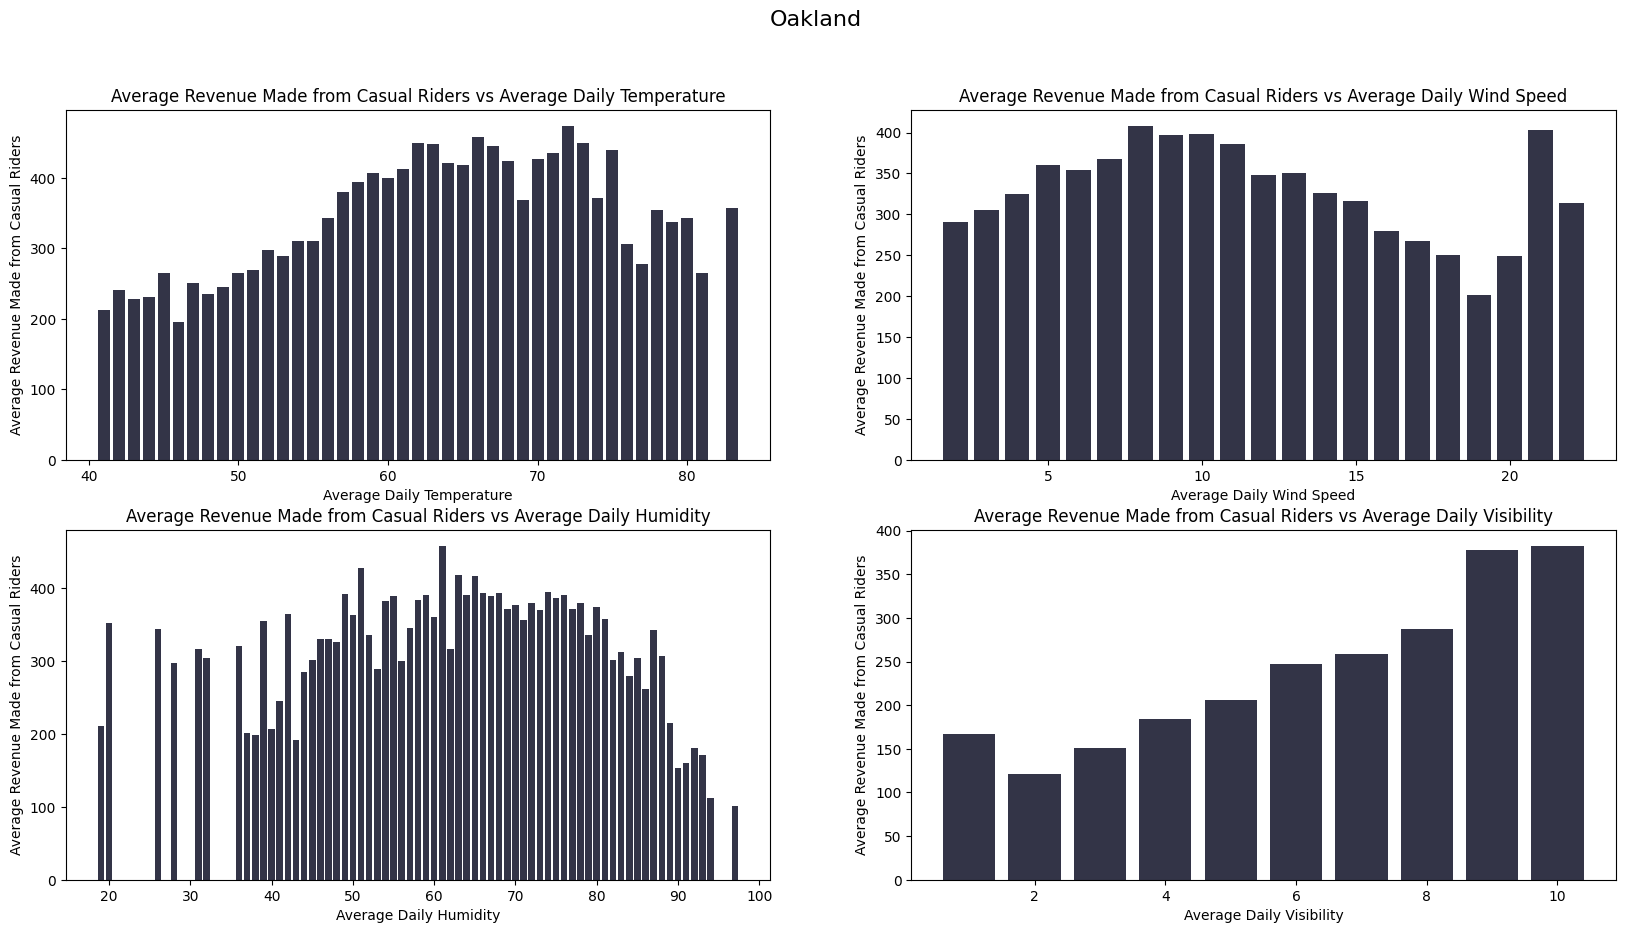

In [244]:
create_day_tables(sf_average_day, "#FF00BF", 'San Francisco')
create_day_tables(sj_average_day, "#AE045F", 'San Jose')
create_day_tables(brk_average_day, "#352384", 'Berkeley')
create_day_tables(okl_average_day, "#333447", 'Oakland')

These graphs are similar with the graphs for the amount of rides per weather condition value. The average amount of money made per day increases with temperature and visibility and decreases with humidity after 80% in all cities but San Jose. 